In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from termcolor import colored
import datetime
from collections import defaultdict

In [2]:
"""datasets"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months/East_Brazil/'
home_b = '/scratch/pdenblaauwen/rootzone/rootzone/Benchmark_evaporation_products/'

LFE_monthly = xr.open_dataset(home_b + 'LandFlux-EVAL/Monthly/LandFluxEVAL.merged.89-05.monthly.all.nc' , engine = 'netcdf4')
SA = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012.nc' , engine = 'netcdf4')
DOLCE_v3_monthly = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012_EB.nc' , engine = 'netcdf4')
FBP_monthly = xr.open_dataset(home_b + 'FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_EB.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212_EB.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + 'EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')
CESM2 = xr.open_dataset(home + 'CESM2_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'CMCC-ESM2_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')
ESM_1_1 = xr.open_dataset(home + 'E3SM-1-1_land-hist_r1i1p11f1_200101-201212_EB.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212_EB.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'MIROC6_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')



"""Data"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/GSWP3/Daily'


Tas = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat-16.0to-12.0lon-46.0to-42.0.nc4' , engine = 'netcdf4')
Tas_min = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat-16.0to-12.0lon-46.0to-42.0.nc4' , engine = 'netcdf4')
Tas_max = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat-16.0to-12.0lon-46.0to-42.0.nc4' , engine = 'netcdf4')

Tav = Tas.tas[: ,  : , :]
Tmax = Tas_max.tasmax[: , : , :]
Tmin = Tas_min.tasmin[: , : , :]

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

DOLCE_v3_monthly = DOLCE_v3_monthly * factor
UKESM1_0_LL = UKESM1_0_LL.evspsbl * t_day
EC_Earth3_veg = EC_Earth3_veg.evspsbl * t_day
CESM2 = CESM2.evspsbl * t_day
CMCC_ESM2 = CMCC_ESM2.evspsbl * t_day
E3SM_1_1 = ESM_1_1.evspsbl * t_day
HadGEM3_GC31_LL = HadGEM3_GC31_LL.evspsbl * t_day
IPSL_CM6A_LR = IPSL_CM6A_LR.evspsbl * t_day
MIROC6 = MIROC6.evspsbl * t_day

"""Run off data"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/LS3MIP/mrro/Regions'

RO_MIROC6 = xr.open_dataset(home + '/mrro_Lmon_MIROC6_land-hist_r1i1p1f1_195001-201412_EB.nc' , engine = 'netcdf4')
RO_IPSL_CM6A_LR = xr.open_dataset(home + '/mrro_Lmon_IPSL-CM6A-LR_land-hist_r1i1p1f1_195001-201412_EB.nc' , engine = 'netcdf4')
RO_CESM2 = xr.open_dataset(home + '/mrro_Lmon_CESM2_land-hist_r1i1p1f1_195001-201512_EB.nc' , engine = 'netcdf4')
RO_CMCC_ESM2 = xr.open_dataset(home + '/mrro_Lmon_CMCC-ESM2_land-hist_r1i1p1f1_195001-201412_EB.nc' , engine = 'netcdf4')
RO_HadGEM3_GC31_LL = xr.open_dataset(home + '/mrro_Lmon_HadGEM3-GC31-LL_land-hist_r1i1p1f3_195001-201412_EB.nc' , engine = 'netcdf4')
RO_UKESM1_0_LL = xr.open_dataset(home + '/mrro_Lmon_UKESM1-0-LL_land-hist_r1i1p1f2_195001-201412_EB.nc', engine = 'netcdf4')
RO_EC_Earth3_veg = xr.open_dataset(home + '/mrro_Lmon_EC-Earth3-Veg_land-hist_r1i1p1f1_195001-201412_EB.nc', engine = 'netcdf4')
RO_E3SM_1_1 = xr.open_dataset(home + '/mrro_Lmon_E3SM-1-1_land-hist_r1i1p11f1_195001-201412_EB.nc', engine = 'netcdf4')

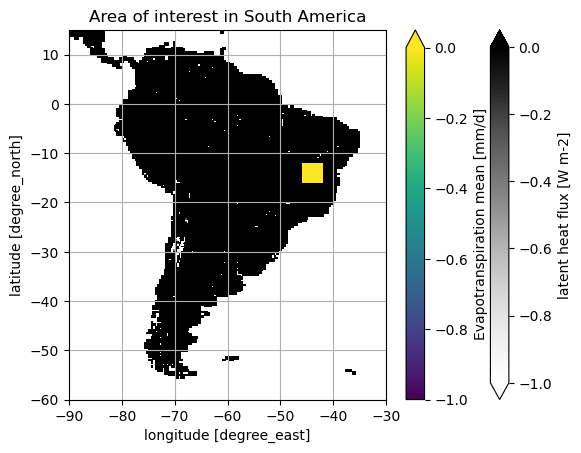

In [3]:
SA.hfls[1 , : , :].plot(cmap = 'Greys' , vmin = -1 , vmax = 0)
LFE_monthly.ET_mean[1 , 74:78 , 134:138].plot(cmap = 'viridis' , vmin = -1 , vmax = 0)
plt.title(f'Area of interest in South America')
plt.ylim(-60 , 15)
plt.xlim(-90 , -30)

plt.grid()

In [4]:
LFE_EB = xr.open_dataset(home_b + 'LandFlux-EVAL/Monthly/LFE_EB.89-05.monthly.all.nc' , engine = 'netcdf4')

In [5]:
"""Mean of the area"""

t = 120  #2001 - 2010

dpm = [31, 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31]

#ET_mean_LFE = np.zeros(t)
ET_mean_DOLCE_v3 = np.zeros(t)
ET_mean_FBP = np.zeros(t)
ET_mean_UKESM1_0_LL = np.zeros(t)
ET_mean_EC_Earth3_veg = np.zeros(t)
ET_mean_CESM2 = np.zeros(t)
ET_mean_CMCC_ESM2 = np.zeros(t)
ET_mean_E3SM_1_1 = np.zeros(t)
ET_mean_HadGEM3_GC31_LL = np.zeros(t)
ET_mean_IPSL_CM6A_LR = np.zeros(t)
ET_mean_MIROC6 = np.zeros(t)

for i in range(t):
    #ET_mean_LFE[i] = LFE_EB.ET_mean[i + 144 , : , :].mean()
    ET_mean_DOLCE_v3[i] = DOLCE_v3_monthly.hfls[i , : , :].mean() * dpm[i]
    ET_mean_FBP[i] = FBP_monthly.Evaporation[i , : , :].mean() * dpm[i]
    ET_mean_UKESM1_0_LL[i] = UKESM1_0_LL[i , : , :].mean() * dpm[i]
    ET_mean_EC_Earth3_veg[i] = EC_Earth3_veg[i , : , :].mean()  * dpm[i]
    ET_mean_CESM2[i] = CESM2[i , : , :].mean() * dpm[i]
    ET_mean_CMCC_ESM2[i] = CMCC_ESM2[i , : , :].mean()  * dpm[i]
    ET_mean_E3SM_1_1[i] = E3SM_1_1[i , : , :].mean() * dpm[i]
    ET_mean_HadGEM3_GC31_LL[i] = HadGEM3_GC31_LL[i , : , :].mean() * dpm[i]
    ET_mean_IPSL_CM6A_LR[i] = IPSL_CM6A_LR[i , : , :].mean() * dpm[i]
    ET_mean_MIROC6[i] = MIROC6[i , : , :].mean() * dpm[i]
    
"""Evapotranspiration"""

ET_mean = [ET_mean_DOLCE_v3 , ET_mean_FBP, ET_mean_UKESM1_0_LL , ET_mean_EC_Earth3_veg , ET_mean_CESM2 ,  ET_mean_CMCC_ESM2 , ET_mean_E3SM_1_1 , ET_mean_HadGEM3_GC31_LL , ET_mean_IPSL_CM6A_LR , ET_mean_MIROC6]
ET_pm_mean = np.zeros((10 , 12))

for j in range(len(ET_mean)):
    for i in range(12):
        #Array per month average
        ET_pm_mean[j , i] = np.mean([ET_mean[j][i] , ET_mean[j][i + 12] , ET_mean[j][i + 24] ,  ET_mean[j][i+36] , 
        ET_mean[j][i + 48] , ET_mean[j][i + 60] , ET_mean[j][i + 72] , ET_mean[j][i + 84] , ET_mean[j][i + 96] , 
        ET_mean[j][i + 108]])

ET_an = np.zeros((10 , 120))
mpy = np.arange(0 , 120 , 12)

for m in range(len(ET_mean)):
    for j in range(len(mpy)):   
        for i in range(12):
            ET_an[m][mpy[j] + i] = ET_mean[m][mpy[j]+i] - ET_pm_mean[m][i]
            
            
"""Run-off"""    

R_UKESM1_0_LL = np.zeros(t)
R_CESM2 = np.zeros(t)
R_CMCC_ESM2 = np.zeros(t)
R_HadGEM3_GC31_LL = np.zeros(t)
R_IPSL_CM6A_LR = np.zeros(t)
R_MIROC6 = np.zeros(t)
R_E3SM_1_1 = np.zeros(t)
R_EC_Earth3_veg = np.zeros(t)
    
"""Converting to mm/month"""

for i in range(120):
    R_MIROC6[i] = 86400 * RO_MIROC6.mrro[612 + i].mean()*dpm[i]
    R_IPSL_CM6A_LR[i] = 86400 * RO_IPSL_CM6A_LR.mrro[612 + i].mean()*dpm[i]
    R_CESM2[i] = 86400 * RO_CESM2.mrro[612 + i].mean()*dpm[i]
    R_CMCC_ESM2[i] = 86400 * RO_CMCC_ESM2.mrro[612 + i].mean()*dpm[i]
    R_HadGEM3_GC31_LL[i] = 86400 * RO_HadGEM3_GC31_LL.mrro[612 + i].mean()*dpm[i]
    R_UKESM1_0_LL[i] = 86400 * RO_UKESM1_0_LL.mrro[612 + i].mean()*dpm[i]
    R_E3SM_1_1[i] = 86400 * RO_E3SM_1_1.mrro[612 + i].mean()*dpm[i]
    R_EC_Earth3_veg[i] = 86400 * RO_EC_Earth3_veg.mrro[612 + i].mean()*dpm[i]

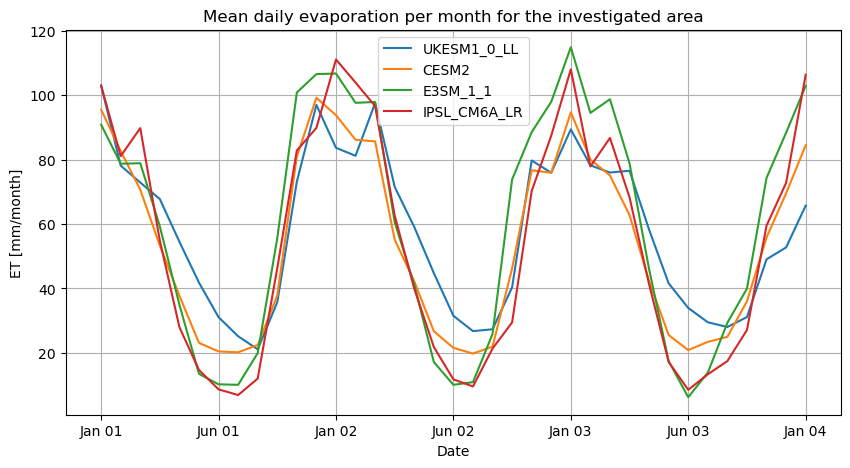

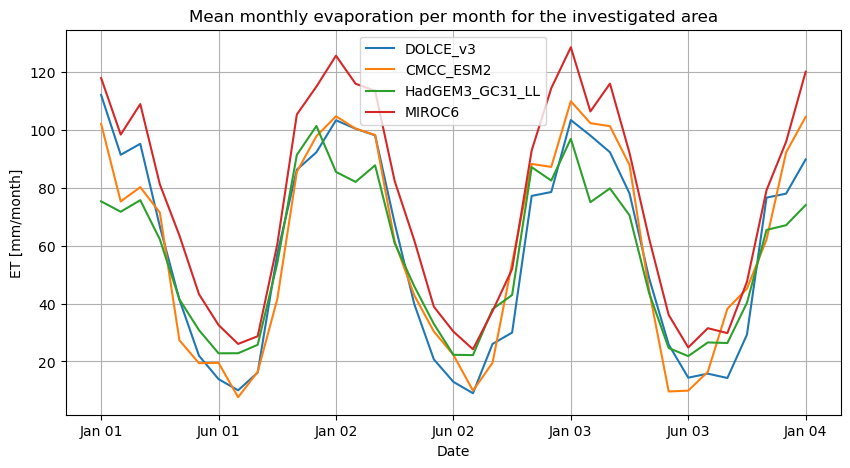

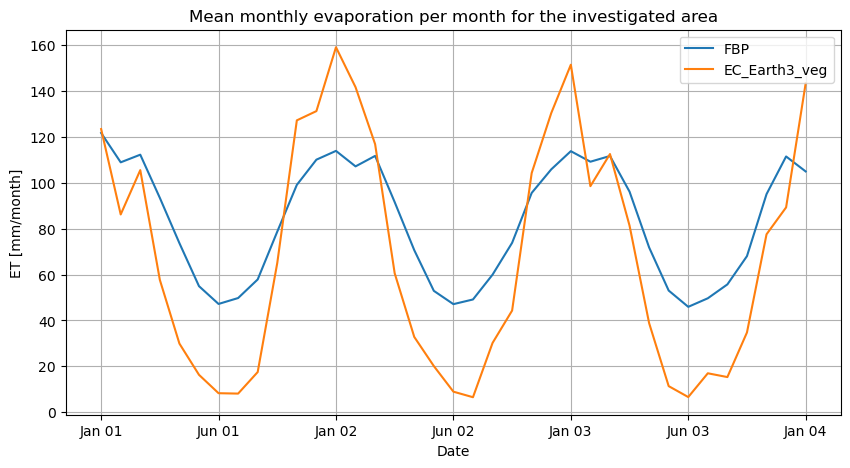

In [6]:
plt.figure(figsize = (10 , 5))

plt.plot(ET_mean_UKESM1_0_LL[0:37] , label = 'UKESM1_0_LL')
plt.plot(ET_mean_CESM2[0:37] , label = 'CESM2')
plt.plot(ET_mean_E3SM_1_1[0:37] , label = 'E3SM_1_1')
plt.plot(ET_mean_IPSL_CM6A_LR[0:37] , label = 'IPSL_CM6A_LR')

plt.xlabel('Date')
plt.ylabel('ET [mm/month]')
plt.title('Mean daily evaporation per month for the investigated area')
plt.xticks([0 , 6 , 12 , 18 , 24 , 30 , 36] , ['Jan 01' , 'Jun 01' , 'Jan 02' ,  'Jun 02' , 'Jan 03' , 'Jun 03' , 'Jan 04'])
plt.grid()
plt.legend();

plt.figure(figsize = (10 , 5))
#plt.plot(ET_mean_LFE , label = 'LandFLuxEval')
plt.plot(ET_mean_DOLCE_v3[0:37] , label = 'DOLCE_v3')
plt.plot(ET_mean_CMCC_ESM2[0:37] , label = 'CMCC_ESM2')
plt.plot(ET_mean_HadGEM3_GC31_LL[0:37] , label = 'HadGEM3_GC31_LL')
plt.plot(ET_mean_MIROC6[0:37] , label = 'MIROC6')
plt.xlabel('Date')
plt.ylabel('ET [mm/month]')
plt.title('Mean monthly evaporation per month for the investigated area')
plt.xticks([0 , 6 , 12 , 18 , 24 , 30 , 36] , ['Jan 01' , 'Jun 01' , 'Jan 02' ,  'Jun 02' , 'Jan 03' , 'Jun 03' , 'Jan 04'])
plt.grid()
plt.legend();

plt.figure(figsize = (10 , 5))
plt.plot(ET_mean_FBP[0:37] , label = 'FBP')
plt.plot(ET_mean_EC_Earth3_veg[0:37] , label = 'EC_Earth3_veg')
plt.xlabel('Date')
plt.ylabel('ET [mm/month]')
plt.title('Mean monthly evaporation per month for the investigated area')
plt.xticks([0 , 6 , 12 , 18 , 24 , 30 , 36] , ['Jan 01' , 'Jun 01' , 'Jan 02' ,  'Jun 02' , 'Jan 03' , 'Jun 03' , 'Jan 04'])
plt.grid()
plt.legend();

The average yearly precipitation for East Brazil is equal to: 902.62 mm



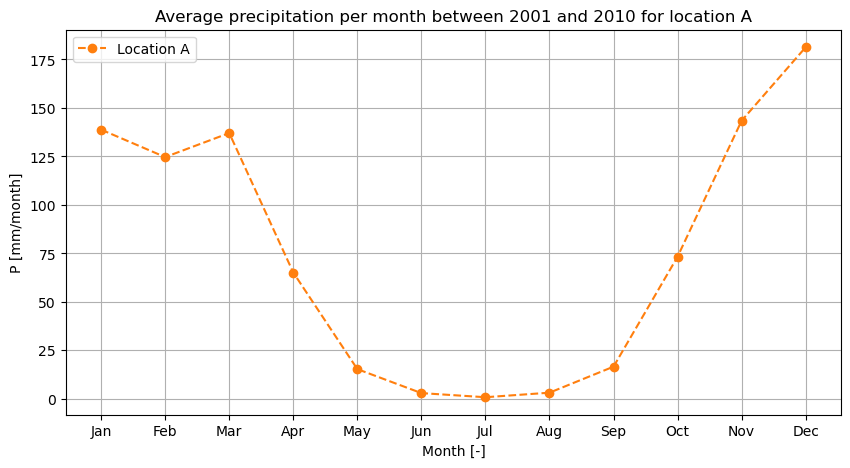

In [7]:
"""Precipitation data EB"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly.nc' , engine = 'netcdf4')

P_mean = np.zeros(t)
avg_P = np.zeros(12)

for i in range(len(P_mean)):
    P_mean[i] = Prec_monthly_2001_2010.pr[i , 204:212 , 134*2:138*2].mean() * t_day * dpm[i]

from collections import defaultdict

# Create an empty dictionary to store the monthly averages
monthly_averages = defaultdict(list)

# loop through the data and group the values by month
for i, value in enumerate(P_mean):
    month = (i % 12) + 1
    monthly_averages[month].append(value)

# calculate the mean for each month
for month, values in monthly_averages.items():
    avg_P[month - 1] = sum(values) / len(values)

plt.figure(figsize = (10 , 5 ))
#plt.plot(P_mean/ET_mean_LFE , label = 'P/ET per month LFE')
plt.plot(avg_P , label = 'Location A' , color = 'C1' , marker = 'o' , linestyle = 'dashed')

plt.grid()
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.ylabel('P [mm/month]')
plt.xlabel('Month [-]')
plt.title('Average precipitation per month between 2001 and 2010 for location A')
plt.legend();
          
p_01_10 = np.sum(P_mean[0:12]) + np.sum(P_mean[12:24]) + np.sum(P_mean[24:36]) + np.sum(P_mean[36:48]) + np.sum(P_mean[48:60]) + np.sum(P_mean[60:72]) + np.sum(P_mean[72:84]) + np.sum(P_mean[84:96]) + np.sum(P_mean[96:108]) + np.sum(P_mean[108:120])
print(f'The average yearly precipitation for East Brazil is equal to: {p_01_10/10:.2f} mm')
print()

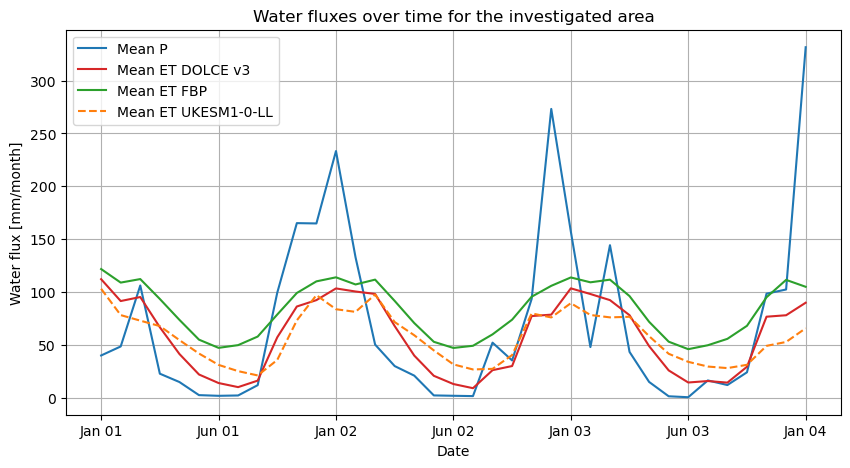

In [8]:
plt.figure(figsize = (10, 5))
plt.plot(P_mean[0:37] , label = 'Mean P')
#plt.plot(ET_mean_LFE , label = 'Mean ET LFE')
plt.plot(ET_mean_DOLCE_v3[0:37] , label = 'Mean ET DOLCE v3' , color = 'C3')
plt.plot(ET_mean_FBP[0:37] , label = 'Mean ET FBP' , color = 'C2')
plt.plot(ET_mean_UKESM1_0_LL[0:37] , label = 'Mean ET UKESM1-0-LL' , color = 'C1' , linestyle = 'dashed')
#plt.plot(ET_mean_EC_Earth3_veg , label = 'Mean ET EC_Earth3_veg')
plt.title('Water fluxes over time for the investigated area')
plt.xlabel('Date')
plt.ylabel('Water flux [mm/month]')
plt.legend()
plt.xticks([0 , 6 , 12 , 18 , 24 , 30 , 36] , ['Jan 01' , 'Jun 01' , 'Jan 02' ,  'Jun 02' , 'Jan 03' , 'Jun 03' , 'Jan 04'])
plt.grid()

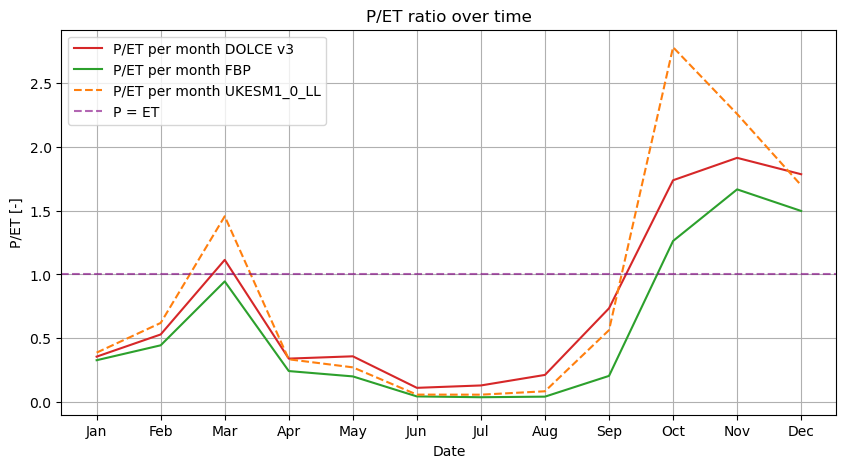

In [9]:
plt.figure(figsize = (10 , 5 ))
#plt.plot(P_mean/ET_mean_LFE , label = 'P/ET per month LFE')
plt.plot(P_mean[0:12]/ET_mean_DOLCE_v3[0:12] , label = 'P/ET per month DOLCE v3' , color = 'C3')
plt.plot(P_mean[0:12]/ET_mean_FBP[0:12] , label = 'P/ET per month FBP' , color = 'C2')
plt.plot(P_mean[0:12]/ET_mean_UKESM1_0_LL[0:12] , label = 'P/ET per month UKESM1_0_LL' , color = 'C1' , linestyle = 'dashed')
#plt.plot(P_mean/ET_mean_EC_Earth3_veg , label = 'P/ET per month EC_Earth3_veg' , color = 'C2')
plt.grid()
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.ylabel('P/ET [-]')
plt.xlabel('Date')
plt.title('P/ET ratio over time')
plt.axhline(1 , linestyle = 'dashed' , color = 'purple' , alpha = 0.6 , label = 'P = ET' )
plt.legend();

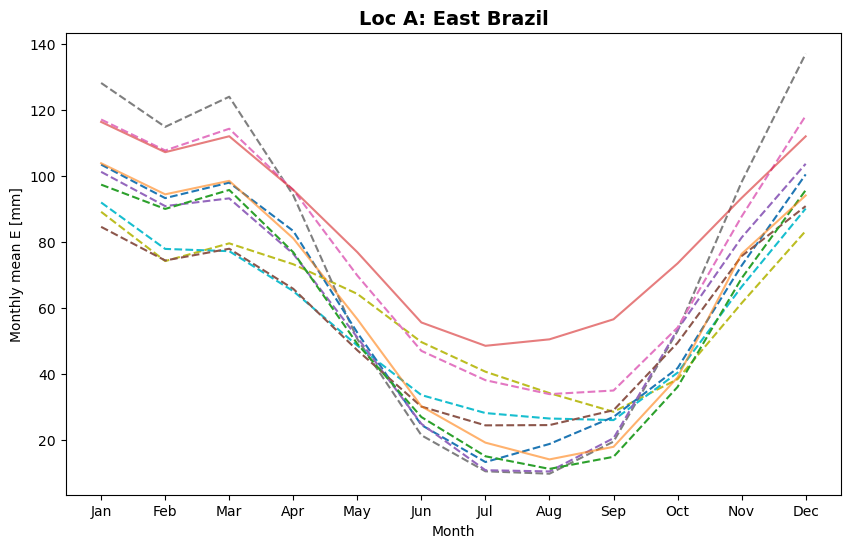

In [70]:
plt.figure(figsize= (10 ,6))
#plt.grid()
plt.xlabel('Month')
plt.ylabel('Monthly mean E [mm]')
plt.title('Loc A: East Brazil' , fontweight = 'bold' , fontsize = 14)

label = ['UK' , 'EE' , 'C2' , 'CE' , 'E3' , 'HG' , 'IP' , 'M6' , 'DO' , 'FB']
color = ['C8' , 'C7' , 'C9' , 'C10', 'C4' , 'C5' , 'C2' , 'C6' , 'C1' , 'C3']

for i in range(0 , 8):
    plt.plot(ET_pm_mean[i + 2] , label = label[i], color = color[i] , linestyle = 'dashed')

plt.plot(ET_pm_mean[0] , label = 'DO' , color = 'C1' , alpha = 0.6)
plt.plot(ET_pm_mean[1] , label = 'FB' , color = 'C3' , alpha = 0.6)
#plt.plot(P_pm_mean , 'bd-' , label = 'GWSP3 P', alpha = 0.4)
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec']);

#plt.legend();

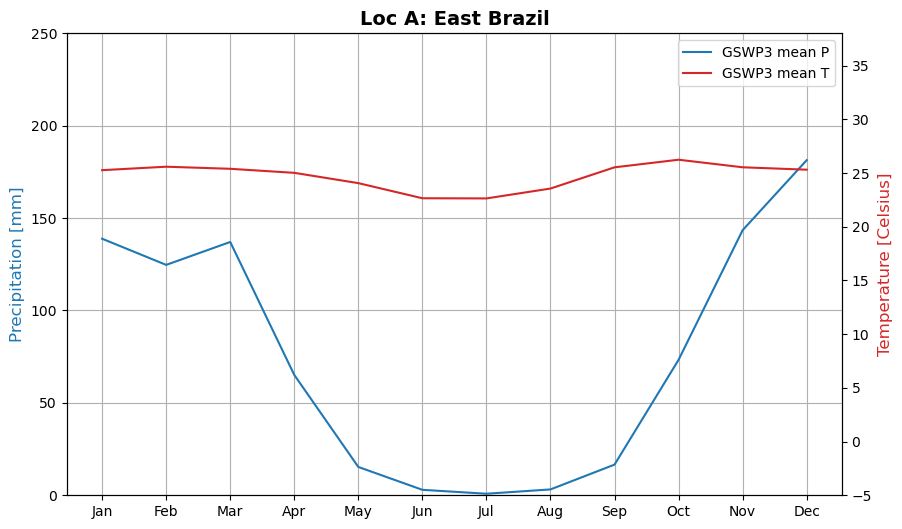

In [11]:
"""Precipitation"""

P_pm_mean = np.zeros(12)
P_an = np.zeros(120)
mpy = np.arange(0 , 120 , 12)

for i in range(12):
    #Array per month average
    P_pm_mean[i] = np.mean([P_mean[i] , P_mean[i + 12] , P_mean[i + 24] ,  P_mean[i+36] , 
    P_mean[i + 48] , P_mean[i + 60] , P_mean[i + 72] , P_mean[i + 84] , P_mean[i + 96] , 
    P_mean[i + 108]])
    
for j in range(len(mpy)):   
    for i in range(12):
        P_an[mpy[j] + i] = P_mean[mpy[j]+i] - P_pm_mean[i]


# Create figure and axis objects
fig, ax1 = plt.subplots(figsize = (10 , 6))

# Create second axis ax2 that shares the x-axis with ax1
ax2 = ax1.twinx()

#WA

t = 3652

Tas_mean = np.zeros(t)

for i in range(t):
    Tas_mean[i] = Tas.tas[i , : , :].mean()
    
data = Tas_mean
avg = np.zeros(12)
    

# Create an empty dictionary to store the monthly averages
monthly_averages = defaultdict(list)

# loop through the data and group the values by month
for i, value in enumerate(data):
    date = datetime.datetime(2001, 1, 1) + datetime.timedelta(i)
    if date.year >= 2001 and date.year <= 2010:
        month = date.month
        monthly_averages[month].append(value)

# calculate the mean for each month
for month, values in monthly_averages.items():
    avg[month - 1] = sum(values) / len(values)
    
# Plot the data and store the line objects
P, = ax1.plot(P_pm_mean, color = 'C0', label = 'GSWP3 mean P')
T, = ax2.plot(avg - 273.15, color = 'C3', label = 'GSWP3 mean T')

# Set the x-ticks
ax1.set_xticks(np.arange(0, 12, 1))

# Set the x-tick labels
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set the y-axis labels
ax1.set_ylabel('Precipitation [mm]', color='C0' , fontsize = 12)
ax2.set_ylabel('Temperature [Celsius]', color='C3' , fontsize = 12)

ax2.set_ylim(-5 , 38)
ax1.set_ylim(0 , 250)

# Create the legend
ax1.legend([P, T], ['GSWP3 mean P', 'GSWP3 mean T'], loc='best')
ax1.grid(True)

plt.title('Loc A: East Brazil' , fontweight = 'bold' , fontsize = 14);

In [12]:
"""Seasonality index"""

P_annual = np.sum(P_pm_mean)
SI = np.zeros(len(P_pm_mean))

for i in range(12):
    SI[i] = (1 / P_annual) * np.abs(P_pm_mean[i] - (P_annual/12))
    
print(f'The SI is equal to: {np.sum(SI):.2f}')

The SI is equal to: 0.77


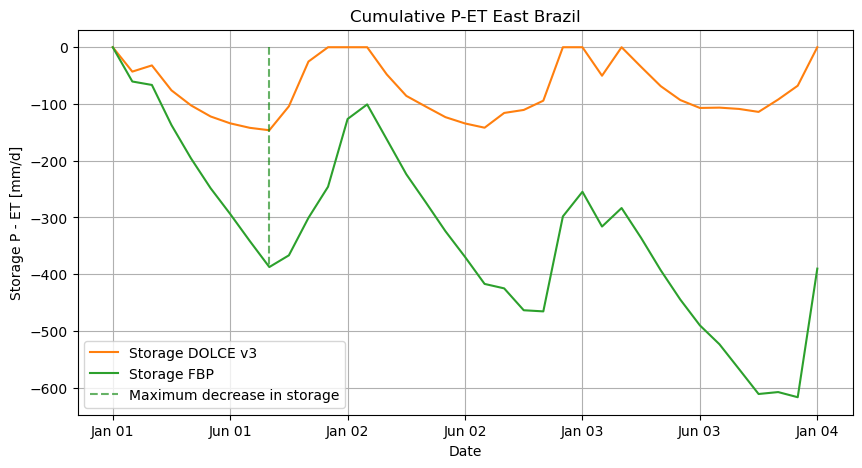

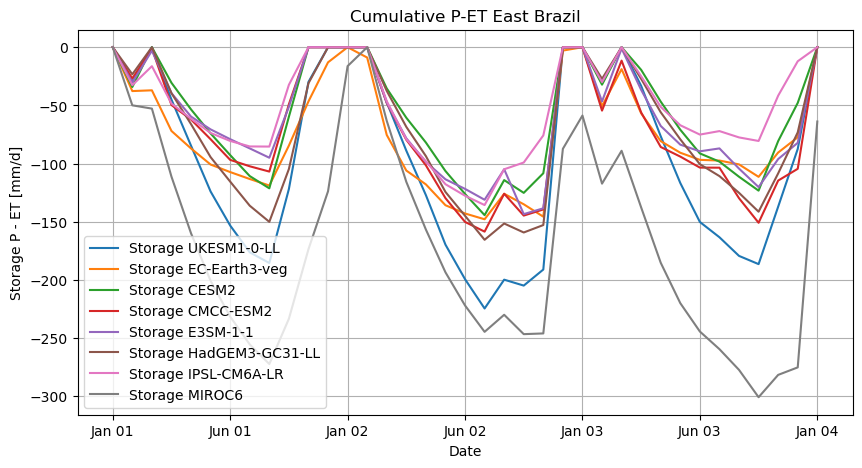

In [13]:
"""Storage"""

t = 120

S1_LFE = np.zeros(t)
S1_DOLCE_v3 = np.zeros(t)
S1_FBP = np.zeros(t)
S1_UKEMS1_0_LL = np.zeros(t)
S1_EC_Earth3_veg = np.zeros(t)
S1_UKESM1_0_LL = np.zeros(t)
S1_CESM2 = np.zeros(t)
S1_CMCC_ESM2 = np.zeros(t)
S1_E3SM_1_1 = np.zeros(t)
S1_HadGEM3_GC31_LL = np.zeros(t)
S1_IPSL_CM6A_LR = np.zeros(t)
S1_MIROC6 = np.zeros(t)

for i in range(t):
    #S1_LFE[i] = S1_LFE[i - 1] + P_mean[i] - ET_mean_LFE[i]
    S1_DOLCE_v3[i] = S1_DOLCE_v3[i - 1] + (P_mean[i] - ET_mean_DOLCE_v3[i])
    S1_FBP[i] = S1_FBP[i - 1] + (P_mean[i] - ET_mean_FBP[i])
    S1_UKESM1_0_LL[i] = S1_UKESM1_0_LL[i - 1] + (P_mean[i] - ET_mean_UKESM1_0_LL[i])
    S1_EC_Earth3_veg[i] = S1_EC_Earth3_veg[i - 1] + (P_mean[i] - ET_mean_EC_Earth3_veg[i])
    S1_CESM2[i] = S1_CESM2[i - 1] + (P_mean[i] - ET_mean_CESM2[i])
    S1_CMCC_ESM2[i] = S1_CMCC_ESM2[i - 1] + (P_mean[i] - ET_mean_CMCC_ESM2[i])
    S1_E3SM_1_1[i] = S1_E3SM_1_1[i - 1] + (P_mean[i] - ET_mean_E3SM_1_1[i])
    S1_HadGEM3_GC31_LL[i] = S1_HadGEM3_GC31_LL[i - 1] + (P_mean[i] - ET_mean_HadGEM3_GC31_LL[i])
    S1_IPSL_CM6A_LR[i] =  S1_IPSL_CM6A_LR[i - 1] + (P_mean[i] - ET_mean_IPSL_CM6A_LR[i])
    S1_MIROC6[i] = S1_MIROC6[i - 1] + (P_mean[i] - ET_mean_MIROC6[i])
    
    if S1_DOLCE_v3[i] > 0:
        S1_DOLCE_v3[i] = 0
    if S1_FBP[i] > 0:
        S1_FBP[i] = 0
    if S1_UKESM1_0_LL[i] > 0:
        S1_UKESM1_0_LL[i] = 0
    if S1_EC_Earth3_veg[i] > 0:
        S1_EC_Earth3_veg[i] = 0
    if  S1_CESM2[i] > 0:
         S1_CESM2[i] = 0
    if  S1_CMCC_ESM2[i] > 0:
         S1_CMCC_ESM2[i] = 0
    if S1_E3SM_1_1[i] > 0:
        S1_E3SM_1_1[i] = 0
    if S1_HadGEM3_GC31_LL[i] > 0:
        S1_HadGEM3_GC31_LL[i] = 0
    if S1_IPSL_CM6A_LR[i] > 0:
        S1_IPSL_CM6A_LR[i] = 0
    if S1_MIROC6[i] > 0:
        S1_MIROC6[i] = 0
    
    S1_LFE[0] = 0
    S1_DOLCE_v3[0] = 0
    S1_FBP[0] = 0 
    S1_EC_Earth3_veg[0] = 0
    S1_UKESM1_0_LL[0] = 0
    S1_CESM2[0] = 0
    S1_CMCC_ESM2[0] = 0
    S1_E3SM_1_1[0] = 0 
    S1_HadGEM3_GC31_LL[0] = 0
    S1_IPSL_CM6A_LR[0] = 0
    S1_MIROC6[0] = 0

"""Benchmark products"""

plt.figure(figsize = (10 , 5))
plt.ylabel('Storage P - ET [mm/d]')
#plt.plot(S_LFE , label = 'Storage according to LFE')
plt.plot(S1_DOLCE_v3[0:37] , label = 'Storage DOLCE v3' , color= 'C1')
plt.plot(S1_FBP[0:37] , label = 'Storage FBP' , color = 'C2')
plt.plot([8 , 8] , [S1_FBP[0] , S1_FBP[8]] , color = 'green' , linestyle = 'dashed' , alpha = 0.6 , label = 'Maximum decrease in storage')
plt.xticks([0 , 6 , 12 , 18 , 24 , 30 , 36] , ['Jan 01' , 'Jun 01' , 'Jan 02' ,  'Jun 02' , 'Jan 03' , 'Jun 03' , 'Jan 04'])
plt.xlabel('Date')
plt.title('Cumulative P-ET East Brazil')
plt.grid()
plt.legend();

"""LS3MIP"""

plt.figure(figsize = (10 , 5))
plt.ylabel('Storage P - ET [mm/d]')
plt.plot(S1_UKESM1_0_LL[0:37] , label = 'Storage UKESM1-0-LL')
plt.plot(S1_EC_Earth3_veg[0:37] , label = 'Storage EC-Earth3-veg')
plt.plot(S1_CESM2[0:37] , label = 'Storage CESM2')
plt.plot(S1_CMCC_ESM2[0:37] , label = 'Storage CMCC-ESM2')
plt.plot(S1_E3SM_1_1[0:37] , label = 'Storage E3SM-1-1')
plt.plot(S1_HadGEM3_GC31_LL[0:37] , label = 'Storage HadGEM3-GC31-LL')
plt.plot(S1_IPSL_CM6A_LR[0:37] , label = 'Storage IPSL-CM6A-LR')
plt.plot(S1_MIROC6[0:37] , label = 'Storage MIROC6')

plt.xticks([0 , 6 , 12 , 18 , 24 , 30 , 36] , ['Jan 01' , 'Jun 01' , 'Jan 02' ,  'Jun 02' , 'Jan 03' , 'Jun 03' , 'Jan 04'])
plt.xlabel('Date')
plt.title('Cumulative P-ET East Brazil')
plt.grid()
plt.legend();

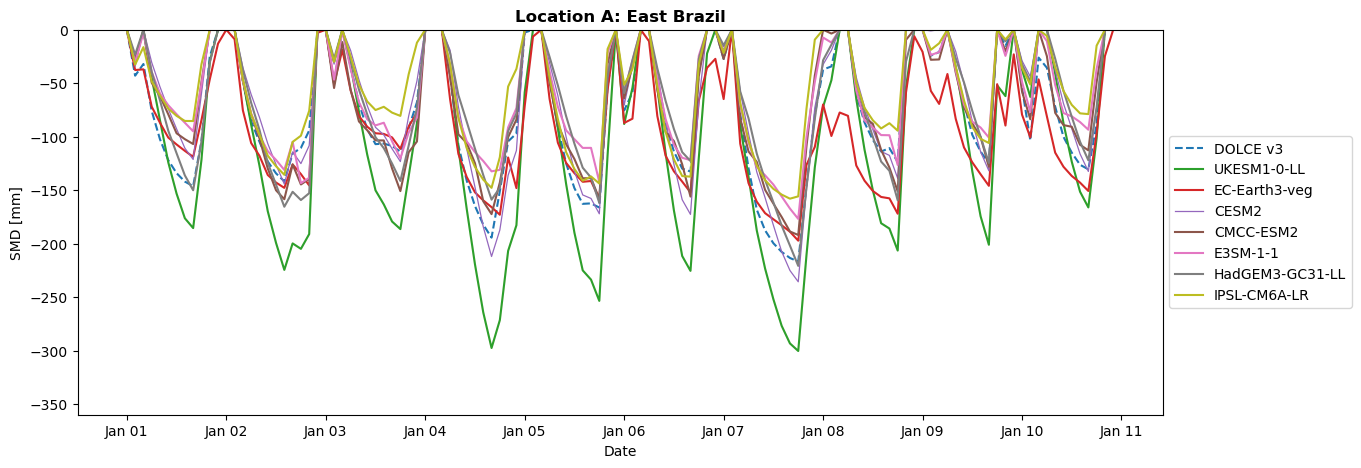

In [14]:
"""Benchmark products"""

plt.figure(figsize = (14 , 5))
plt.ylabel('SMD [mm]')
#plt.plot(S1_LFE , label = 'Storage according to LFE')
plt.plot(S1_DOLCE_v3 , label = 'DOLCE v3' , linestyle = 'dashed')
#plt.plot(S1_FBP , label = 'FBP' , linestyle = 'dashed')
#plt.plot([81 , 81] , [S1_FBP[73] , S1_FBP[81]] , color = 'red' , linestyle = 'dashed' , alpha = 0.6 , label = 'Maximum decrease in storage FBP')
#plt.plot([81 , 81] , [S1_DOLCE_v3[73] , S1_DOLCE_v3[81]] , color = 'blue' , linestyle = 'dashed' , alpha = 0.6 , label = 'Maximum decrease in storage DOLCE v3')
plt.xticks(np.arange(0 , 121 , 12) , ['Jan 01' , 'Jan 02' ,'Jan 03' ,'Jan 04' ,'Jan 05' ,'Jan 06' ,'Jan 07' ,'Jan 08' ,'Jan 09' ,'Jan 10' , 'Jan 11'])
plt.xlabel('Date')
plt.title('Location A: East Brazil' , fontweight = 'bold')
plt.ylim(-500 , 0)
plt.grid()
plt.legend();

S1 = [S1_DOLCE_v3 , S1_FBP, S1_UKESM1_0_LL , S1_EC_Earth3_veg , S1_CESM2 ,  S1_CMCC_ESM2 , S1_E3SM_1_1 , S1_HadGEM3_GC31_LL , S1_IPSL_CM6A_LR , S1_MIROC6]

"""LS3MIP"""

plt.ylabel('SMD [mm]')
plt.plot(S1_UKESM1_0_LL , alpha = 0.1)
plt.plot(S1_UKESM1_0_LL , label = 'UKESM1-0-LL')
plt.plot(S1_EC_Earth3_veg , label = 'EC-Earth3-veg')
plt.plot(S1_CESM2 , label = 'CESM2' , linewidth = 0.9)
plt.plot(S1_CMCC_ESM2 , label = 'CMCC-ESM2')
plt.plot(S1_E3SM_1_1 , label = 'E3SM-1-1')
plt.plot(S1_HadGEM3_GC31_LL , label = 'HadGEM3-GC31-LL')
plt.plot(S1_IPSL_CM6A_LR , label = 'IPSL-CM6A-LR')
#plt.plot(S1_MIROC6 , label = 'MIROC6' , linewidth = 0.9)
plt.xlabel('Date')
plt.ylim(-360 , 0)
#plt.title('Cumulative P-E East Brazil')
plt.xticks(np.arange(0 , 121 , 12) , ['Jan 01' , 'Jan 02' ,'Jan 03' ,'Jan 04' ,'Jan 05' ,'Jan 06' ,'Jan 07' ,'Jan 08' ,'Jan 09' ,'Jan 10' , 'Jan 11'])
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [15]:
print('Two dry periods in time:')

print()
print(colored(f'The maximum decrease in storage between February 2007 and October 2007' , 'blue'))

print('----' * 24)
print(f'The maximum decrease in storage in 2007 for  FBP             is equal to:           {S1_FBP[73] - S1_FBP[81]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  MIROC6          is equal to:           {S1_MIROC6[73] - S1_MIROC6[81]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  UKESM1_0_LL     is equal to:           {S1_UKESM1_0_LL[73] - S1_UKESM1_0_LL[81]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  CESM2           is equal to:           {S1_CESM2[73] - S1_CESM2[81]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  HadGEM-GC31-LL  is equal to:           {S1_HadGEM3_GC31_LL[73] - S1_HadGEM3_GC31_LL[81]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  DOLCE v3        is equal to:           {S1_DOLCE_v3[73] - S1_DOLCE_v3[81]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  EC_Earth3_veg   is equal to:           {S1_EC_Earth3_veg[73] - S1_EC_Earth3_veg[81]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           {S1_CMCC_ESM2[73] - S1_CMCC_ESM2[81]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  E3SM-1-1        is equal to:           {S1_E3SM_1_1[73] - S1_E3SM_1_1[81]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           {S1_IPSL_CM6A_LR[73] - S1_IPSL_CM6A_LR[81]:.3f} mm')

print('----' * 24)

print('According to the soil moisture content data the maximum decrease lies between 69.78 and 91.47 mm')
print()
print('69.78 mm is the decrease for the top 50 cm of the soil and 91.47 mm is the upper boundary of the extrapolated value')

print('----' * 24)

print()
print(colored(f'The maximum decrease in storage between March 2004 and September 2004' , 'blue'))

print('----' * 24)
print(f'The maximum decrease in storage in 2007 for  FBP             is equal to:           {S1_FBP[38] - S1_FBP[44]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  MIROC6          is equal to:           {S1_MIROC6[38] - S1_MIROC6[44]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  UKESM1_0_LL     is equal to:           {S1_UKESM1_0_LL[38] - S1_UKESM1_0_LL[44]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  CESM2           is equal to:           {S1_CESM2[38] - S1_CESM2[44]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  HadGEM-GC31-LL  is equal to:           {S1_HadGEM3_GC31_LL[38] - S1_HadGEM3_GC31_LL[44]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  DOLCE v3        is equal to:           {S1_DOLCE_v3[38] - S1_DOLCE_v3[44]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  EC_Earth3_veg   is equal to:           {S1_EC_Earth3_veg[38] - S1_EC_Earth3_veg[44]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           {S1_CMCC_ESM2[38] - S1_CMCC_ESM2[44]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  E3SM-1-1        is equal to:           {S1_E3SM_1_1[38] - S1_E3SM_1_1[44]:.3f} mm')
print(f'The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           {S1_IPSL_CM6A_LR[38] - S1_IPSL_CM6A_LR[44]:.3f} mm')

print('----' * 24)

print('According to the soil moisture content data the maximum decrease lies between 71.94 and 88.41 mm')
print()
print('71.94 mm is the decrease for the top 50 cm of the soil and 88.41 mm is the upper boundary of the extrapolated value')

print('----' * 24)

Two dry periods in time:

The maximum decrease in storage between February 2007 and October 2007
------------------------------------------------------------------------------------------------
The maximum decrease in storage in 2007 for  FBP             is equal to:           470.174 mm
The maximum decrease in storage in 2007 for  MIROC6          is equal to:           400.232 mm
The maximum decrease in storage in 2007 for  UKESM1_0_LL     is equal to:           300.402 mm
The maximum decrease in storage in 2007 for  CESM2           is equal to:           235.697 mm
The maximum decrease in storage in 2007 for  HadGEM-GC31-LL  is equal to:           220.836 mm
The maximum decrease in storage in 2007 for  DOLCE v3        is equal to:           216.790 mm
The maximum decrease in storage in 2007 for  EC_Earth3_veg   is equal to:           197.254 mm
The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           191.949 mm
The maximum decrease in storage in 2007 for  E

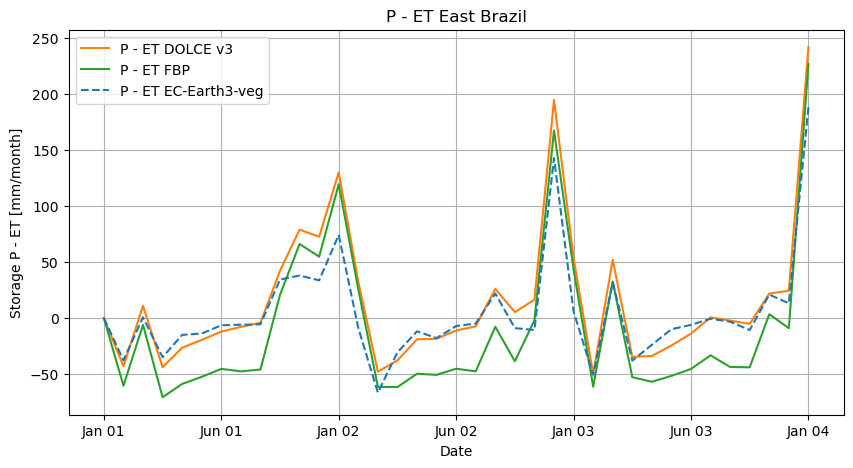

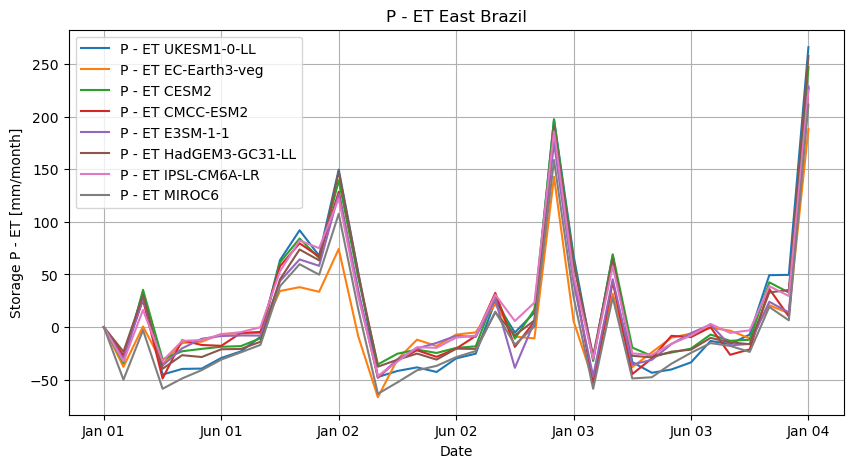

In [16]:
"""P - ET per month"""

t = 120

S_LFE = np.zeros(t)
S_DOLCE_v3 = np.zeros(t)
S_FBP = np.zeros(t)
S_UKEMS1_0_LL = np.zeros(t)
S_EC_Earth3_veg = np.zeros(t)
S_UKESM1_0_LL = np.zeros(t)
S_CESM2 = np.zeros(t)
S_CMCC_ESM2 = np.zeros(t)
S_E3SM_1_1 = np.zeros(t)
S_HadGEM3_GC31_LL = np.zeros(t)
S_IPSL_CM6A_LR = np.zeros(t)
S_MIROC6 = np.zeros(t)

for i in range(t):
    #S_LFE[i] = P_mean[i] - ET_mean_LFE[i]
    S_DOLCE_v3[i] = P_mean[i] - ET_mean_DOLCE_v3[i]
    S_FBP[i] = P_mean[i] - ET_mean_FBP[i]
    S_UKESM1_0_LL[i] = P_mean[i] - ET_mean_UKESM1_0_LL[i]
    S_EC_Earth3_veg[i] = P_mean[i] - ET_mean_EC_Earth3_veg[i]
    S_CESM2[i] = P_mean[i] - ET_mean_CESM2[i]
    S_CMCC_ESM2[i] = P_mean[i] - ET_mean_CMCC_ESM2[i]
    S_E3SM_1_1[i] = P_mean[i] - ET_mean_E3SM_1_1[i]
    S_HadGEM3_GC31_LL[i] = P_mean[i] - ET_mean_HadGEM3_GC31_LL[i]
    S_IPSL_CM6A_LR[i] =  P_mean[i] - ET_mean_IPSL_CM6A_LR[i]
    S_MIROC6[i] = P_mean[i] - ET_mean_MIROC6[i]
    S_LFE[0] = 0
    S_DOLCE_v3[0] = 0
    S_FBP[0] = 0 
    S_EC_Earth3_veg[0] = 0
    S_UKESM1_0_LL[0] = 0
    S_CESM2[0] = 0
    S_CMCC_ESM2[0] = 0
    S_E3SM_1_1[0] = 0 
    S_HadGEM3_GC31_LL[0] = 0
    S_IPSL_CM6A_LR[0] = 0
    S_MIROC6[0] = 0

"""Benchmark products"""

plt.figure(figsize = (10 , 5))
plt.ylabel('Storage P - ET [mm/month]')
#plt.plot(S_LFE , label = 'Storage according to LFE')
plt.plot(S_DOLCE_v3[0:37] , label = 'P - ET DOLCE v3' , color= 'C1')
plt.plot(S_FBP[0:37] , label = 'P - ET FBP' , color = 'C2')
plt.plot(S_EC_Earth3_veg[0:37] , label = 'P - ET EC-Earth3-veg' , linestyle = 'dashed')
plt.xticks([0 , 6 , 12 , 18 , 24 , 30 , 36] , ['Jan 01' , 'Jun 01' , 'Jan 02' ,  'Jun 02' , 'Jan 03' , 'Jun 03' , 'Jan 04'])
plt.xlabel('Date')
plt.title('P - ET East Brazil')
plt.grid()
plt.legend();

"""LS3MIP"""

plt.figure(figsize = (10 , 5))
plt.ylabel('Storage P - ET [mm/month]')
plt.plot(S_UKESM1_0_LL[0:37] , label = 'P - ET UKESM1-0-LL')
plt.plot(S_EC_Earth3_veg[0:37] , label = 'P - ET EC-Earth3-veg')
plt.plot(S_CESM2[0:37] , label = 'P - ET CESM2')
plt.plot(S_CMCC_ESM2[0:37] , label = 'P - ET CMCC-ESM2')
plt.plot(S_E3SM_1_1[0:37] , label = 'P - ET E3SM-1-1')
plt.plot(S_HadGEM3_GC31_LL[0:37] , label = 'P - ET HadGEM3-GC31-LL')
plt.plot(S_IPSL_CM6A_LR[0:37] , label = 'P - ET IPSL-CM6A-LR')
plt.plot(S_MIROC6[0:37] , label = 'P - ET MIROC6')

plt.xticks([0 , 6 , 12 , 18 , 24 , 30 , 36] , ['Jan 01' , 'Jun 01' , 'Jan 02' ,  'Jun 02' , 'Jan 03' , 'Jun 03' , 'Jan 04'])
plt.xlabel('Date')
plt.title('P - ET East Brazil')
plt.grid()
plt.legend();

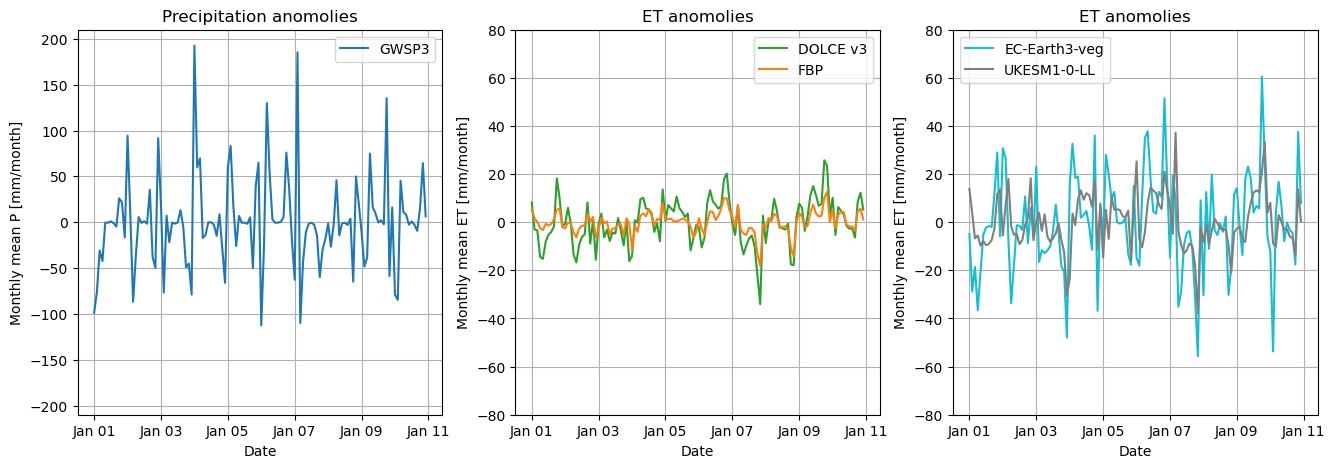

In [17]:
"""P - ET response anomolies"""


"""Precipitation"""

P_pm_mean = np.zeros(12)
P_an = np.zeros(120)
mpy = np.arange(0 , 120 , 12)

for i in range(12):
    #Array per month average
    P_pm_mean[i] = np.mean([P_mean[i] , P_mean[i + 12] , P_mean[i + 24] ,  P_mean[i+36] , 
    P_mean[i + 48] , P_mean[i + 60] , P_mean[i + 72] , P_mean[i + 84] , P_mean[i + 96] , 
    P_mean[i + 108]])
    
for j in range(len(mpy)):   
    for i in range(12):
        P_an[mpy[j] + i] = P_mean[mpy[j]+i] - P_pm_mean[i]


"""Evapotranspiration"""

ET_mean = [ET_mean_DOLCE_v3 , ET_mean_FBP, ET_mean_UKESM1_0_LL , ET_mean_EC_Earth3_veg , ET_mean_CESM2 ,  ET_mean_CMCC_ESM2 , ET_mean_E3SM_1_1 , ET_mean_HadGEM3_GC31_LL , ET_mean_IPSL_CM6A_LR , ET_mean_MIROC6]
ET_pm_mean = np.zeros((10 , 12))

for j in range(len(ET_mean)):
    for i in range(12):
        #Array per month average
        ET_pm_mean[j , i] = np.mean([ET_mean[j][i] , ET_mean[j][i + 12] , ET_mean[j][i + 24] ,  ET_mean[j][i+36] , 
        ET_mean[j][i + 48] , ET_mean[j][i + 60] , ET_mean[j][i + 72] , ET_mean[j][i + 84] , ET_mean[j][i + 96] , 
        ET_mean[j][i + 108]])

ET_an = np.zeros((10 , 120))
mpy = np.arange(0 , 120 , 12)

for m in range(len(ET_mean)):
    for j in range(len(mpy)):   
        for i in range(12):
            ET_an[m][mpy[j] + i] = ET_mean[m][mpy[j]+i] - ET_pm_mean[m][i]

            

plt.figure(figsize = (16 , 5))

plt.subplot(131)
plt.title('Precipitation anomolies')
plt.xlabel('Date')
plt.xticks(np.arange(0 , 121 , 24) , ['Jan 01' , 'Jan 03' ,'Jan 05' ,'Jan 07' ,'Jan 09' , 'Jan 11'])
plt.ylabel('Monthly mean P [mm/month]')
plt.grid()
plt.ylim(-210 , 210)
plt.plot(P_an , label = 'GWSP3')
plt.legend()

plt.subplot(132)
plt.title('ET anomolies')
plt.xlabel('Date')
plt.ylabel('Monthly mean ET [mm/month]')
plt.ylim(-80 , 80)
plt.xticks(np.arange(0 , 121 , 24) , ['Jan 01' , 'Jan 03' ,'Jan 05' ,'Jan 07' ,'Jan 09' , 'Jan 11'])
plt.grid()
plt.plot(ET_an[0] , label = 'DOLCE v3'  , color = 'C2')
plt.plot(ET_an[1] , label = 'FBP'  , color = 'C1')
plt.legend();

plt.subplot(133)
plt.title('ET anomolies')
plt.xlabel('Date')
plt.xticks(np.arange(0 , 121 , 24) , ['Jan 01' , 'Jan 03' ,'Jan 05' ,'Jan 07' ,'Jan 09' , 'Jan 11'])
plt.ylabel('Monthly mean ET [mm/month]')
plt.ylim(-80 , 80)
plt.grid()
plt.plot(ET_an[3] , label = 'EC-Earth3-veg'  , color = 'C9')
plt.plot(ET_an[2] , label = 'UKESM1-0-LL'  , color = 'C7')
plt.legend();

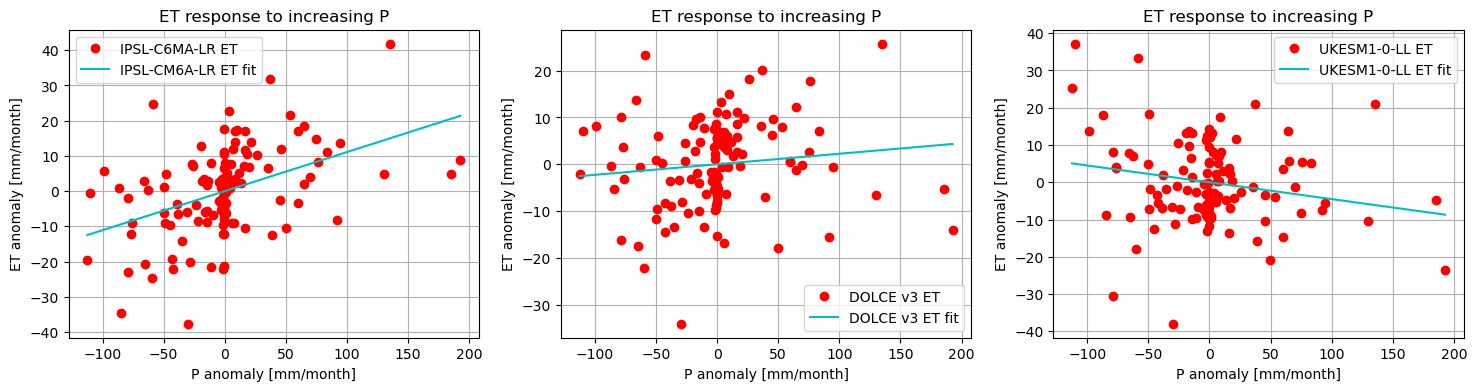

In [18]:
"""P - ET anomaly response"""

d = {'P_mean': P_an, 'UKESM1-0-LL_ET' : ET_an[2] , 'EC-Earth3-veg_ET' : ET_an[3] , 'CESM2_ET' : ET_an[4] , 'CMCC-ESM2_ET':ET_an[5] 
     ,'E3SM-1-1_ET':ET_an[6] , 'HadGEM3-GC31-LL_ET' : ET_an[7] , 'IPSL-CM6A-LR_ET':ET_an[8] , 'MIROC6_ET':ET_an[9] , 'DOLCE_v3_ET' : ET_an[0]
     , 'FBP_ET':ET_an[1]}
df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])


plt.figure(figsize = (18 , 4))
plt.subplot(131)
plt.plot(df['P_mean'] , df['IPSL-CM6A-LR_ET'] , 'ro' , label = 'IPSL-C6MA-LR ET');
#df = df[df.P_mean.notnull()]

def func(x, a, b):
    return a *  x + b

xdata = df['P_mean']
ydata = df['IPSL-CM6A-LR_ET']


popt , pcov  = curve_fit(func , xdata, ydata)
plt.ylabel('ET anomaly [mm/month]')
plt.xlabel('P anomaly [mm/month]')
plt.title('ET response to increasing P')
plt.grid()
plt.plot(xdata , func(xdata, *popt) , 'c' , label = 'IPSL-CM6A-LR ET fit')
plt.legend();

plt.subplot(132)
plt.plot(df['P_mean'] , df['DOLCE_v3_ET'] , 'ro' , label = 'DOLCE v3 ET');
#df = df[df.P_mean.notnull()]

def func(x, a, b):
    return a *  x + b

xdata = df['P_mean']
ydata = df['DOLCE_v3_ET']


popt , pcov  = curve_fit(func , xdata, ydata)
plt.ylabel('ET anomaly [mm/month]')
plt.xlabel('P anomaly [mm/month]')
plt.title('ET response to increasing P')
plt.grid()
plt.plot(xdata , func(xdata, *popt) , 'c' , label = 'DOLCE v3 ET fit')
plt.legend();

plt.subplot(133)
plt.plot(df['P_mean'] , df['UKESM1-0-LL_ET'] , 'ro' , label = 'UKESM1-0-LL ET');
#df = df[df.P_mean.notnull()]

def func(x, a, b):
    return a *  x + b

xdata = df['P_mean']
ydata = df['UKESM1-0-LL_ET']


popt , pcov  = curve_fit(func , xdata, ydata)
plt.ylabel('ET anomaly [mm/month]')
plt.xlabel('P anomaly [mm/month]')
plt.title('ET response to increasing P')
plt.grid()
plt.plot(xdata , func(xdata, *popt) , 'c' , label = 'UKESM1-0-LL ET fit')
plt.legend();

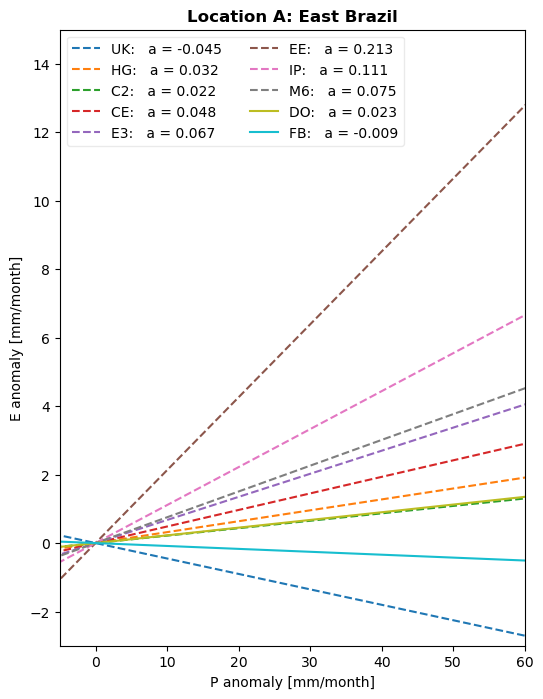

In [19]:
"""Linear function"""

d = {'P_mean': P_an, 'UKESM1-0-LL_ET' : ET_an[2] , 'EC-Earth3-veg_ET' : ET_an[3] , 'CESM2_ET' : ET_an[4] , 'CMCC-ESM2_ET':ET_an[5] 
     ,'E3SM-1-1_ET':ET_an[6] , 'HadGEM3-GC31-LL_ET' : ET_an[7] , 'IPSL-CM6A-LR_ET':ET_an[8] , 'MIROC6_ET':ET_an[9] , 'DOLCE_v3_ET' : ET_an[0]
     , 'FBP_ET':ET_an[1]}
df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])

def func(x, a , b):
    return a * x + b

label_a = ['UK'  ,  'HG' , 'C2' , 'CE' , 'E3'  , 'EE' , 'IP' , 'M6' , 'DO' , 'FB']
label = ['UKESM1-0-LL'  ,  'HadGEM3-GC31-LL' , 'CESM2' , 'CMCC-ESM2' , 'E3SM-1-1'  , 'EC-Earth3-veg' , 'IPSL-CM6A-LR' , 'MIROC6' , 'DOLCE_v3' , 'FBP']
y = df['UKESM1-0-LL_ET'] , df['HadGEM3-GC31-LL_ET'] , df['CESM2_ET'] , df['CMCC-ESM2_ET'] , df['E3SM-1-1_ET'] , df['EC-Earth3-veg_ET'] , df['IPSL-CM6A-LR_ET'] , df['MIROC6_ET'] , df['DOLCE_v3_ET'] , df['FBP_ET']
linestyle = ['dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'solid' , 'solid']
S = np.zeros(len(label))
a = np.zeros(len(label))

plt.figure(figsize = (6 , 8))

for i in range(len(label)):
    xdata = df['P_mean']
    ydata = y[i]
    popt , pcov  = curve_fit(func , xdata, ydata)
    S[i] = func(xdata[0] , *popt)
    a[i] = popt[0]
    plt.plot(xdata , func(xdata, *popt) , label = f'{label_a[i]}:   a = {a[i]:.3f}' , linestyle = linestyle[i]);


#Adjust xlim and ylim manually if needed    

plt.title('Location A: East Brazil' , fontweight = 'bold')
plt.xlim(-5 , 60)
plt.ylim(-3, 15)
plt.ylabel('E anomaly [mm/month]')
plt.xlabel('P anomaly [mm/month]')
plt.legend(framealpha = 0.4 , ncols = 2);

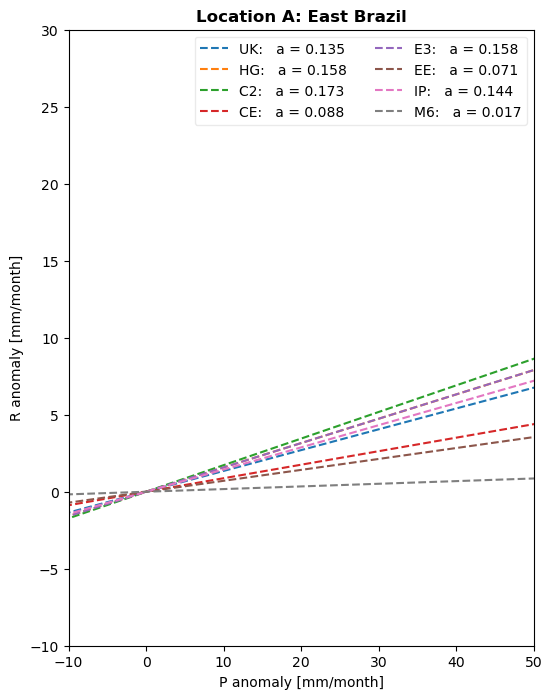

In [20]:
"""P - R response anomolies"""

"""Run-off"""

R_mean = [R_UKESM1_0_LL , R_EC_Earth3_veg , R_CESM2 ,  R_CMCC_ESM2 , R_E3SM_1_1 , R_HadGEM3_GC31_LL , R_IPSL_CM6A_LR , R_MIROC6]
R_pm_mean = np.zeros((8 , 12))

for j in range(len(R_mean)):
    for i in range(12):
        #Array per month average
        R_pm_mean[j , i] = np.mean([R_mean[j][i] , R_mean[j][i + 12] , R_mean[j][i + 24] ,  R_mean[j][i+36] , 
        R_mean[j][i + 48] , R_mean[j][i + 60] , R_mean[j][i + 72] , R_mean[j][i + 84] , R_mean[j][i + 96] , 
        R_mean[j][i + 108]])

R_an = np.zeros((10 , 120))
mpy = np.arange(0 , 120 , 12)

for m in range(len(R_mean)):
    for j in range(len(mpy)):   
        for i in range(12):
            R_an[m][mpy[j] + i] = R_mean[m][mpy[j]+i] - R_pm_mean[m][i]
            
"""Linear function"""

d = {'P_mean': P_an, 'UKESM1-0-LL' : R_an[0] , 'EC-Earth3-veg' : R_an[1] , 'CESM2' : R_an[2] , 'CMCC-ESM2':R_an[3] 
     ,'E3SM-1-1':R_an[4] , 'HadGEM3-GC31-LL' : R_an[5] , 'IPSL-CM6A-LR':R_an[6] , 'MIROC6':R_an[7]}
df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])

def func(x, a , b):
    return a * x + b

label_a = ['UK'  ,  'HG' , 'C2' , 'CE' , 'E3'  , 'EE' , 'IP' , 'M6']
label = ['UKESM1-0-LL'  ,  'HadGEM3-GC31-LL' , 'CESM2' , 'CMCC-ESM2' , 'E3SM-1-1'  , 'EC-Earth3-veg' , 'IPSL-CM6A-LR' , 'MIROC6']
y = df['UKESM1-0-LL'] , df['HadGEM3-GC31-LL'] , df['CESM2'] , df['CMCC-ESM2'] , df['E3SM-1-1'] , df['EC-Earth3-veg'] , df['IPSL-CM6A-LR'] , df['MIROC6']
linestyle = ['dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed']
S = np.zeros(len(label))
a = np.zeros(len(label))

plt.figure(figsize = (6 , 8))

for i in range(len(label)):
    xdata = df['P_mean']
    ydata = y[i]
    popt , pcov  = curve_fit(func , xdata, ydata)
    S[i] = func(xdata[0] , *popt)
    a[i] = popt[0]
    plt.plot(xdata , func(xdata, *popt) , label = f'{label_a[i]}:   a = {a[i]:.3f}' , linestyle = linestyle[i]);


#Adjust xlim and ylim manually if needed    

plt.title('Location A: East Brazil' , fontweight = 'bold')
plt.ylim(-10 , 30)
#plt.grid()
plt.xlim(-10 , 50)
plt.ylabel('R anomaly [mm/month]')
plt.xlabel('P anomaly [mm/month]')
plt.legend(framealpha = 0.4 , ncols = 2);

------------------------------------------------
LSMs
------------------------------------------------
The mean monthly E is: 59.736 from UKESM1-0-LL_ET
The mean monthly E is: 71.790 from EC-Earth3-veg_ET
The mean monthly E is: 56.002 from CESM2_ET
The mean monthly E is: 60.780 from CMCC-ESM2_ET
The mean monthly E is: 59.845 from E3SM-1-1_ET
The mean monthly E is: 56.168 from HadGEM3-GC31-LL_ET
The mean monthly E is: 56.507 from IPSL-CM6A-LR_ET
The mean monthly E is: 76.591 from MIROC6_ET
------------------------------------------------
Benchmark product
------------------------------------------------
The mean monthly E is: 60.453 from DOLCE v3
The mean monthly E is: 83.239 from FBP



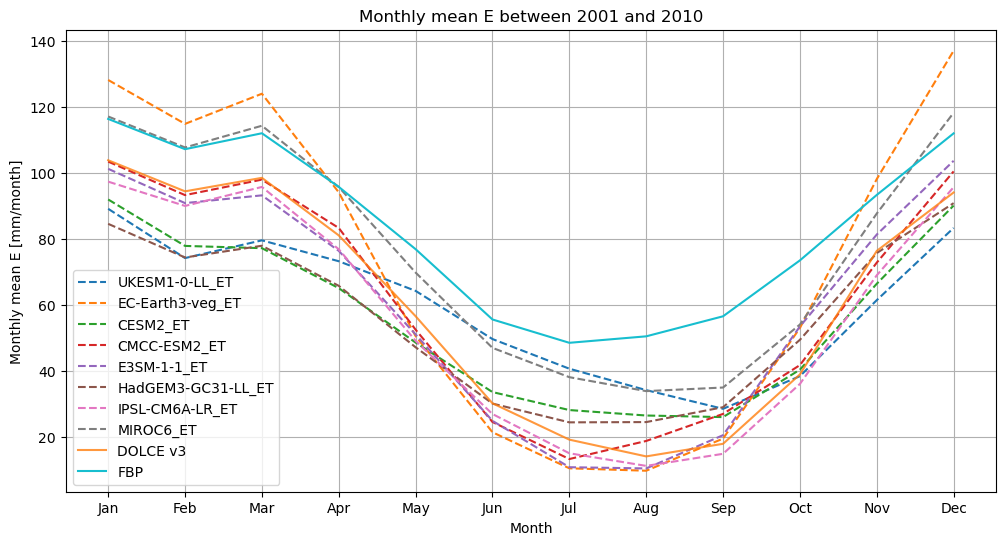

In [21]:
"""Comparing yearly E for every model"""

label = ['DOLCE_v3_ET' , 'FBP_ET' , 'UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET']

plt.figure(figsize= (12 ,6))
plt.grid()
plt.xlabel('Month')
plt.ylabel('Monthly mean E [mm/month]')
plt.title('Monthly mean E between 2001 and 2010')

for i in range(2 , 10):
    plt.plot(ET_pm_mean[i] , label = label[i] , linestyle = 'dashed')

plt.plot(ET_pm_mean[0] , label = 'DOLCE v3' , color = 'C1' , alpha = 0.8)
plt.plot(ET_pm_mean[1] , label = 'FBP' , color = 'C9')
#plt.plot(P_pm_mean , 'bd-' , label = 'GWSP3 P', alpha = 0.4)
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
    
plt.legend();

"""Average state of E"""

print('----' * 12)
print('LSMs')
print('----' * 12)

for i in range(2 , 10):
    print(f'The mean monthly E is: {ET_pm_mean[i].mean():.3f} from {label[i]}')

print('----' * 12)
print('Benchmark product')
print('----' * 12)
print(f'The mean monthly E is: {ET_pm_mean[0].mean():.3f} from DOLCE v3')
print(f'The mean monthly E is: {ET_pm_mean[1].mean():.3f} from FBP')
print()

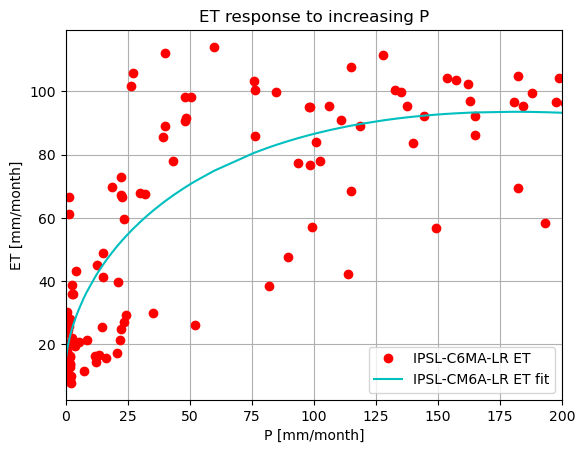

In [22]:
"""P - ET response between 2001-2010"""

#plt.plot(P_mean , ET_mean_UKESM1_0_LL , 'ro')
#plt.plot(P_mean , ET_mean_MIROC6)


d = {'P_mean': P_mean, 'UKESM1-0-LL_ET' : ET_mean_UKESM1_0_LL , 'EC-Earth3-veg_ET' : ET_mean_EC_Earth3_veg , 'CESM2_ET' : ET_mean_CESM2 , 'CMCC-ESM2_ET':ET_mean_CMCC_ESM2 
     ,'E3SM-1-1_ET':ET_mean_E3SM_1_1 , 'HadGEM3-GC31-LL_ET' : ET_mean_HadGEM3_GC31_LL , 'IPSL-CM6A-LR_ET':ET_mean_IPSL_CM6A_LR , 'MIROC6_ET': ET_mean_MIROC6 , 'DOLCE_v3_ET' : ET_mean_DOLCE_v3
     , 'FBP_ET':ET_mean_FBP}
df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])

plt.plot(df['P_mean'] , df['DOLCE_v3_ET'] , 'ro' , label = 'IPSL-C6MA-LR ET');
#df = df[df.P_mean.notnull()]

def func(x, a, b, c , d):
    return a * x**b + c * x + d

xdata = df['P_mean']
ydata = df['DOLCE_v3_ET']


popt , pcov  = curve_fit(func , xdata, ydata)
plt.ylabel('ET [mm/month]')
plt.xlabel('P [mm/month]')
plt.xlim(0 , 200)
plt.title('ET response to increasing P')
plt.grid()
plt.plot(xdata , func(xdata, *popt) , 'c' , label = 'IPSL-CM6A-LR ET fit')
plt.legend();

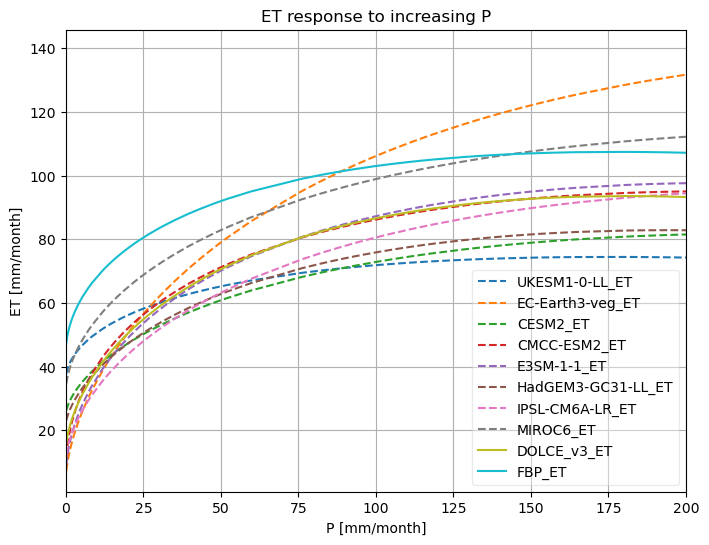

In [23]:
"""Exponential function"""

def func(x, a, b, c , d):
    return a * x**b + c * x + d

label = ['UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET' , 'DOLCE_v3_ET' , 'FBP_ET']
y = df['UKESM1-0-LL_ET'] , df['EC-Earth3-veg_ET'] , df['CESM2_ET'] , df['CMCC-ESM2_ET'] , df['E3SM-1-1_ET'] , df['HadGEM3-GC31-LL_ET'], df['IPSL-CM6A-LR_ET'] , df['MIROC6_ET'] , df['DOLCE_v3_ET'] , df['FBP_ET']
linestyle = ['dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'solid' , 'solid']
S = np.zeros(len(label))
a = np.zeros(len(label))


plt.figure(figsize = (8 , 6))
for i in range(len(label)):
    xdata = df['P_mean']
    ydata = y[i]
    popt , pcov  = curve_fit(func , xdata, ydata)
    plt.plot(xdata , func(xdata, *popt) , label = label[i] , linestyle = linestyle[i]);
    S[i] = func(xdata[0] , *popt)
    a[i] = popt[0]

plt.title('ET response to increasing P')
plt.xlim(0 , 200)
plt.grid()
plt.ylabel('ET [mm/month]')
plt.xlabel('P [mm/month]')
plt.legend(framealpha = 0.4);

#print(S)
#print(a)

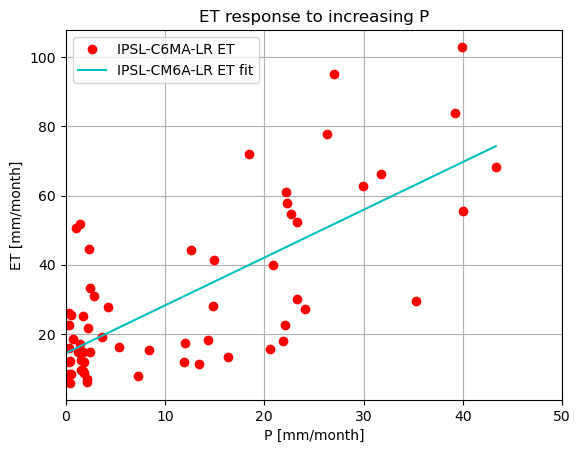

In [24]:
"""Linear part function"""

df.drop(df[df['P_mean'] > 1.5 * 30].index, inplace = True)
plt.plot(df['P_mean'] , df['IPSL-CM6A-LR_ET'] , 'ro' , label = 'IPSL-C6MA-LR ET');

def func(x, a, c):
    return a * x + c

label = ['UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET' , 'DOLCE_v3_ET' , 'FBP_ET']


xdata = df['P_mean']
ydata = df['IPSL-CM6A-LR_ET']
popt , pcov  = curve_fit(func , xdata, ydata)
plt.plot(xdata , func(xdata, *popt) , 'c' , label = 'IPSL-CM6A-LR ET fit');

plt.title('ET response to increasing P')
plt.grid()
plt.xlim(0 , 50)
plt.ylabel('ET [mm/month]')
plt.xlabel('P [mm/month]')
plt.legend();

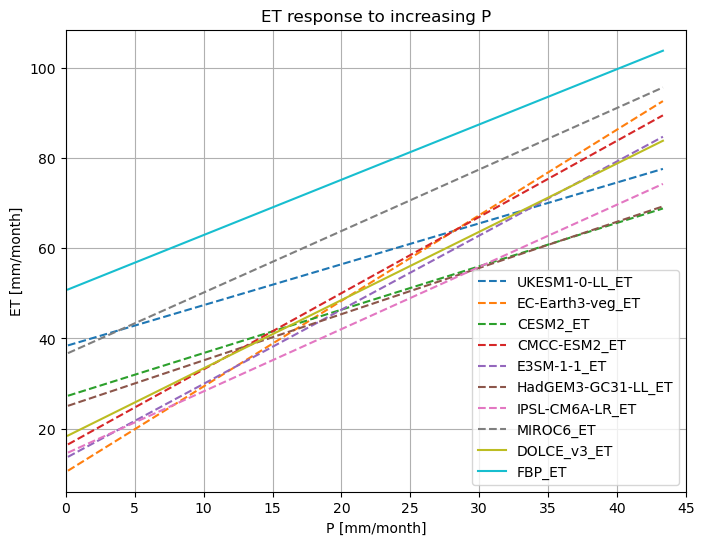

In [25]:
"""Linear part function"""

df.drop(df[df['P_mean'] > 1.5 * 30].index, inplace = True)


def func(x, a, c):
    return a * x + c

label = ['UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET' , 'DOLCE_v3_ET' , 'FBP_ET']
y = df['UKESM1-0-LL_ET'] , df['EC-Earth3-veg_ET'] , df['CESM2_ET'] , df['CMCC-ESM2_ET'] , df['E3SM-1-1_ET'] , df['HadGEM3-GC31-LL_ET'], df['IPSL-CM6A-LR_ET'] , df['MIROC6_ET'] , df['DOLCE_v3_ET'] , df['FBP_ET']
linestyle = ['dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'solid' , 'solid']
S = np.zeros(len(label))
a = np.zeros(len(label))

plt.figure(figsize = (8,6))
for i in range(len(label)):
    xdata = df['P_mean']
    ydata = y[i]
    popt , pcov  = curve_fit(func , xdata, ydata)
    plt.plot(xdata , func(xdata, *popt) , label = label[i] , linestyle = linestyle[i]);
    S[i] = popt[1]
    a[i] = popt[0]

plt.title('ET response to increasing P')
plt.grid()
plt.xlim(0 , 1.5*30)
plt.ylabel('ET [mm/month]')
plt.xlabel('P [mm/month]')
plt.legend();

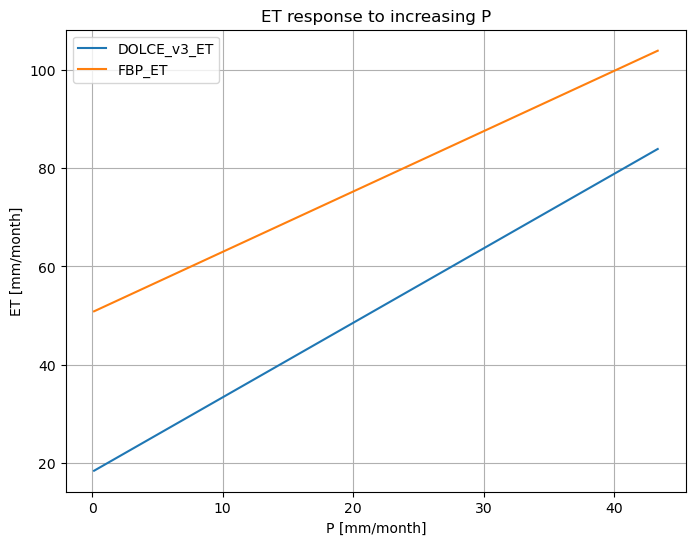

In [26]:
label = ['DOLCE_v3_ET' , 'FBP_ET']
y = df['DOLCE_v3_ET'] , df['FBP_ET']

plt.figure(figsize = (8 , 6))
for i in range(len(label)):
    xdata = df['P_mean']
    ydata = y[i]
    popt , pcov  = curve_fit(func , xdata, ydata)
    plt.plot(xdata , func(xdata, *popt) , label = label[i]);

plt.title('ET response to increasing P')
plt.grid()
plt.ylabel('ET [mm/month]')
plt.xlabel('P [mm/month]')
plt.legend();

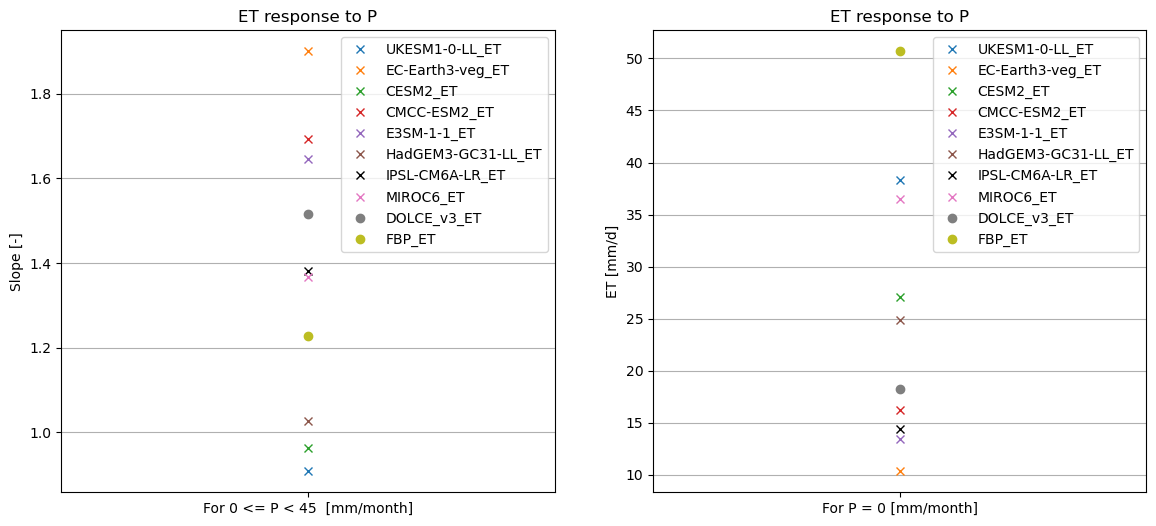

In [27]:
plt.figure(figsize = (14 , 6))
label = ['UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET' , 'DOLCE_v3_ET' , 'FBP_ET']
point = ['x' , 'x' , 'x' , 'x' , 'x' , 'x' , 'kx' , 'x' , 'o' , 'o']


plt.subplot(121)
for i in range(10):
    plt.plot(1 , a[i] , point[i] , label = label[i])
    
plt.xticks([1] , ['For 0 <= P < 45  [mm/month]'])
plt.ylabel('Slope [-]')
plt.xlim(0 , 2)
plt.grid(axis = 'y')
plt.title('ET response to P')
plt.legend();


plt.subplot(122)
for i in range(10):
    plt.plot(1 , S[i] , point[i] , label = label[i])
    
plt.xticks([1] , ['For P = 0 [mm/month]'])
plt.ylabel('ET [mm/d]')
plt.xlim(0 , 2)
plt.grid(axis = 'y')
plt.title('ET response to P')
plt.legend();

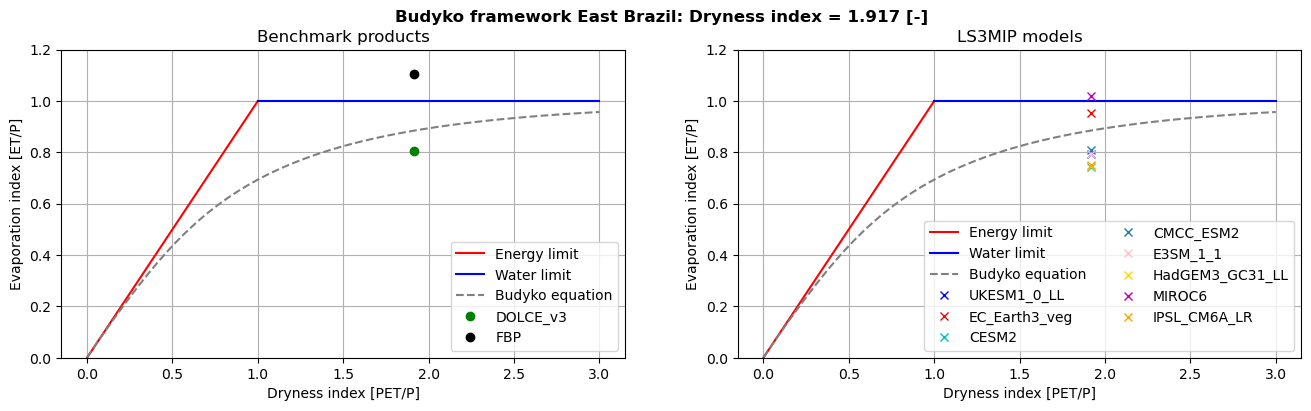

In [28]:
"""Data"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/GSWP3/Daily'


Tas = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat-16.0to-12.0lon-46.0to-42.0.nc4' , engine = 'netcdf4')
Tas_min = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat-16.0to-12.0lon-46.0to-42.0.nc4' , engine = 'netcdf4')
Tas_max = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat-16.0to-12.0lon-46.0to-42.0.nc4' , engine = 'netcdf4')

Tas2 = xr.open_dataset(home + '/tas_gswp3_2001_2010.nc')
Tas2_min = xr.open_dataset(home + '/tasmin_gswp3_2001_2010.nc')
Tas2_max = xr.open_dataset(home + '/tasmax_gswp3_2001_2010.nc')

Tav = Tas.tas[: ,  : , :]
Tmax = Tas_max.tasmax[: , : , :]
Tmin = Tas_min.tasmin[: , : , :]

Tav2 = Tas2.tas[: , 204:212, 360 - 92:360 - 84]
Tmax2 = Tas2_max.tasmax[: , 204:212 , 360 - 92:360 - 84]
Tmin2 = Tas2_min.tasmin[: , 204:212 , 360 - 92:360 - 84]

"""EP_0"""

def EP_HS(J, lat ,Tmax,Tmin,Tav):
    # extraterrestrial radation
    G = 0.0820  #MJ m^-2 min^-1
    phi = lat/360 * (2*np.pi) #rad
    d = 1 + 0.033 * np.cos(0.0172 * J) #[-]
    delta = 0.409 * np.sin(0.0172 * J - 1.39) #rad
    w = np.arccos(-np.tan(phi)*np.tan(delta)) #rad
    Re = (24*60)/np.pi * G * d * (w*np.sin(phi)*np.sin(delta) + np.cos(phi)*np.cos(delta)*np.sin(w)) #MJ m^-2 d^-1
    
    # Hargreaves and Samani EP
    labda = 2.45 # MJ kg^-1
    alpha = 0.0023
    Ep = (1/labda) * alpha * Re * (Tav + 17.8) * np.sqrt(Tmax-Tmin) #convert to mm
    if(Ep<0):
        Ep=0
    return(Ep)

EP_0 = np.zeros(365)

for i in range(365):
    EP_0[i] = EP_HS(i+1 , -14 , Tmax[i , : , :].mean()-273.15 , Tmin[i , : , :].mean()-273.15 , Tav[i , : , :].mean()-273.15) * (365.2 / 12)

"""Budyko framework"""

x = [0 , 1]
y = [0 , 1]
y2 = [1 , 1]
x2 = [1 , 3]

plt.figure(figsize = (16 , 4))
plt.subplot(121)
plt.plot(x , y , 'r' , label = 'Energy limit')
plt.plot(x2 , y2 , 'blue' , label = 'Water limit')


"""Budyko equation"""

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')

"""Models"""

plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_DOLCE_v3.mean()/ P_mean.mean() , 'go' , label = 'DOLCE_v3')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_FBP.mean()/ P_mean.mean() , 'ko' , label = 'FBP')

plt.xlabel('Dryness index [PET/P]')
plt.ylabel('Evaporation index [ET/P]')
plt.title('Benchmark products')
plt.grid()
plt.legend()
plt.ylim(0 , 1.2)

plt.subplot(122)
plt.plot(x , y , 'r' , label = 'Energy limit')
plt.plot(x2 , y2 , 'blue' , label = 'Water limit')

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')

plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_UKESM1_0_LL.mean()/ P_mean.mean() , 'bx' , label = 'UKESM1_0_LL')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_EC_Earth3_veg.mean()/ P_mean.mean() , 'rx' , label = 'EC_Earth3_veg')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_CESM2.mean()/ P_mean.mean() , 'cx' , label = 'CESM2')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_CMCC_ESM2.mean()/ P_mean.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , markerfacecolor = 'olive',  label = 'CMCC_ESM2')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_E3SM_1_1.mean()/ P_mean.mean() ,linestyle = (0 , (0 , 100)), color = 'pink' , marker = 'x' , label = 'E3SM_1_1')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_HadGEM3_GC31_LL.mean()/ P_mean.mean() , linestyle = (0 , (0 , 100)) , color = 'gold' , marker = 'x' , label = 'HadGEM3_GC31_LL')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_MIROC6.mean()/ P_mean.mean() , 'mx' , label = 'MIROC6')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_IPSL_CM6A_LR.mean()/ P_mean.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x' , label = 'IPSL_CM6A_LR')

plt.xlabel('Dryness index [PET/P]')
plt.ylabel('Evaporation index [ET/P]')
plt.title('LS3MIP models')
plt.suptitle(f'Budyko framework East Brazil: Dryness index = {EP_0.mean()/P_mean.mean():.3f} [-]' , fontweight = 'bold')
plt.grid()
plt.ylim(0 , 1.2)
plt.legend(ncols = 2);

In [29]:
"""SOMO.ML"""

"""East Brazil"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/Benchmark_soilmoisture_products'

"""Monthly data"""

layer_01_2001_2012_EB_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer1_2001_2012/SoMo.ml_v1_layer1_2001-2012_EB_monthly.nc' , engine = 'netcdf4')
layer_02_2001_2012_EB_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer2_2001_2012/SoMo.ml_v1_layer2_2001-2012_EB_monthly.nc' , engine = 'netcdf4')
layer_03_2001_2012_EB_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer3_2001_2012/SoMo.ml_v1_layer3_2001-2012_EB_monthly.nc' , engine = 'netcdf4')

"""Daily data"""

layer_01_2001_2012_EB = xr.open_dataset(home + '/SoMo.ml_v1_layer1_2001_2012/SoMo.ml_v1_layer1_2001-2012_EB.nc' , engine = 'netcdf4')
layer_02_2001_2012_EB = xr.open_dataset(home + '/SoMo.ml_v1_layer2_2001_2012/SoMo.ml_v1_layer2_2001-2012_EB.nc' , engine = 'netcdf4')
layer_03_2001_2012_EB = xr.open_dataset(home + '/SoMo.ml_v1_layer3_2001_2012/SoMo.ml_v1_layer3_2001-2012_EB.nc' , engine = 'netcdf4')

In [30]:
L1 = np.zeros(120)
L2 = np.zeros(120)
L3 = np.zeros(120)

for i in range(120):
    L1[i] = layer_01_2001_2012_EB_monthly.layer1[i , : , :].mean()
    L2[i] = layer_02_2001_2012_EB_monthly.layer2[i , : , :].mean()
    L3[i] = layer_03_2001_2012_EB_monthly.layer3[i , : , :].mean()

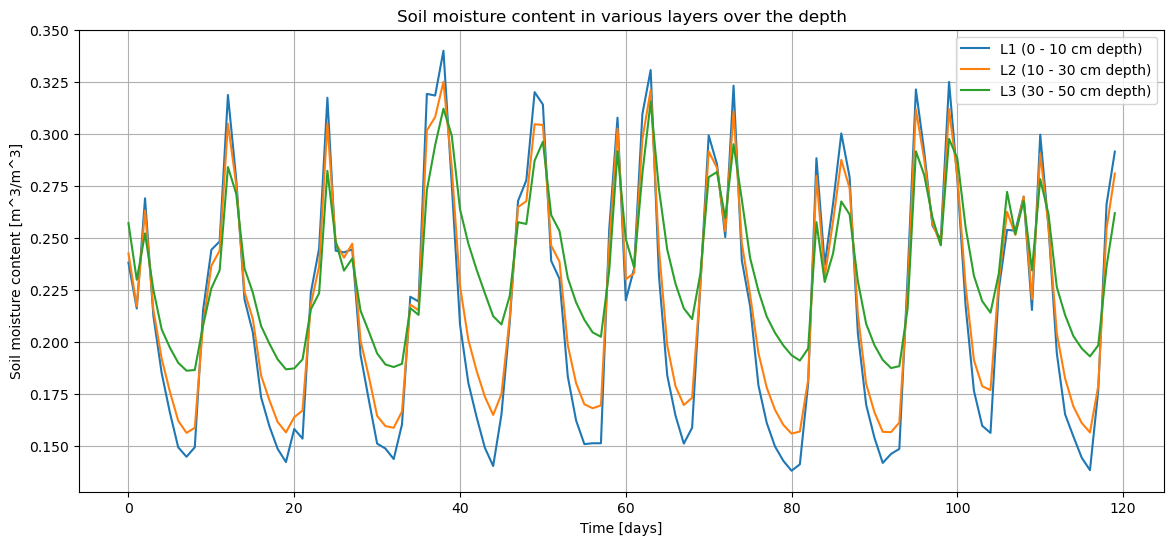

In [31]:
plt.figure(figsize = (14 , 6))

plt.plot(L1 , label = 'L1 (0 - 10 cm depth)')
plt.plot(L2 , label = 'L2 (10 - 30 cm depth)')
plt.plot(L3 , label = 'L3 (30 - 50 cm depth)')

plt.title('Soil moisture content in various layers over the depth')
plt.legend()
plt.xlabel('Time [days]')
plt.ylabel('Soil moisture content [m^3/m^3]')
plt.grid();

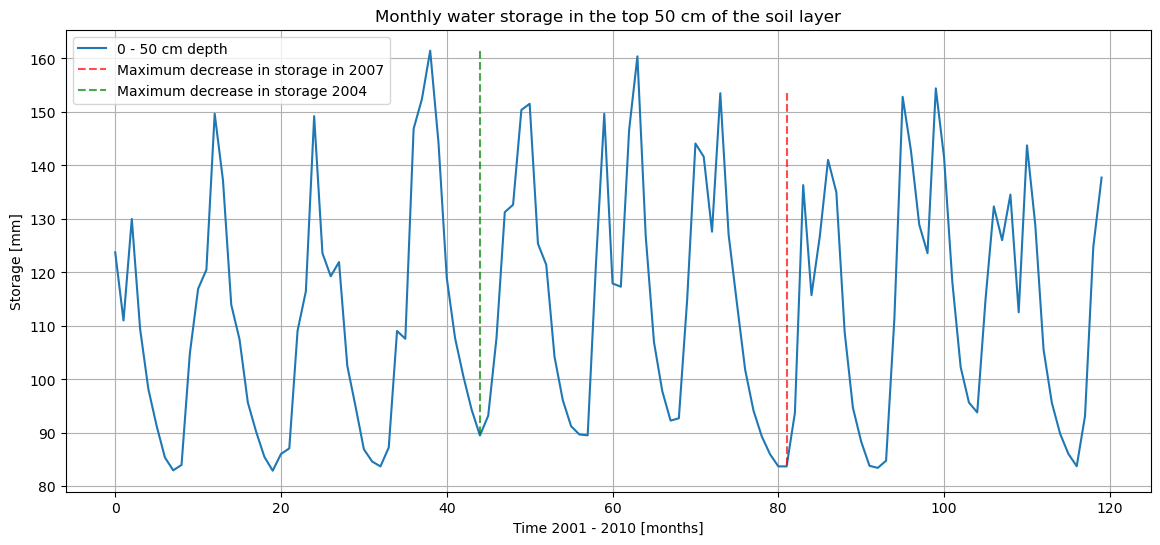

In [32]:
Storage = L1 * 0.1 + L2 * 0.2 + L3 * 0.2
Storage = Storage * 1000 #convert to mm

plt.figure(figsize = (14 , 6))
plt.plot(Storage , label = '0 - 50 cm depth')
plt.ylabel('Storage [mm]')
plt.xlabel('Time 2001 - 2010 [months]')
plt.title('Monthly water storage in the top 50 cm of the soil layer')
plt.grid()

plt.plot([81 , 81] , [Storage[73] , Storage[81]] , 'r--' , alpha = 0.7 , label = 'Maximum decrease in storage in 2007')
plt.plot([44 , 44] , [Storage[38] , Storage[44]] , 'g--' , alpha = 0.7 , label = 'Maximum decrease in storage 2004')
plt.legend();

In [33]:
print('-----' * 19)
print(f'The maximum decrease in storage in 2007 for                  is equal to:           {Storage[73] - Storage[81]:.3f} mm')
print(f'The decrease in layer 1 (0 - 10 cm)                          is equal to:           {(L1[73] - L1[81])*100:.3f} mm')
print(f'The decrease in layer 1 (10 - 30 cm)                         is equal to:           {(L2[73] - L2[81])*200:.3f} mm')
print(f'The decrease in layer 1 (30 - 50 cm)                         is equal to:           {(L3[73] - L3[81])*200:.3f} mm')
print('-----' * 19)

print('-----' * 19)
print(f'The maximum decrease in storage in 2004 for                  is equal to:           {Storage[38] - Storage[44]:.3f} mm')
print(f'The decrease in layer 1 (0 - 10 cm)                          is equal to:           {(L1[38] - L1[44])*100:.3f} mm')
print(f'The decrease in layer 1 (10 - 30 cm)                         is equal to:           {(L2[38] - L2[44])*200:.3f} mm')
print(f'The decrease in layer 1 (30 - 50 cm)                         is equal to:           {(L3[38] - L3[44])*200:.3f} mm')
print('-----' * 19)

-----------------------------------------------------------------------------------------------
The maximum decrease in storage in 2007 for                  is equal to:           69.775 mm
The decrease in layer 1 (0 - 10 cm)                          is equal to:           18.200 mm
The decrease in layer 1 (10 - 30 cm)                         is equal to:           30.773 mm
The decrease in layer 1 (30 - 50 cm)                         is equal to:           20.802 mm
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
The maximum decrease in storage in 2004 for                  is equal to:           71.938 mm
The decrease in layer 1 (0 - 10 cm)                          is equal to:           19.958 mm
The decrease in layer 1 (10 - 30 cm)                         is equal to:           32.026 mm
The decrease in layer 1 (30 - 50 cm)                  

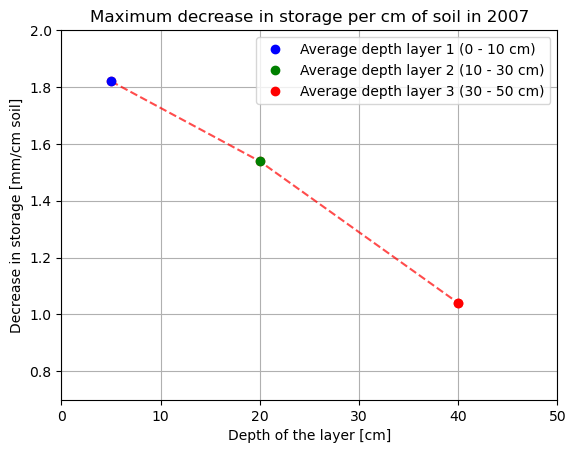

In [34]:
"""Relative decrease per cm"""

plt.plot([5 , 20 , 40] , [(L1[73] - L1[81])*10 , (L2[73] - L2[81])*10 , (L3[73] - L3[81])*10] , 'ro--' , alpha = 0.7)

plt.plot(5 , (L1[73] - L1[81]) * 10 , 'bo' , label = 'Average depth layer 1 (0 - 10 cm)')
plt.plot(20 , (L2[73] - L2[81]) * 10 , 'go' , label = 'Average depth layer 2 (10 - 30 cm)')
plt.plot(40 , (L3[73] - L3[81]) * 10 , 'ro' , label = 'Average depth layer 3 (30 - 50 cm)')

plt.ylabel('Decrease in storage [mm/cm soil]')
plt.xlabel('Depth of the layer [cm]')
plt.title('Maximum decrease in storage per cm of soil in 2007')
plt.xlim(0 , 50)
plt.ylim(0.7 , 2)
plt.grid()
plt.legend();


The minimum decrease in storage in the whole soil layer for the year 2007 is equal to 69.775 mm
The maximum decrease in storage in the whole soil layer for the year 2007 is equal to 91.472 mm
However the maximum decrease in the top 50 cm of the soil between 2001 and 2010 occurs in 2004 between the first of February and the first of September and is equal to: 71.938 mm



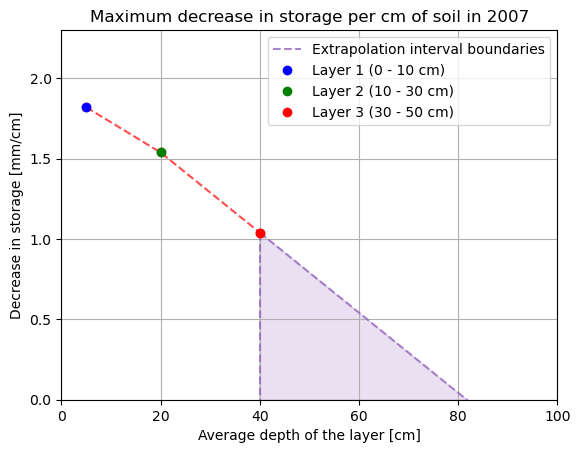

In [35]:
"""Decrease per cm per soil layer"""

plt.plot([5 , 20 , 40] , [(L1[73] - L1[81])*10 , (L2[73] - L2[81])*10 , (L3[73] - L3[81])*10] , 'ro--' , alpha = 0.7)

x = np.linspace(0 , 60 , 100)
y = -((L2[73] - L2[81])*10 - (L3[73] - L3[81])*10)/20 * x + (L3[73] - L3[81])*10

plt.plot(x + 40 , y , linestyle = 'dashed' , color = 'C4' , label = 'Extrapolation interval boundaries' , alpha = 0.8)
plt.plot([40 , 40] , [(L3[73] - L3[81])*10 , 0] , color = 'C4' , linestyle = 'dashed' , alpha = 0.8)

plt.plot(5 , (L1[73] - L1[81]) * 10 , 'bo' , label = 'Layer 1 (0 - 10 cm)')
plt.plot(20 , (L2[73] - L2[81]) * 10 , 'go' , label = 'Layer 2 (10 - 30 cm)')
plt.plot(40 , (L3[73] - L3[81]) * 10 , 'ro' , label = 'Layer 3 (30 - 50 cm)')

plt.ylabel('Decrease in storage [mm/cm]')
plt.xlabel('Average depth of the layer [cm]')
plt.title('Maximum decrease in storage per cm of soil in 2007')
plt.xlim(0 , 100)
plt.ylim(0 , 2.3)
plt.grid()

trianglex = [40 , 81.72 , 40 , 40]
triangley = [(L3[73] - L3[81]) * 10 , 0 , 0 , (L3[73] - L3[81]) * 10]

plt.fill(trianglex, triangley , color = 'C4' , alpha = 0.2)

plt.legend();

print()
print(f'The minimum decrease in storage in the whole soil layer for the year 2007 is equal to {Storage[73] - Storage[81]:.3f} mm')
print(f'The maximum decrease in storage in the whole soil layer for the year 2007 is equal to {Storage[73] - Storage[81] + (L3[73] - L3[81]) * 10 / 2 * 41.72:.3f} mm')
print(f'However the maximum decrease in the top 50 cm of the soil between 2001 and 2010 occurs in 2004 between the first of February and the first of September and is equal to: {Storage[38] - Storage[44]:.3f} mm')
print()

In [36]:
"""Solving extrapolation interval"""

from scipy.optimize import fsolve

def y(x):
    L21 = 0.3108454942703247
    L22 = 0.15697962045669556
    L31 = 0.29508358240127563
    L32 = 0.19107472896575928
    y = -((L21 - L22)*10 - (L31 - L32)*10)/20 * x + (L31 - L32)*10
    return y

x0 = fsolve(y , 10)
x0 + 40

array([81.72285173])

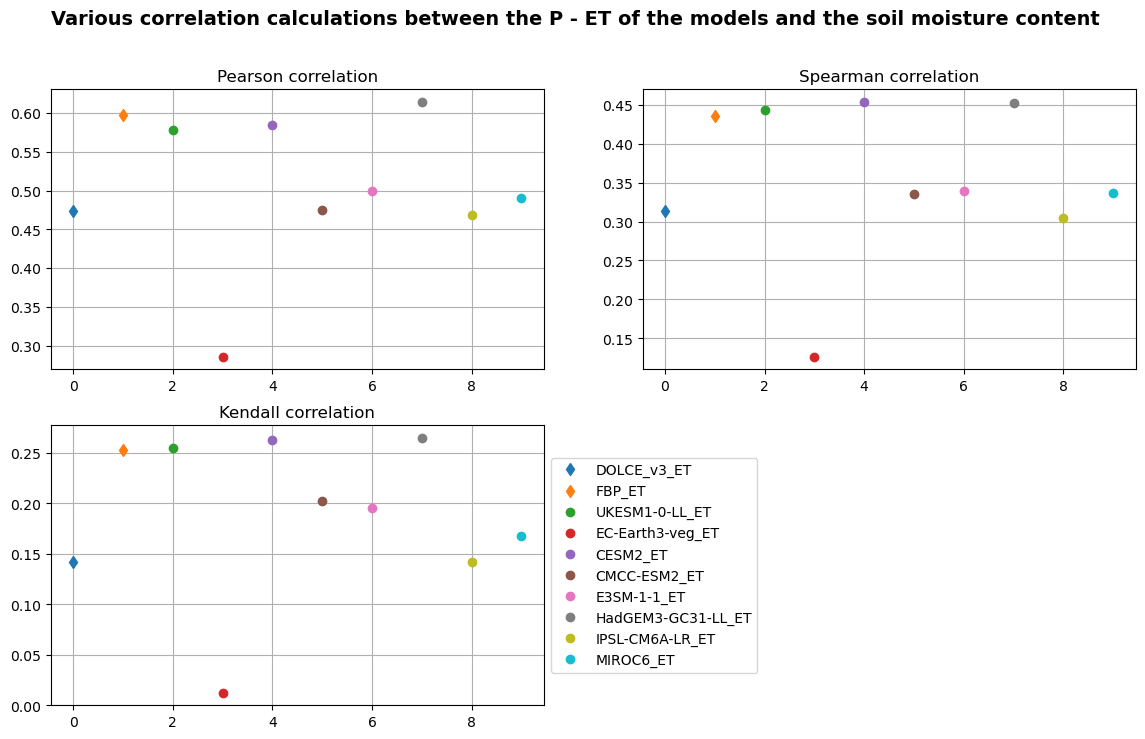

In [37]:
import scipy.stats

plt.figure(figsize = (14 , 8))
S = [S_DOLCE_v3 , S_FBP , S_UKESM1_0_LL  , S_EC_Earth3_veg , S_CESM2, S_CMCC_ESM2 , S_E3SM_1_1 , S_HadGEM3_GC31_LL , S_IPSL_CM6A_LR , S_MIROC6]

label = ['DOLCE_v3_ET' , 'FBP_ET' ,'UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET']
marker = ['d' , 'd' , 'o' , 'o' , 'o' , 'o' , 'o' , 'o' , 'o' , 'o']

for i in range(len(S)):
    x = S[i]
    y = Storage
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(221)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    plt.subplot(222)
    plt.plot(i , spearmanr[0] , marker = marker[i] , label = label[i])
    plt.subplot(223)
    plt.plot(i , kendalltau[0] , marker = marker[i] , linestyle = (0 , (0 , 100)),  label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.subplot(221)
plt.title('Pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Spearman correlation')
plt.grid()
plt.subplot(223)
plt.title('Kendall correlation')
plt.grid()

plt.suptitle('Various correlation calculations between the P - ET of the models and the soil moisture content' , fontsize = 14 ,fontweight = 'bold');

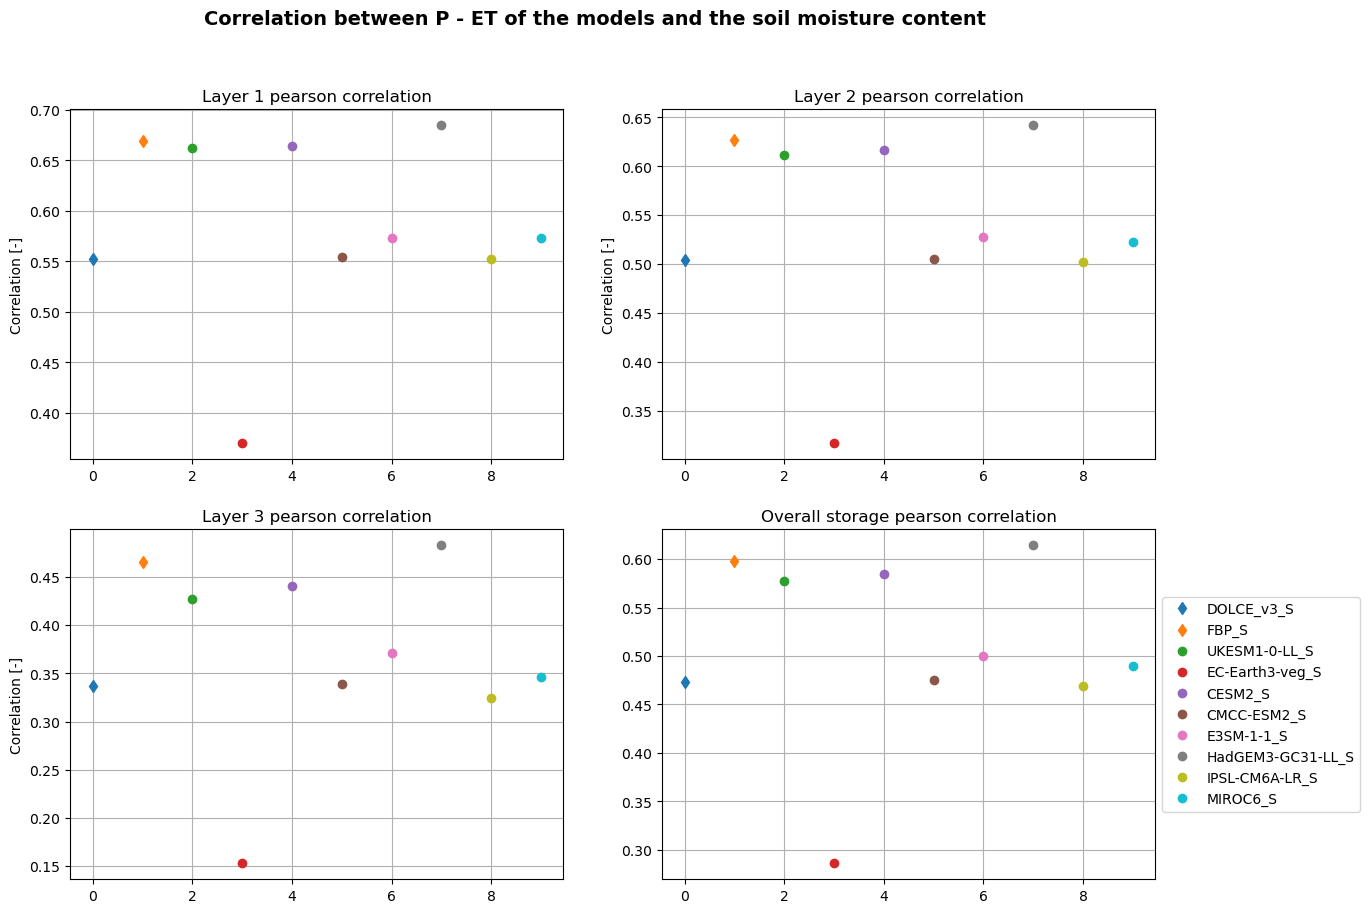

In [38]:
plt.figure(figsize = (14 , 10))
S = [S_DOLCE_v3 , S_FBP , S_UKESM1_0_LL  , S_EC_Earth3_veg , S_CESM2, S_CMCC_ESM2 , S_E3SM_1_1 , S_HadGEM3_GC31_LL , S_IPSL_CM6A_LR , S_MIROC6]

label = ['DOLCE_v3_S' , 'FBP_S' ,'UKESM1-0-LL_S' , 'EC-Earth3-veg_S' , 'CESM2_S' , 'CMCC-ESM2_S' , 'E3SM-1-1_S' , 'HadGEM3-GC31-LL_S' , 'IPSL-CM6A-LR_S' , 'MIROC6_S']

for i in range(len(S)):
    x = S[i]
    y = L1
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(221)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = S[i]
    y = L2
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(222)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = S[i]
    y = L3
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(223)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] ,linestyle = (0 , (0 , 100)) , marker = marker[i] , label = label[i])
    x = S[i]
    y = Storage
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.subplot(224)
plt.title('Overall storage pearson correlation')
plt.grid()

plt.suptitle('Correlation between P - ET of the models and the soil moisture content' , fontsize = 14 ,fontweight = 'bold');

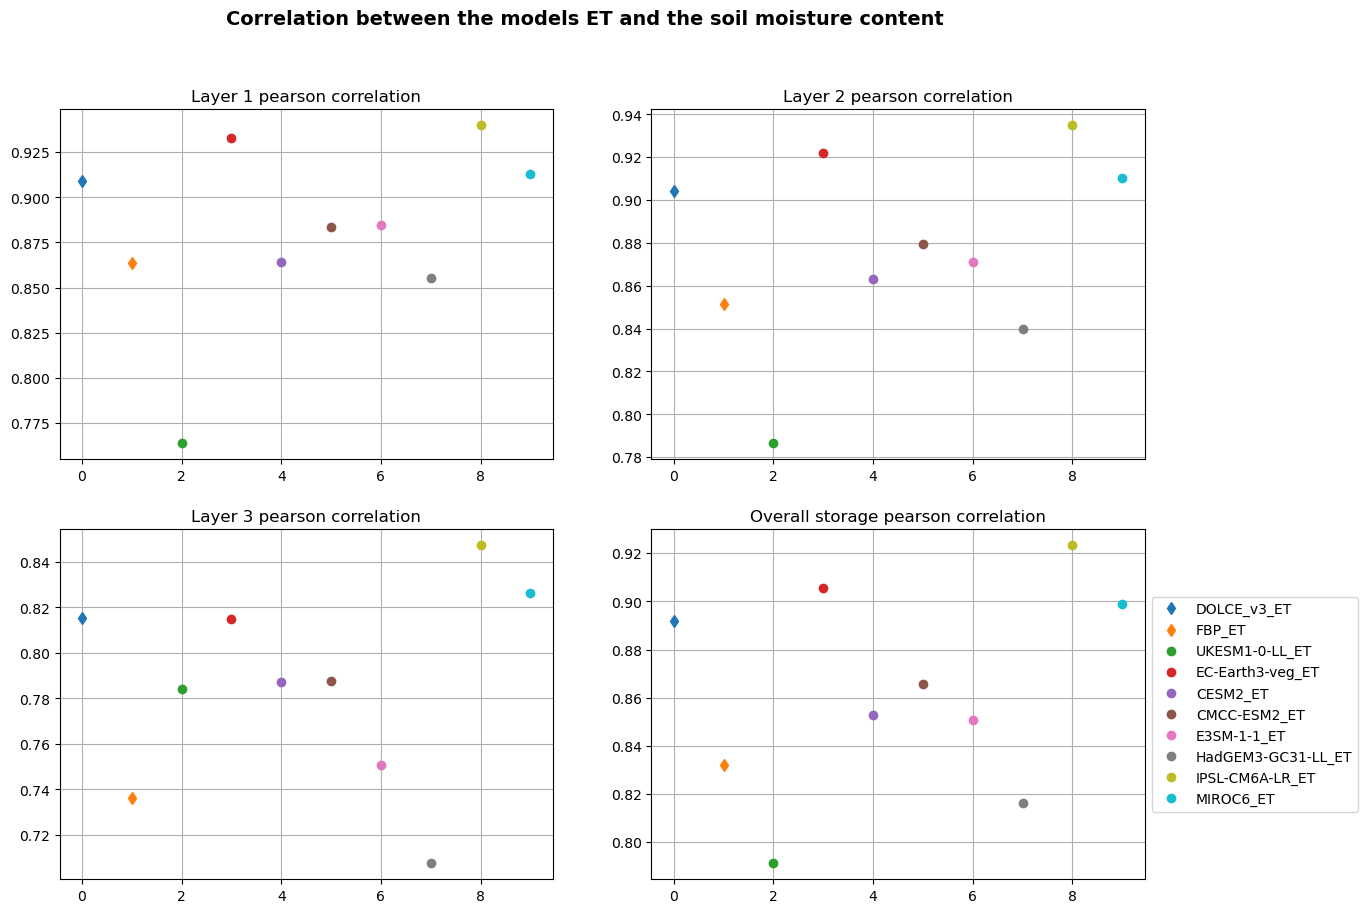

In [39]:
plt.figure(figsize = (14 , 10))
S = [S_DOLCE_v3 , S_FBP , S_UKESM1_0_LL  , S_EC_Earth3_veg , S_CESM2, S_CMCC_ESM2 , S_E3SM_1_1 , S_HadGEM3_GC31_LL , S_IPSL_CM6A_LR , S_MIROC6]
ET = [ET_mean_DOLCE_v3, ET_mean_FBP, ET_mean_UKESM1_0_LL, ET_mean_EC_Earth3_veg, ET_mean_CESM2, ET_mean_CMCC_ESM2, ET_mean_E3SM_1_1, ET_mean_HadGEM3_GC31_LL, ET_mean_IPSL_CM6A_LR,
ET_mean_MIROC6]

label = ['DOLCE_v3_ET' , 'FBP_ET' ,'UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET']

for i in range(len(S)):
    x = ET[i]
    y = L1
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(221)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = ET[i]
    y = L2
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(222)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = ET[i]
    y = L3
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(223)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    x = ET[i]
    y = Storage
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.subplot(224)
plt.title('Overall storage pearson correlation')
plt.grid()

plt.suptitle('Correlation between the models ET and the soil moisture content' , fontsize = 14 ,fontweight = 'bold');

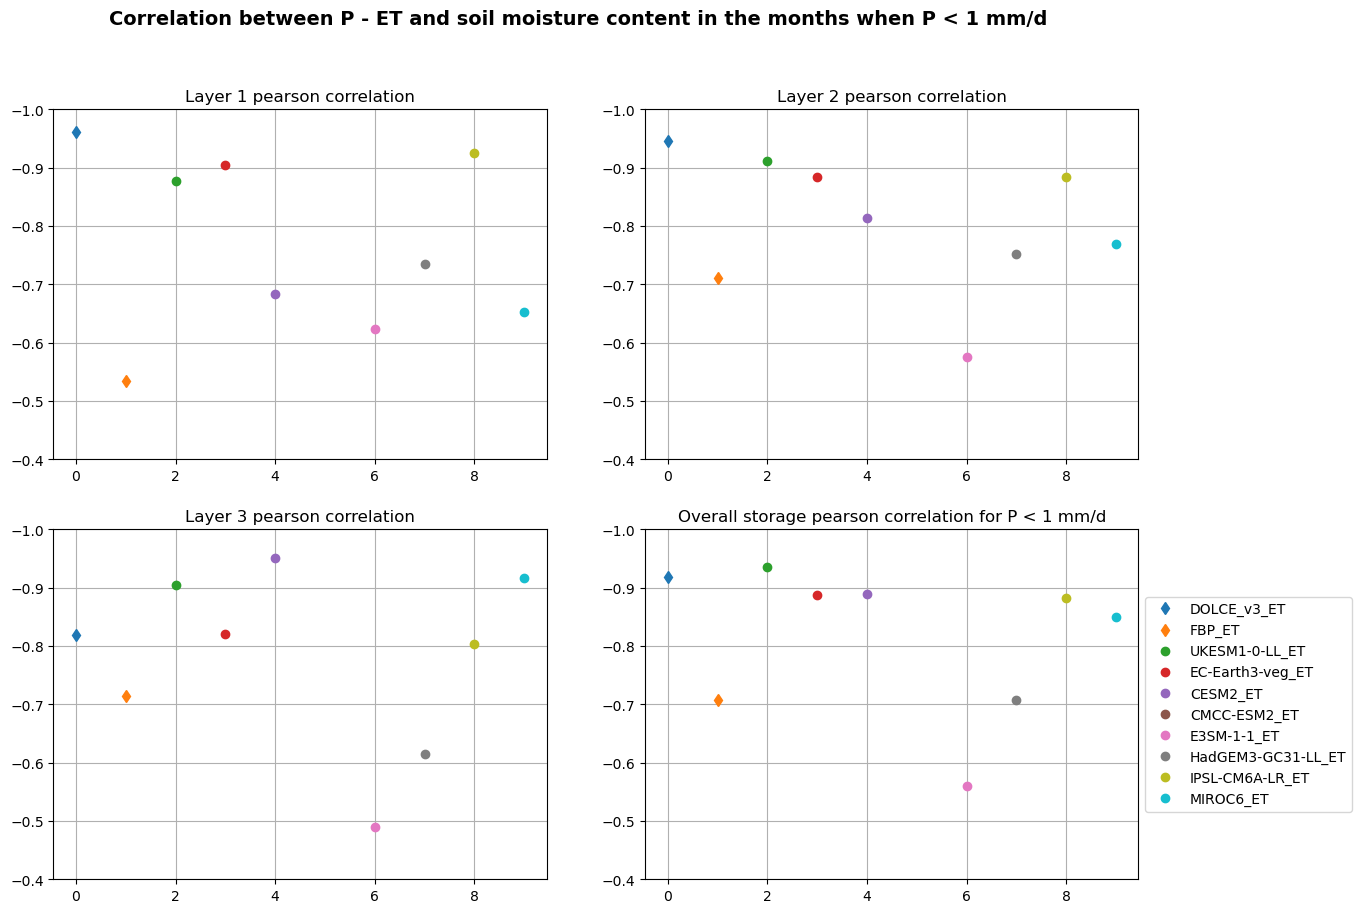

In [40]:
"""Focussing only on the months when P is low (P < 1 mm/d)"""


d = {'P_mean': P_mean, 'L1':L1 , 'L2':L2 , 'L3':L3 , 'Storage':Storage , 'UKESM1-0-LL_ET' : S_UKESM1_0_LL , 'EC-Earth3-veg_ET' : S_EC_Earth3_veg , 'CESM2_ET' : S_CESM2 , 'CMCC-ESM2_ET':S_CMCC_ESM2 
     ,'E3SM-1-1_ET':S_E3SM_1_1 , 'HadGEM3-GC31-LL_ET' : S_HadGEM3_GC31_LL , 'IPSL-CM6A-LR_ET':S_IPSL_CM6A_LR , 'MIROC6_ET': S_MIROC6 
     , 'DOLCE_v3_ET' : S_DOLCE_v3, 'FBP_ET':S_FBP}

df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])
df.drop(df[df['P_mean'] > 1].index, inplace = True)

label = ['DOLCE_v3_ET' , 'FBP_ET' ,'UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET']

plt.figure(figsize = (14 , 10))

for i in range(len(label)):
    x = df[label[i]]
    y = df['L1']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(221)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = df[label[i]]
    y = df['L2']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(222)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = df[label[i]]
    y = df['L3']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(223)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    x = df[label[i]]
    y = df['Storage']
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.ylim(-0.4 , -1)
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.ylim(-0.4 , -1)
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.ylim(-0.4 , -1)
plt.subplot(224)
plt.title('Overall storage pearson correlation for P < 1 mm/d')
plt.grid()
plt.ylim(-0.4 , -1)

plt.suptitle('Correlation between P - ET and soil moisture content in the months when P < 1 mm/d' , fontsize = 14 ,fontweight = 'bold');

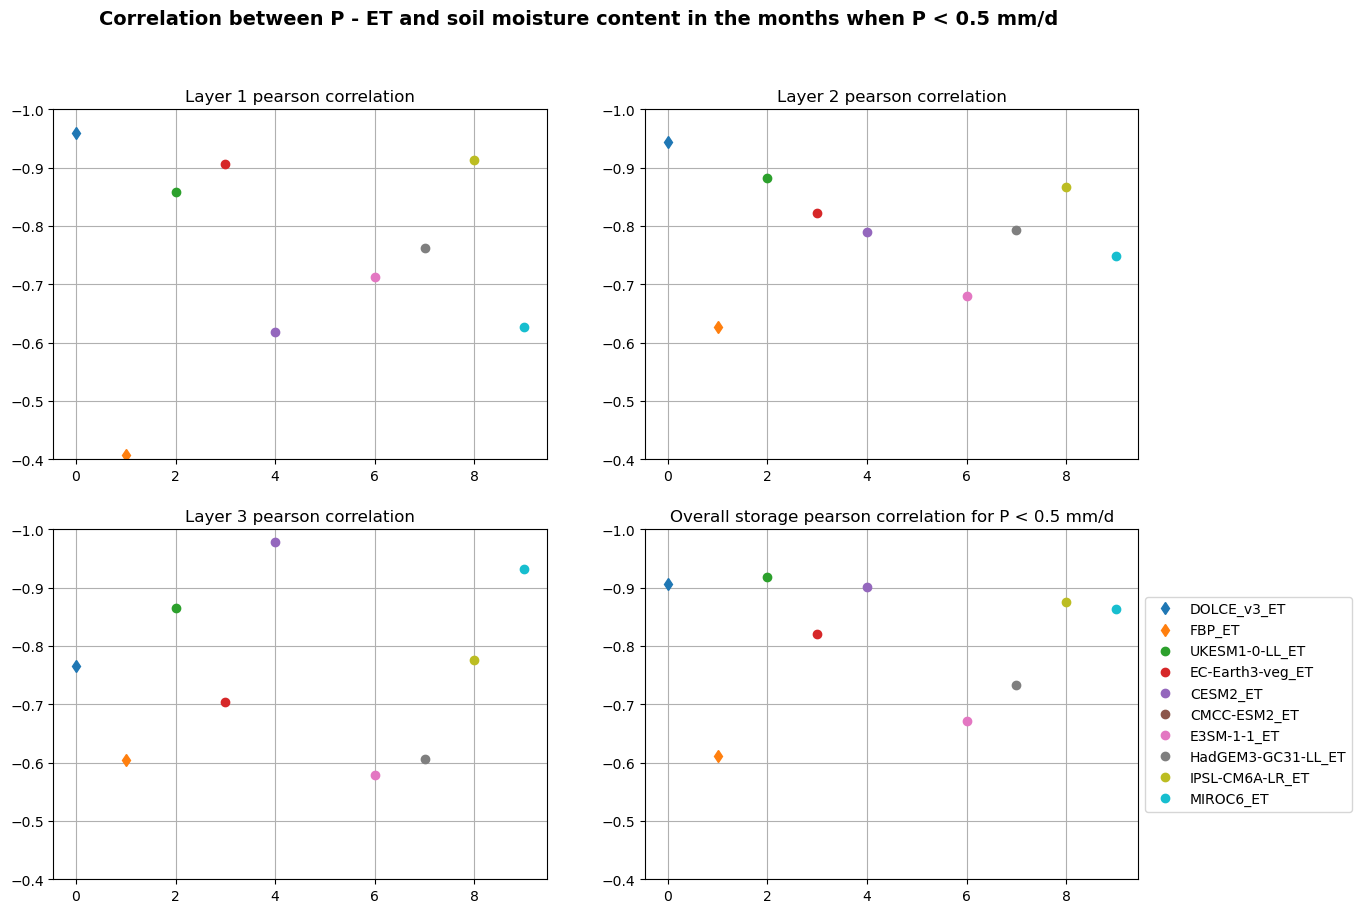

In [41]:
"""Focussing only on the months when P is low (P < 0.5 mm/d)"""


d = {'P_mean': P_mean, 'L1':L1 , 'L2':L2 , 'L3':L3 , 'Storage':Storage , 'UKESM1-0-LL_ET' :S_UKESM1_0_LL , 'EC-Earth3-veg_ET' : S_EC_Earth3_veg , 'CESM2_ET' : S_CESM2 , 'CMCC-ESM2_ET':S_CMCC_ESM2 
     ,'E3SM-1-1_ET':S_E3SM_1_1 , 'HadGEM3-GC31-LL_ET' : S_HadGEM3_GC31_LL , 'IPSL-CM6A-LR_ET':S_IPSL_CM6A_LR , 'MIROC6_ET': S_MIROC6 
     , 'DOLCE_v3_ET' : S_DOLCE_v3, 'FBP_ET':S_FBP}

df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])
df.drop(df[df['P_mean'] > 0.5].index, inplace = True)

label = ['DOLCE_v3_ET' , 'FBP_ET' ,'UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET']

plt.figure(figsize = (14 , 10))

for i in range(len(label)):
    x = df[label[i]]
    y = df['L1']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(221)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = df[label[i]]
    y = df['L2']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(222)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = df[label[i]]
    y = df['L3']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(223)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    x = df[label[i]]
    y = df['Storage']
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.ylim(-0.4 , -1)
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.ylim(-0.4 , -1)
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.ylim(-0.4 , -1)
plt.subplot(224)
plt.title('Overall storage pearson correlation for P < 0.5 mm/d')
plt.grid()
plt.ylim(-0.4 , -1)

plt.suptitle('Correlation between P - ET and soil moisture content in the months when P < 0.5 mm/d' , fontsize = 14 ,fontweight = 'bold');

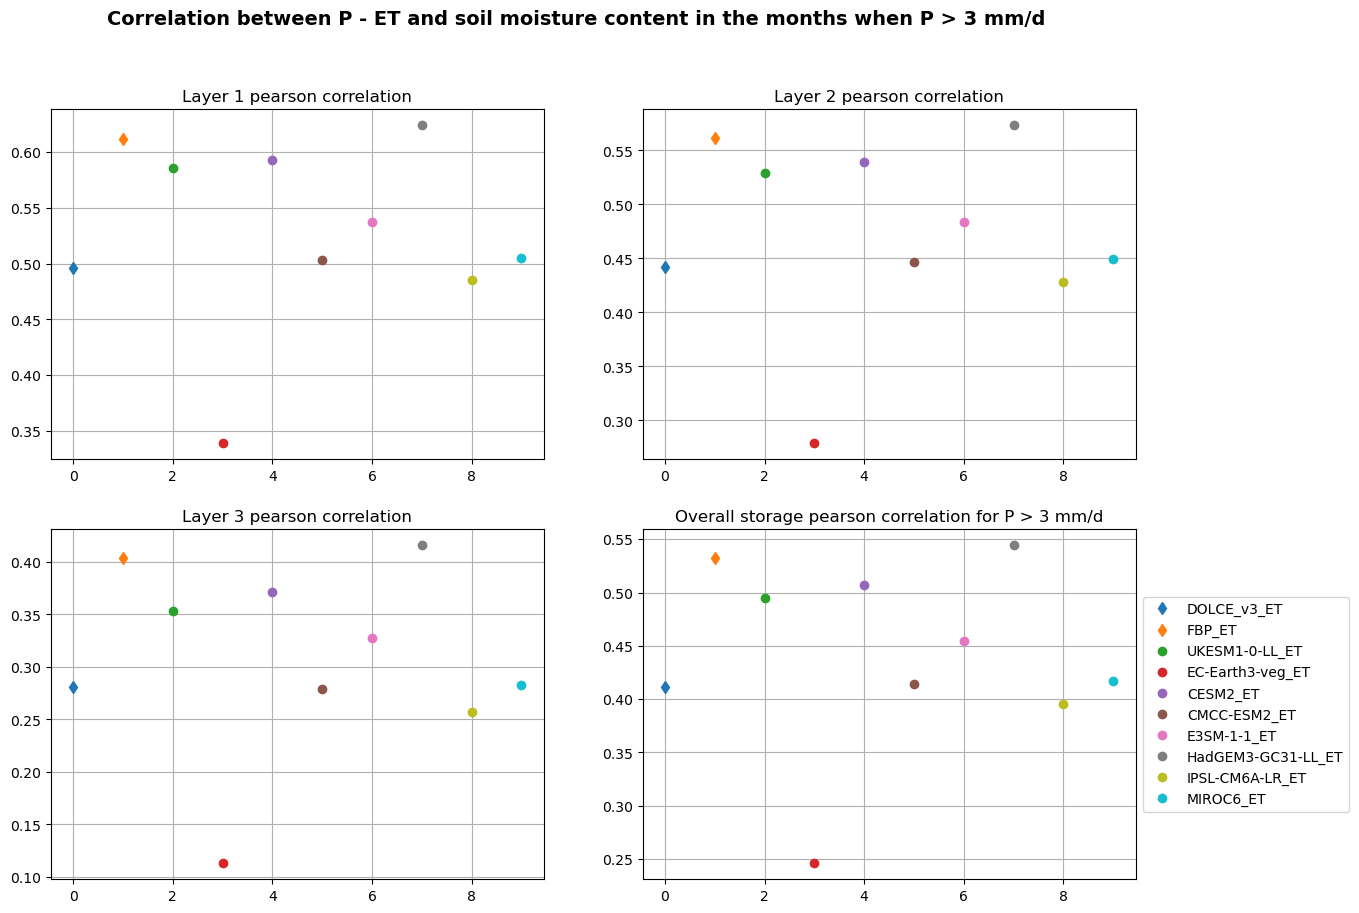

In [42]:
"""Focussing only on the months when average P is high (P > 3 mm/d)"""


d = {'P_mean': P_mean, 'L1':L1 , 'L2':L2 , 'L3':L3 , 'Storage':Storage , 'UKESM1-0-LL_ET' : S_UKESM1_0_LL , 'EC-Earth3-veg_ET' : S_EC_Earth3_veg , 'CESM2_ET' : S_CESM2 , 'CMCC-ESM2_ET':S_CMCC_ESM2 
     ,'E3SM-1-1_ET':S_E3SM_1_1 , 'HadGEM3-GC31-LL_ET' : S_HadGEM3_GC31_LL , 'IPSL-CM6A-LR_ET':S_IPSL_CM6A_LR , 'MIROC6_ET': S_MIROC6 
     , 'DOLCE_v3_ET' : S_DOLCE_v3, 'FBP_ET':S_FBP}

df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])
df.drop(df[df['P_mean'] < 3].index, inplace = True)

label = ['DOLCE_v3_ET' , 'FBP_ET' ,'UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET']

plt.figure(figsize = (14 , 10))

for i in range(len(label)):
    x = df[label[i]]
    y = df['L1']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(221)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = df[label[i]]
    y = df['L2']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(222)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = df[label[i]]
    y = df['L3']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(223)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    x = df[label[i]]
    y = df['Storage']
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.subplot(224)
plt.title('Overall storage pearson correlation for P > 3 mm/d')
plt.grid()

plt.suptitle('Correlation between P - ET and soil moisture content in the months when P > 3 mm/d' , fontsize = 14 ,fontweight = 'bold');

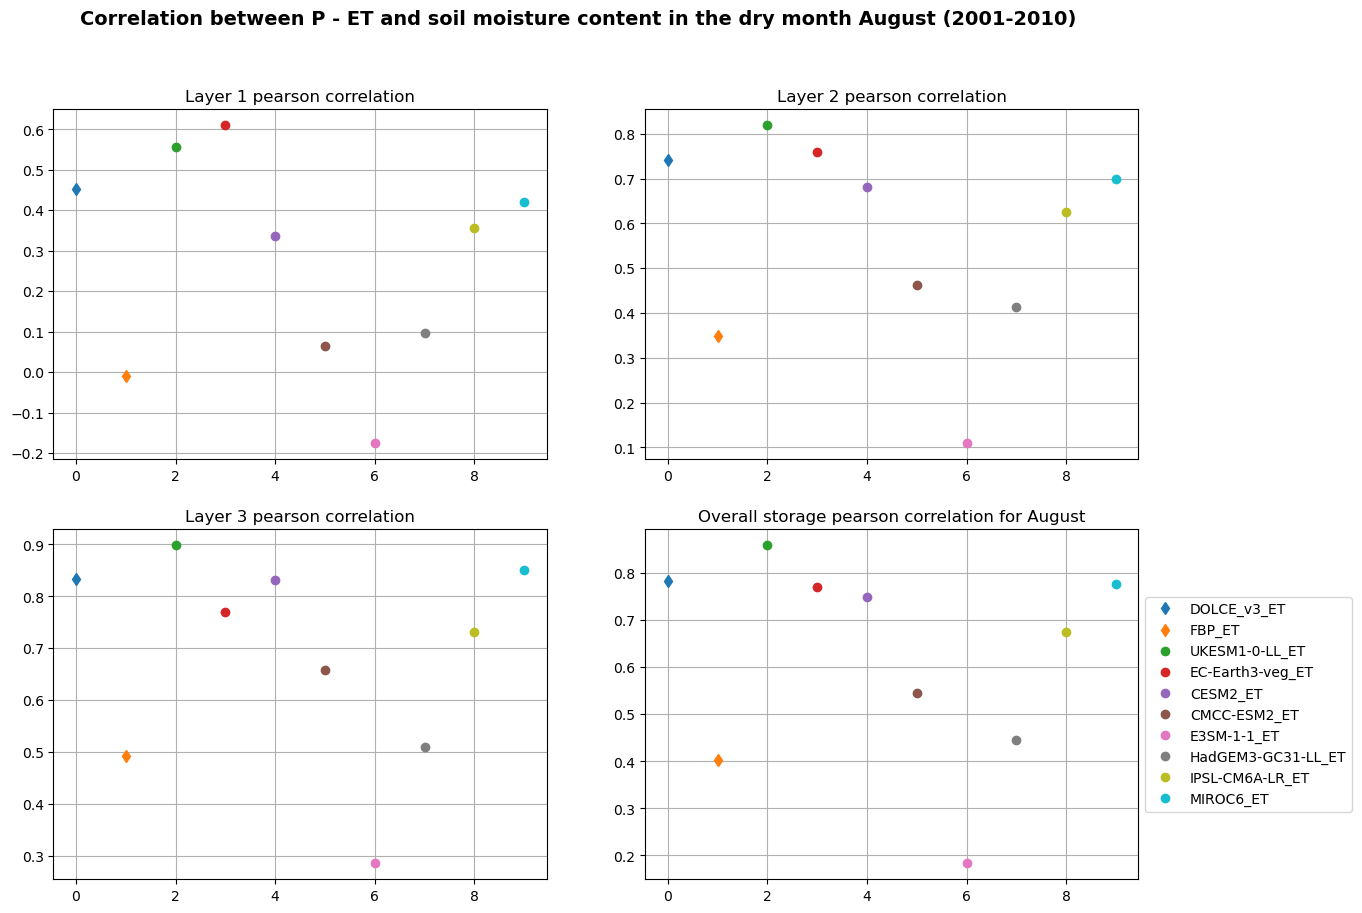

In [43]:
"""Extracting Augustus (low storage month)"""

"""August is one of the two months with the lowest soil moisture content within the yearly cycle"""

Aug = np.arange(7 , 120 , 12)


t = 10 #months

P_mean_Aug = np.zeros(t)
L1_Aug = np.zeros(t)
L2_Aug = np.zeros(t)
L3_Aug = np.zeros(t)
Storage_Aug = np.zeros(t)
ET_mean_DOLCE_v3_Aug = np.zeros(t)
ET_mean_FBP_Aug = np.zeros(t)
ET_mean_UKESM1_0_LL_Aug = np.zeros(t)
ET_mean_EC_Earth3_veg_Aug = np.zeros(t)
ET_mean_CESM2_Aug = np.zeros(t)
ET_mean_CMCC_ESM2_Aug = np.zeros(t)
ET_mean_E3SM_1_1_Aug = np.zeros(t)
ET_mean_HadGEM3_GC31_LL_Aug = np.zeros(t)
ET_mean_IPSL_CM6A_LR_Aug = np.zeros(t)
ET_mean_MIROC6_Aug = np.zeros(t)

for i in range(10):
    P_mean_Aug[i] = P_mean[Aug[i]]
    L1_Aug[i] = L1[Aug[i]]
    L2_Aug[i] = L2[Aug[i]]
    L3_Aug[i] = L3[[Aug[i]]]
    Storage_Aug[i] = Storage[Aug[i]]
    ET_mean_DOLCE_v3_Aug[i] = S_DOLCE_v3[Aug[i]]
    ET_mean_FBP_Aug[i] = S_FBP[Aug[i]]
    ET_mean_UKESM1_0_LL_Aug[i] = S_UKESM1_0_LL[Aug[i]]
    ET_mean_EC_Earth3_veg_Aug[i] = S_EC_Earth3_veg[Aug[i]]
    ET_mean_CESM2_Aug[i] = S_CESM2[Aug[i]]
    ET_mean_CMCC_ESM2_Aug[i] =  S_CMCC_ESM2[Aug[i]]
    ET_mean_E3SM_1_1_Aug[i] = S_E3SM_1_1[Aug[i]]
    ET_mean_HadGEM3_GC31_LL_Aug[i] = S_HadGEM3_GC31_LL[Aug[i]]
    ET_mean_IPSL_CM6A_LR_Aug[i] = S_IPSL_CM6A_LR[Aug[i]]
    ET_mean_MIROC6_Aug[i] =  S_MIROC6[Aug[i]]
    
d = {'P_mean_Aug': P_mean_Aug, 'L1_Aug':L1_Aug , 'L2_Aug':L2_Aug , 'L3_Aug':L3_Aug , 'Storage_Aug':Storage_Aug , 'UKESM1-0-LL_ET' : ET_mean_UKESM1_0_LL_Aug , 
      'EC-Earth3-veg_ET' : ET_mean_EC_Earth3_veg_Aug , 'CESM2_ET' : ET_mean_CESM2_Aug , 'CMCC-ESM2_ET':ET_mean_CMCC_ESM2_Aug 
     ,'E3SM-1-1_ET':ET_mean_E3SM_1_1_Aug , 'HadGEM3-GC31-LL_ET' : ET_mean_HadGEM3_GC31_LL_Aug , 'IPSL-CM6A-LR_ET':ET_mean_IPSL_CM6A_LR_Aug , 
      'MIROC6_ET': ET_mean_MIROC6_Aug , 'DOLCE_v3_ET' : ET_mean_DOLCE_v3_Aug, 'FBP_ET':ET_mean_FBP_Aug}

"""Focussing only on Aug"""

df = pd.DataFrame(d)

label = ['DOLCE_v3_ET' , 'FBP_ET' ,'UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET']

plt.figure(figsize = (14 , 10))

for i in range(len(label)):
    x = -df[label[i]]
    y = df['L1_Aug']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(221)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = -df[label[i]]
    y = df['L2_Aug']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(222)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = -df[label[i]]
    y = df['L3_Aug']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(223)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    x = -df[label[i]]
    y = df['Storage_Aug']
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.subplot(224)
plt.title('Overall storage pearson correlation for August')
plt.grid()

plt.suptitle('Correlation between P - ET and soil moisture content in the dry month August (2001-2010)' , fontsize = 14 ,fontweight = 'bold');

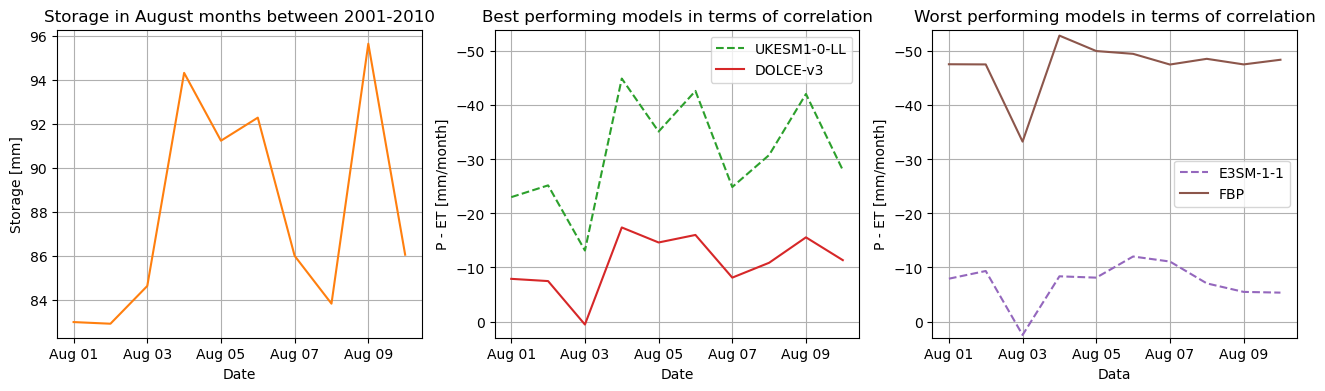

In [44]:
plt.figure(figsize = (16 , 4))

plt.subplot(131)
plt.plot(df['Storage_Aug'] , color = 'C1')
plt.title('Storage in August months between 2001-2010')
plt.xlabel('Date')
plt.ylabel('Storage [mm]')
plt.xticks([0 , 2 , 4 , 6 , 8] , ['Aug 01' , 'Aug 03' , 'Aug 05' , 'Aug 07' , 'Aug 09'])
plt.grid()

plt.subplot(132)
plt.plot(df['UKESM1-0-LL_ET'] , color = 'C2' , label = 'UKESM1-0-LL' , linestyle = 'dashed')
plt.plot(df['DOLCE_v3_ET'] , color = 'C3' , label = 'DOLCE-v3')
plt.title('Best performing models in terms of correlation')
plt.ylabel('P - ET [mm/month]')
plt.xlabel('Date')
plt.ylim(0.1 * 30 , -1.8 * 30)
plt.xticks([0 , 2 , 4 , 6 , 8] , ['Aug 01' , 'Aug 03' , 'Aug 05' , 'Aug 07' , 'Aug 09'])
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(df['E3SM-1-1_ET'] , color = 'C4' , label = 'E3SM-1-1' , linestyle = 'dashed')
plt.plot(df['FBP_ET'] , color = 'C5' , label = 'FBP')
plt.title('Worst performing models in terms of correlation')
plt.ylabel('P - ET [mm/month]')
plt.ylim(0.1 * 30 , -1.8 * 30)
plt.xticks([0 , 2 , 4 , 6 , 8] , ['Aug 01' , 'Aug 03' , 'Aug 05' , 'Aug 07' , 'Aug 09'])
plt.xlabel('Data')
plt.grid()
plt.legend();

In [45]:
"""For the year 2004"""

'For the year 2004'

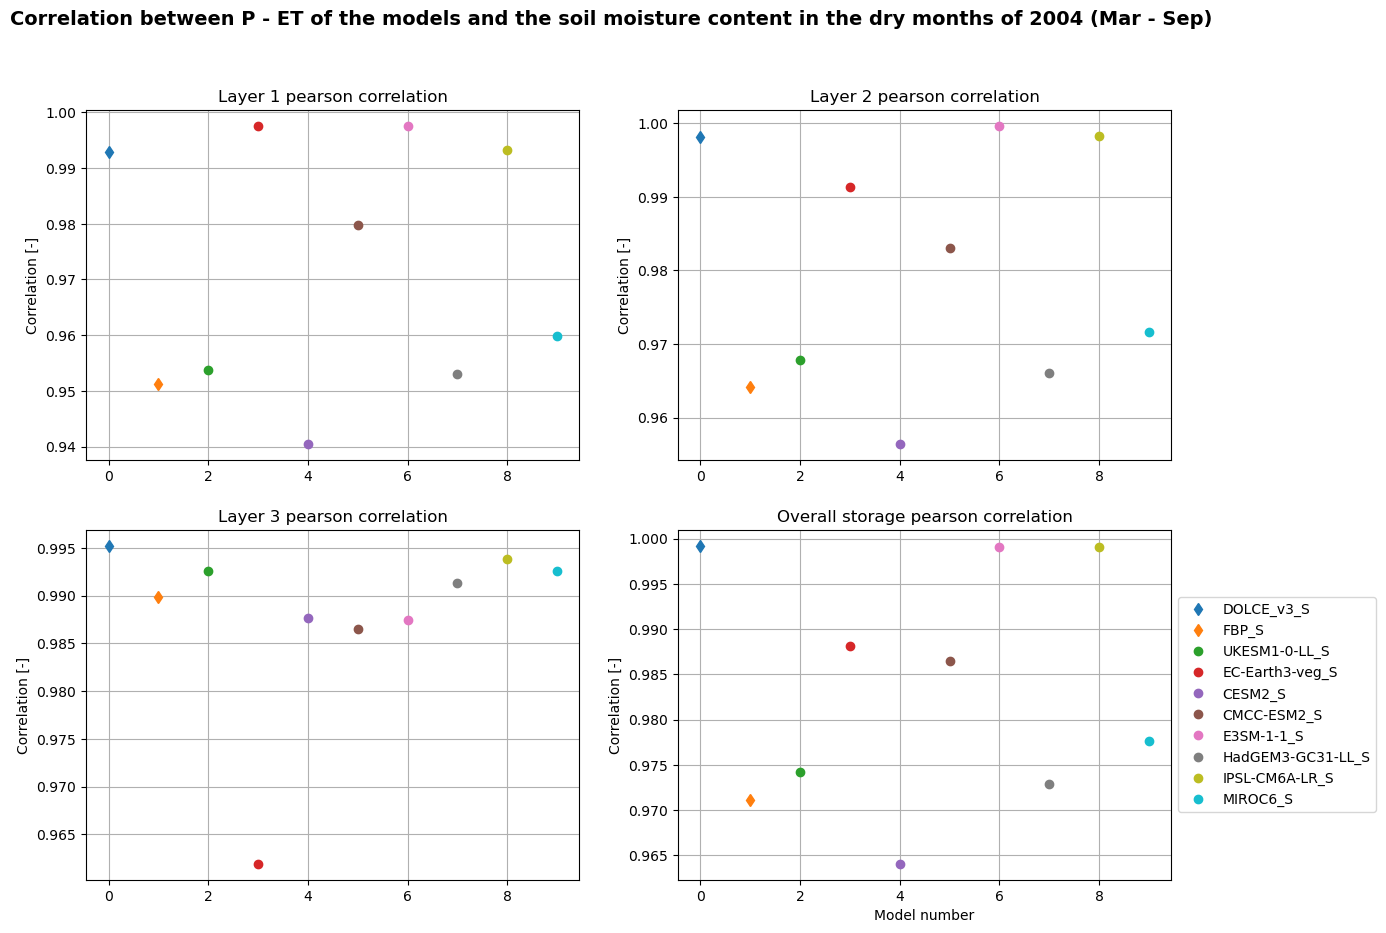

In [46]:
plt.figure(figsize = (14 , 10))

label = ['DOLCE_v3_S' , 'FBP_S' ,'UKESM1-0-LL_S' , 'EC-Earth3-veg_S' , 'CESM2_S' , 'CMCC-ESM2_S' , 'E3SM-1-1_S' , 'HadGEM3-GC31-LL_S' , 'IPSL-CM6A-LR_S' , 'MIROC6_S']

for i in range(len(S)):
    x = S1[i][38:45]
    y = L1[38:45]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(221)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = S1[i][38:45]
    y = L2[38:45]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(222)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = S1[i][38:45]
    y = L3[38:45]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(223)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] ,linestyle = (0 , (0 , 100)) , marker = marker[i] , label = label[i])
    x = S1[i][38:45]
    y = Storage[38:45]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.ylabel('Correlation [-]')
    plt.xlabel('Model number')
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.subplot(224)
plt.title('Overall storage pearson correlation')
plt.grid()

plt.suptitle('Correlation between P - ET of the models and the soil moisture content in the dry months of 2004 (Mar - Sep)' , fontsize = 14 ,fontweight = 'bold');

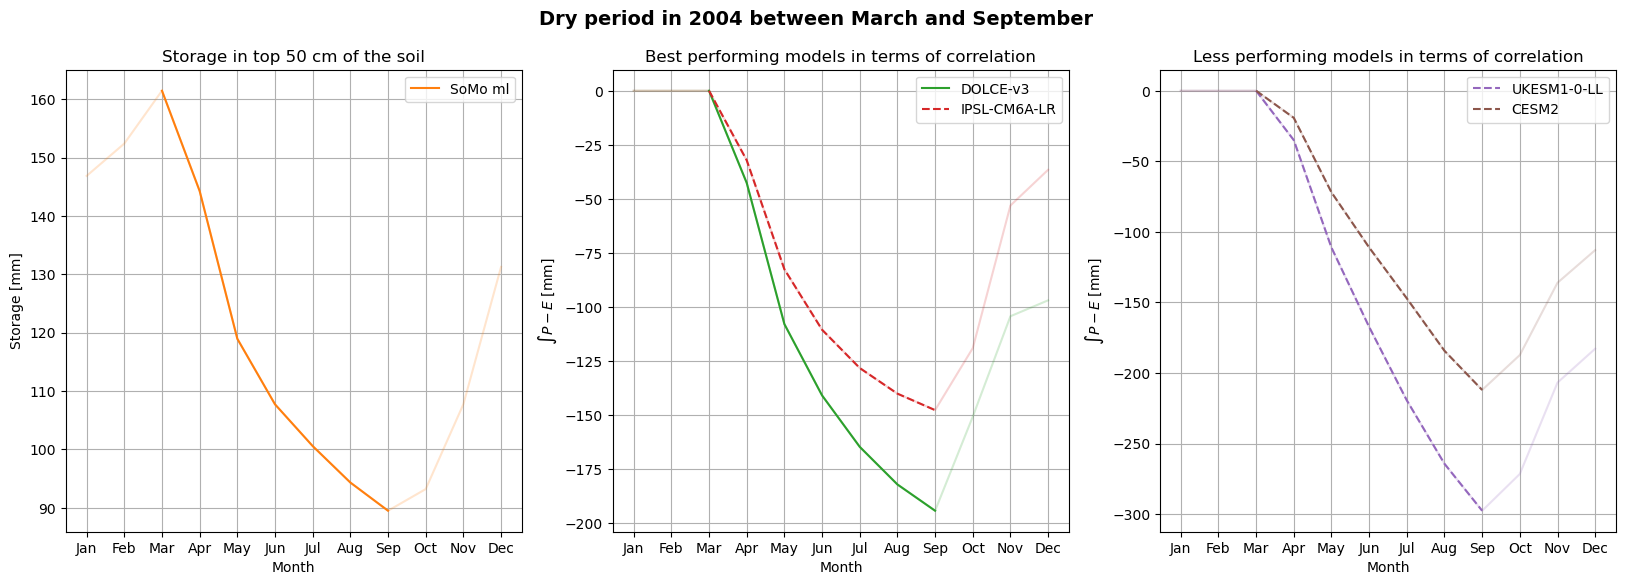

In [47]:
plt.figure(figsize = (20 , 6))

plt.subplot(131)
plt.plot(Storage[36:48] , color = 'C1' , alpha = 0.2)
plt.plot([2 , 3 , 4 , 5 , 6 , 7 , 8] , Storage[38:45] , color = 'C1' , label = 'SoMo ml')
plt.title('Storage in top 50 cm of the soil')
plt.xlabel('Month')
plt.ylabel('Storage [mm]')
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11] , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(S1_DOLCE_v3[36:48] , color = 'C2' , alpha = 0.2)
plt.plot(S1_IPSL_CM6A_LR[36:48] , color = 'C3' , alpha = 0.2)
plt.plot([2 , 3 , 4 , 5 , 6 , 7 , 8] , S1_DOLCE_v3[38:45] , color = 'C2' , label = 'DOLCE-v3')
plt.plot([2 , 3 , 4 , 5 , 6 , 7 , 8] , S1_IPSL_CM6A_LR[38:45] , color = 'C3' , label = 'IPSL-CM6A-LR' , linestyle = 'dashed')
plt.title('Best performing models in terms of correlation')
plt.ylabel(r'$\int P - E $ [mm]')
plt.xlabel('Month')
#plt.ylim(0.1 , -1.8)
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11] , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.grid()
plt.legend()

plt.subplot(133)

plt.plot(S1_UKESM1_0_LL[36:48] , color = 'C4' , alpha = 0.2)
plt.plot(S1_CESM2[36:48] , color = 'C5' , alpha = 0.2)
plt.plot([2 , 3 , 4 , 5 , 6 , 7 , 8] , S1_UKESM1_0_LL[38:45] , color = 'C4' , label = 'UKESM1-0-LL' , linestyle = 'dashed')
plt.plot([2 , 3 , 4 , 5 , 6 , 7 , 8] , S1_CESM2[38:45] , color = 'C5' , label = 'CESM2' , linestyle = 'dashed')
plt.title('Less performing models in terms of correlation')
plt.ylabel(r'$\int P - E $ [mm]')
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11] , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.xlabel('Month')
plt.grid()
plt.legend();

plt.suptitle('Dry period in 2004 between March and September', fontsize = 14 ,fontweight = 'bold');
print()

In [48]:
"""For the year 2007"""

'For the year 2007'

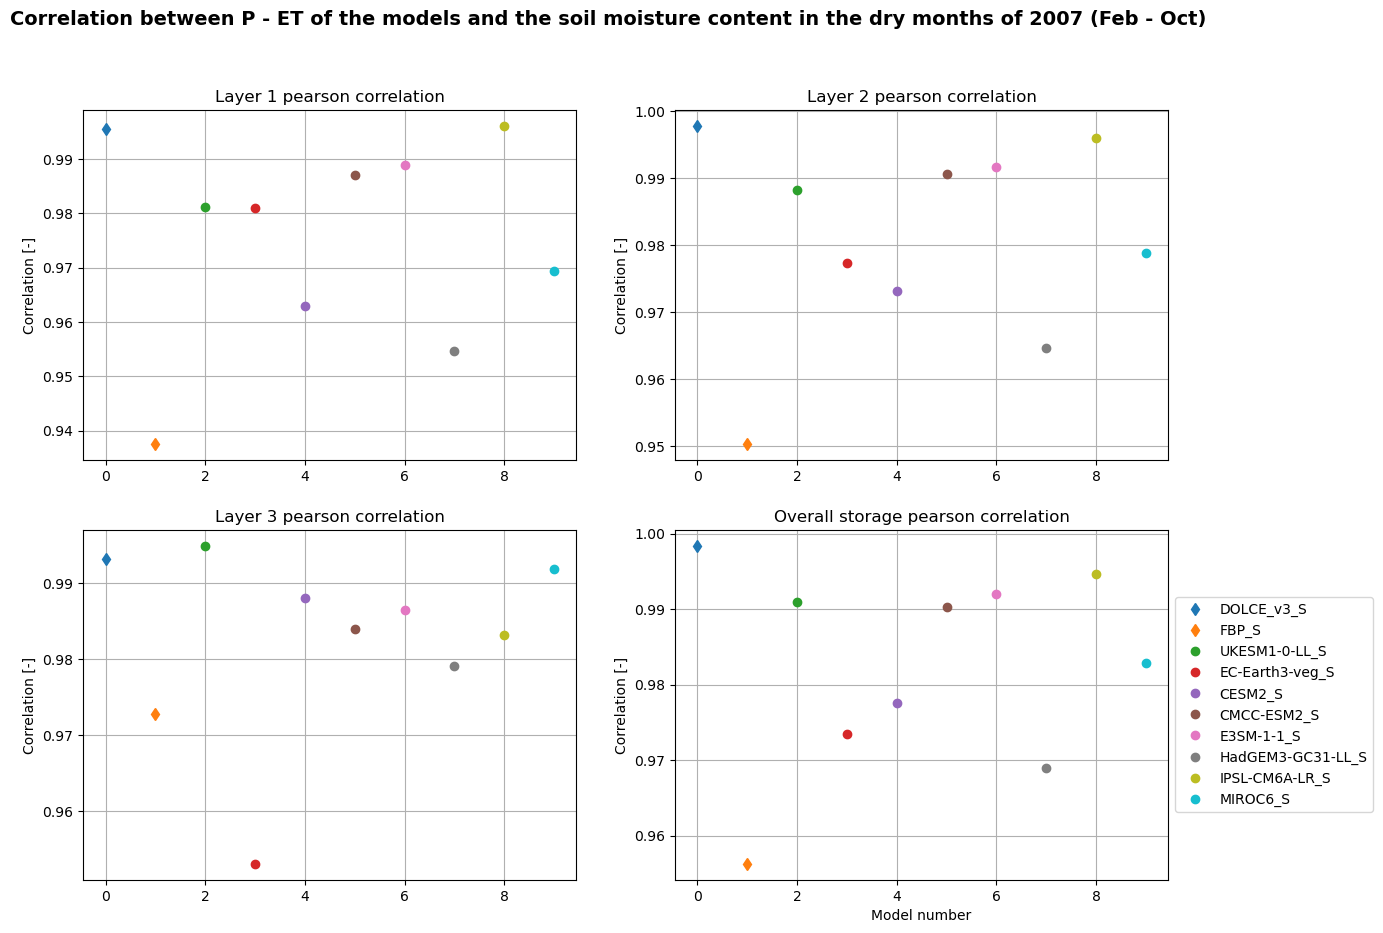

In [49]:
plt.figure(figsize = (14 , 10))

label = ['DOLCE_v3_S' , 'FBP_S' ,'UKESM1-0-LL_S' , 'EC-Earth3-veg_S' , 'CESM2_S' , 'CMCC-ESM2_S' , 'E3SM-1-1_S' , 'HadGEM3-GC31-LL_S' , 'IPSL-CM6A-LR_S' , 'MIROC6_S']

for i in range(len(S1)):
    x = S1[i][73:82]
    y = L1[73:82]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(221)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = S1[i][73:82]
    y = L2[73:82]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(222)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = S1[i][73:82]
    y = L3[73:82]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(223)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] ,linestyle = (0 , (0 , 100)) , marker = marker[i] , label = label[i])
    x = S1[i][73:82]
    y = Storage[73:82]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.ylabel('Correlation [-]')
    plt.xlabel('Model number')
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.subplot(224)
plt.title('Overall storage pearson correlation')
plt.grid()

plt.suptitle('Correlation between P - ET of the models and the soil moisture content in the dry months of 2007 (Feb - Oct)' , fontsize = 14 ,fontweight = 'bold');

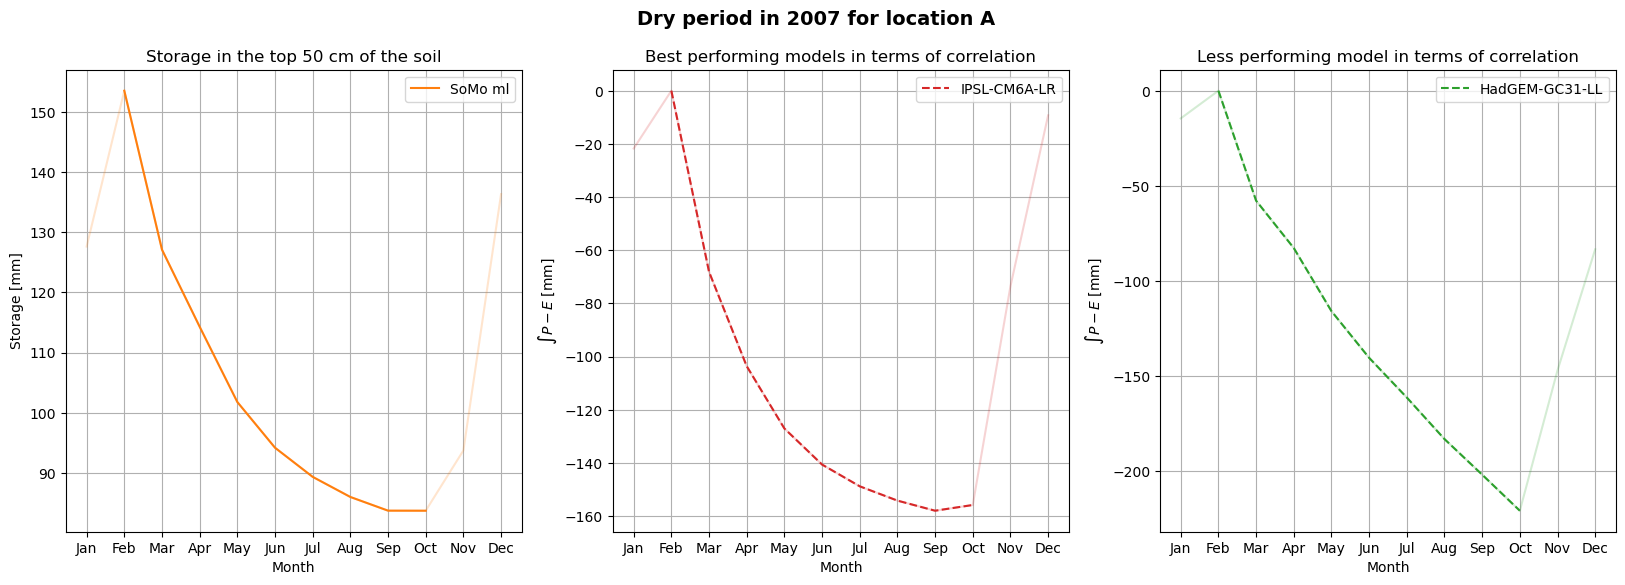

In [50]:
plt.figure(figsize = (20 , 6))

plt.subplot(131)
plt.plot(Storage[72:84], color = 'C1' , alpha = 0.2)
plt.plot([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9] , Storage[73:82] , color = 'C1' , label = 'SoMo ml')
plt.title('Storage in the top 50 cm of the soil')
plt.xlabel('Month')
plt.ylabel('Storage [mm]')
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11] , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(S1_HadGEM3_GC31_LL[72:84] , color = 'C2' , alpha = 0.2)
#plt.plot(S1_CESM2[72:84] , color = 'C3' , alpha = 0.2)

plt.plot([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9] , S1_HadGEM3_GC31_LL[73:82] , color = 'C2' , label = 'HadGEM-GC31-LL' , linestyle = 'dashed')
#plt.plot([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9] , S1_CESM2[73:82] , color = 'C3' , label = 'CESM-2' , linestyle = 'dashed')
plt.title('Less performing model in terms of correlation')
plt.ylabel(r'$\int P - E $ [mm]')
plt.xlabel('Month')
#plt.ylim(0.1 , -1.8)
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11] , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(S1_IPSL_CM6A_LR[72:84] , color = 'C3', alpha = 0.2)
#plt.plot(S1_DOLCE_v3[72:84] , color = 'C3' , alpha = 0.2)
plt.plot([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9] , S1_IPSL_CM6A_LR[73:82] , color = 'C3' , label = 'IPSL-CM6A-LR' , linestyle = 'dashed')
#plt.plot([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9] , S1_DOLCE_v3[73:82] , color = 'C3' , label = 'DOLCE_v3')
plt.title('Best performing models in terms of correlation')
plt.ylabel(r'$\int P - E $ [mm]')
#plt.ylim(0.1 , -1.8)
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11] , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.xlabel('Month')
plt.grid()
plt.legend();

plt.suptitle('Dry period in 2007 for location A', fontsize = 14 ,fontweight = 'bold');
print()

In [51]:
#All dry months

Months = np.arange(2 , 120 , 12)
ADM = np.zeros(7*10)

for j in range(7):
    ADM[j] = Storage[Months[0] + j]
    ADM[j + 7] = Storage[Months[1] + j]
    ADM[j + 14] = Storage[Months[2] + j]
    ADM[j + 21] = Storage[Months[3] + j]
    ADM[j + 28] = Storage[Months[4] + j]
    ADM[j + 35] = Storage[Months[5] + j]
    ADM[j + 42] = Storage[Months[6] + j]
    ADM[j + 49] = Storage[Months[7] + j]
    ADM[j + 56] = Storage[Months[8] + j]
    ADM[j + 63] = Storage[Months[9] + j]

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


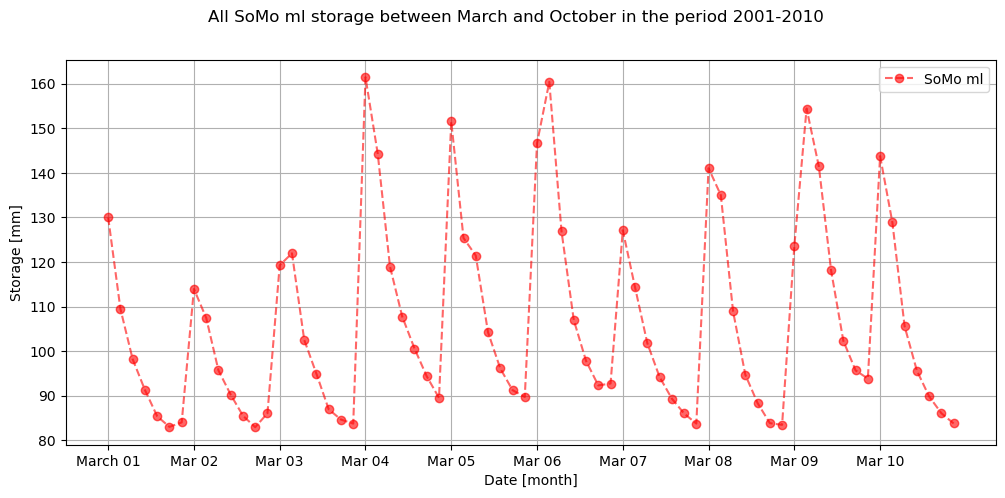

In [52]:
plt.figure(figsize = (12 , 5))
plt.plot(ADM , 'ro--' , alpha = 0.6 , label = 'SoMo ml')
plt.xlabel('Date [month]')
plt.ylabel('Storage [mm]')
plt.suptitle('All SoMo ml storage between March and October in the period 2001-2010')
plt.grid()
plt.xticks( [0 , 7 , 14 , 21 , 28 , 35 , 42 , 49 , 56 , 63],['March 01' , 'Mar 02' , 'Mar 03' , 'Mar 04'  , 'Mar 05' , 'Mar 06' , 'Mar 07' , 'Mar 08' , 'Mar 09' , 'Mar 10'])
plt.legend();

In [53]:
"""Extracting the dry months from the storage"""

ADM_index = [2, 3 , 4 , 5 , 6 , 7 , 8 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 26 , 27 , 28 , 29 
             , 30 , 31 , 32 , 38 , 39 , 40 , 41 , 42, 43 , 44 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 62 , 63 
             , 64 , 65 , 66 , 67 , 68 , 74 , 75 , 76 , 77 , 78 , 79 , 80 , 86 , 87 , 88 , 89 , 90 , 91 , 92
             , 98 , 99 , 100 , 101 ,102 ,103 , 104 , 110 , 111 , 112 , 113 , 114 , 115 , 116]

t = len(ADM_index)

ADM1_LFE = np.zeros(t)
ADM1_DOLCE_v3 = np.zeros(t)
ADM1_FBP = np.zeros(t)
ADM1_UKESM1_0_LL = np.zeros(t)
ADM1_EC_Earth3_veg = np.zeros(t)
ADM1_CESM2 = np.zeros(t)
ADM1_CMCC_ESM2 = np.zeros(t)
ADM1_E3SM_1_1 = np.zeros(t)
ADM1_HadGEM3_GC31_LL = np.zeros(t)
ADM1_IPSL_CM6A_LR = np.zeros(t)
ADM1_MIROC6 = np.zeros(t)


ADM_LFE = np.zeros(t)
ADM_DOLCE_v3 = np.zeros(t)
ADM_FBP = np.zeros(t)
ADM_UKESM1_0_LL = np.zeros(t)
ADM_EC_Earth3_veg = np.zeros(t)
ADM_CESM2 = np.zeros(t)
ADM_CMCC_ESM2 = np.zeros(t)
ADM_E3SM_1_1 = np.zeros(t)
ADM_HadGEM3_GC31_LL = np.zeros(t)
ADM_IPSL_CM6A_LR = np.zeros(t)
ADM_MIROC6 = np.zeros(t)

for i in range(t):
    ADM1_DOLCE_v3[i] = S1_DOLCE_v3[ADM_index[i]]
    ADM1_FBP[i] = S1_FBP[ADM_index[i]]
    ADM1_UKESM1_0_LL[i] = S1_UKESM1_0_LL[ADM_index[i]]
    ADM1_EC_Earth3_veg[i] = S1_EC_Earth3_veg[ADM_index[i]]
    ADM1_CESM2[i] = S1_CESM2[ADM_index[i]]
    ADM1_CMCC_ESM2[i] =  S1_CMCC_ESM2[ADM_index[i]]
    ADM1_E3SM_1_1[i] = S1_E3SM_1_1[ADM_index[i]]
    ADM1_HadGEM3_GC31_LL[i] = S1_HadGEM3_GC31_LL[ADM_index[i]]
    ADM1_IPSL_CM6A_LR[i] =   S1_IPSL_CM6A_LR[ADM_index[i]]
    ADM1_MIROC6[i] =  S1_MIROC6[ADM_index[i]]
    
    ADM_DOLCE_v3[i] = S_DOLCE_v3[ADM_index[i]]
    ADM_FBP[i] = S_FBP[ADM_index[i]]
    ADM_UKESM1_0_LL[i] = S_UKESM1_0_LL[ADM_index[i]]
    ADM_EC_Earth3_veg[i] = S_EC_Earth3_veg[ADM_index[i]]
    ADM_CESM2[i] = S_CESM2[ADM_index[i]]
    ADM_CMCC_ESM2[i] =  S_CMCC_ESM2[ADM_index[i]]
    ADM_E3SM_1_1[i] = S_E3SM_1_1[ADM_index[i]]
    ADM_HadGEM3_GC31_LL[i] = S_HadGEM3_GC31_LL[ADM_index[i]]
    ADM_IPSL_CM6A_LR[i] =   S_IPSL_CM6A_LR[ADM_index[i]]
    ADM_MIROC6[i] =  S_MIROC6[ADM_index[i]]

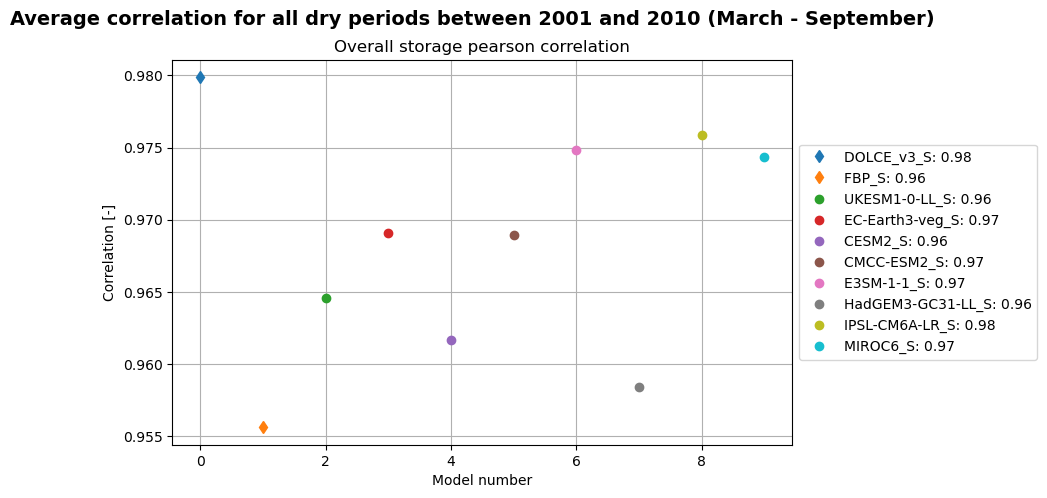

In [54]:
plt.figure(figsize = (8, 5))

label = ['DOLCE_v3_S' , 'FBP_S' ,'UKESM1-0-LL_S' , 'EC-Earth3-veg_S' , 'CESM2_S' , 'CMCC-ESM2_S' , 'E3SM-1-1_S' , 'HadGEM3-GC31-LL_S' , 'IPSL-CM6A-LR_S' , 'MIROC6_S']
ADM1 = [ADM1_DOLCE_v3 , ADM1_FBP  , ADM1_UKESM1_0_LL , ADM1_EC_Earth3_veg , ADM1_CESM2 , ADM1_CMCC_ESM2 , ADM1_E3SM_1_1 , ADM1_HadGEM3_GC31_LL , ADM1_IPSL_CM6A_LR , ADM1_MIROC6]

b3 = np.arange(0 , 70 , 7)
b4 = np.arange(7 , 77 , 7)
p = np.zeros(len(ADM1))

for j in range(len(ADM1)):
    for i in range(len(b3)):
        x = ADM[b3[i]:b4[i]]
        y = ADM1[j][b3[i]:b4[i]]
        pearsonr = scipy.stats.pearsonr(x, y)
        p[j] += pearsonr[0]
    plt.plot(j , p[j]/len(b3) , marker = marker[j] , label = f'{label[j]}: {p[j]/len(b3):.2f}' , linestyle = (0 , (0 , 100)))
    

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Overall storage pearson correlation')
plt.ylabel('Correlation [-]')
plt.xlabel('Model number')
plt.grid()

plt.suptitle('Average correlation for all dry periods between 2001 and 2010 (March - September)' , fontsize = 14 ,fontweight = 'bold');

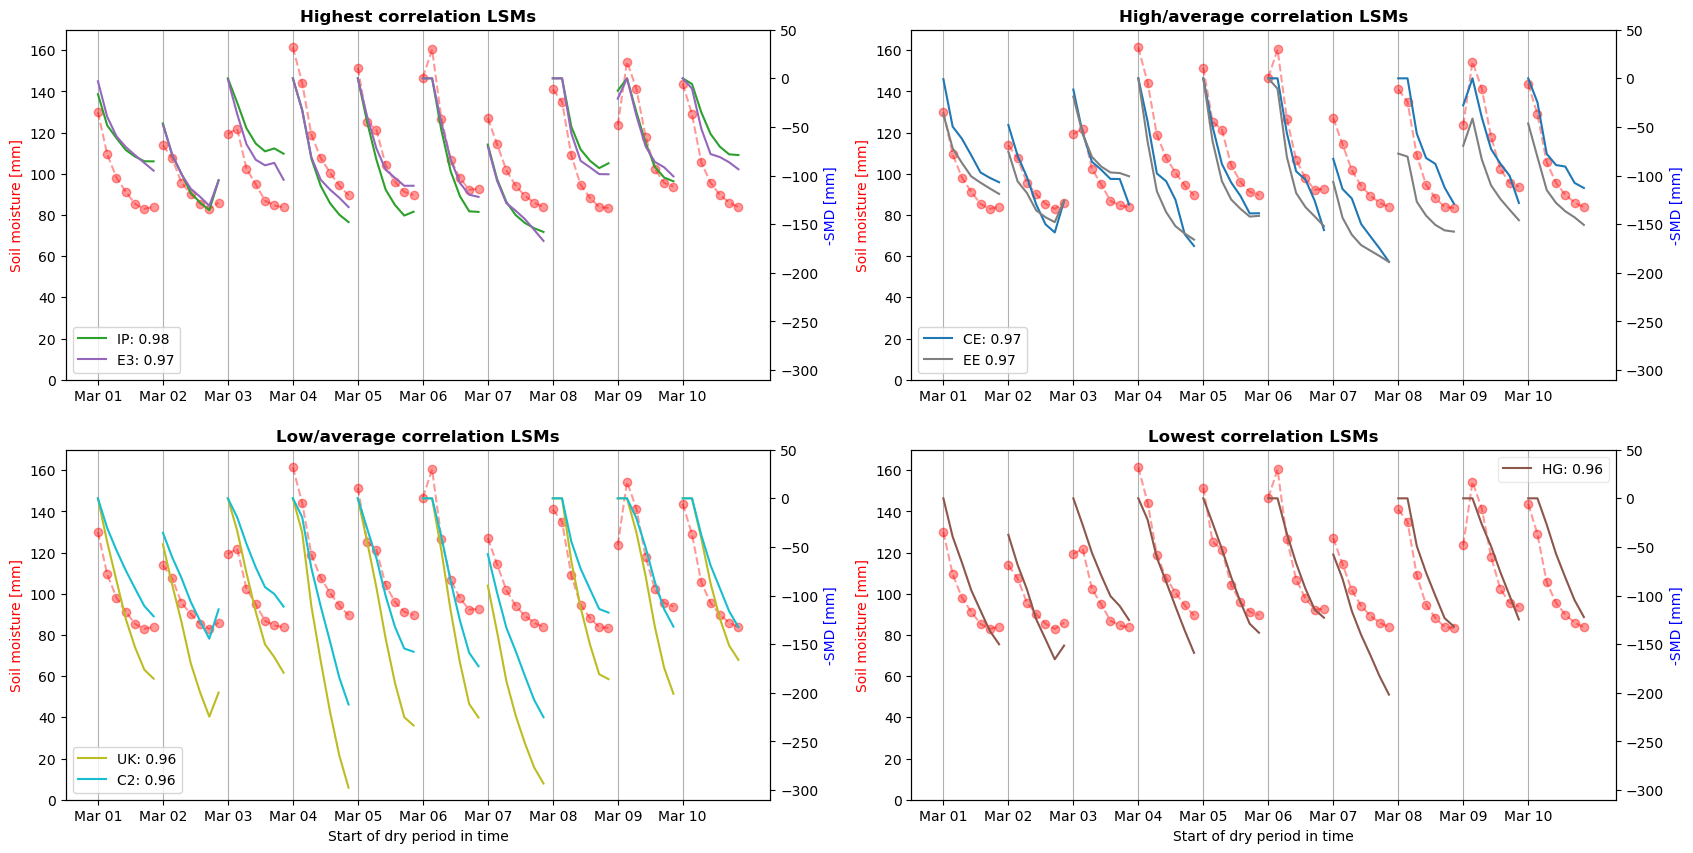

In [55]:
"""benchmark products"""

fig, axs = plt.subplots(2 , 2 , figsize = (20 , 10))
axs = axs.flatten()

for i, ax in enumerate(axs):
    ax1 = ax.twinx()
    
    if i == 0:
        for j in range(len(b3)):
            ax.plot(np.arange(b3[j] , b4[j] , 1) , ADM[b3[j]:b4[j]], 'ro--' , alpha = 0.4 , label = 'Storage SoMo ml')
            
        for j in range(len(b3)):   
            if j == len(b3)-1:
                ax1.plot(np.arange(b3[j] , b4[j] , 1) , ADM1_IPSL_CM6A_LR[b3[j]:b4[j]] , label = f'IP: {p[8]/len(b3):.2f}' , color = 'C2')   
            else:
                ax1.plot(np.arange(b3[j] , b4[j] , 1) , ADM1_IPSL_CM6A_LR[b3[j]:b4[j]] , color = 'C2')           
        

        for j in range(len(b3)):   
            if j == len(b3)-1:
                ax1.plot(np.arange(b3[j] , b4[j] , 1) , ADM1_E3SM_1_1[b3[j]:b4[j]] , label = f'E3: {p[6]/len(b3):.2f}' , color = 'C4')   
            else:
                ax1.plot(np.arange(b3[j] , b4[j] , 1) , ADM1_E3SM_1_1[b3[j]:b4[j]] , color = 'C4')
            
        ax.set_title(r'Highest correlation LSMs', fontweight = 'bold')
        ax.set_ylabel('Soil moisture [mm]', color='r')
        ax.set_ylim(0 , 170)
        ax1.set_ylabel('-SMD [mm]', color='b')
        ax1.set_ylim(-310 , 50)
        plt.xticks( [0 , 7 , 14 , 21 , 28 , 35 , 42 , 49 , 56 , 63],['Mar 01' , 'Mar 02' , 'Mar 03' , 'Mar 04'  , 'Mar 05' , 'Mar 06' , 'Mar 07' , 'Mar 08' , 'Mar 09' , 'Mar 10'])
        #plt.grid()
        plt.legend();
        
    elif i == 1:
        
        for j in range(len(b3)):
            ax.plot(np.arange(b3[j] , b4[j] , 1) , ADM[b3[j]:b4[j]], 'ro--' , alpha = 0.4 , label = 'Storage SoMo ml')
        
        for j in range(len(b3)):   
            if j == len(b3)-1:
                ax1.plot(np.arange(b3[j] , b4[j]) , ADM1_CMCC_ESM2[b3[j]:b4[j]] , color = 'C10' , label = f'CE: {p[5]/len(b3):.2f}')     
            else:
                ax1.plot(np.arange(b3[j] , b4[j] , 1) , ADM1_CMCC_ESM2[b3[j]:b4[j]] , color = 'C10')
                
        for j in range(len(b3)):   
            if j == len(b3)-1:
                ax1.plot(np.arange(b3[j] , b4[j]) , ADM1_EC_Earth3_veg[b3[j]:b4[j]] , color = 'C7' , label = f'EE {p[3]/len(b3):.2f}')     
            else:
                ax1.plot(np.arange(b3[j] , b4[j] , 1) , ADM1_EC_Earth3_veg[b3[j]:b4[j]] , color = 'C7')
                
        ax.set_title(r'High/average correlation LSMs', fontweight = 'bold')
        ax.set_ylabel('Soil moisture [mm]', color='r')
        ax.set_ylim(0 , 170)
        ax1.set_ylabel('-SMD [mm]', color='b')
        ax1.set_ylim(-310 , 50)
        plt.xticks( [0 , 7 , 14 , 21 , 28 , 35 , 42 , 49 , 56 , 63],['Mar 01' , 'Mar 02' , 'Mar 03' , 'Mar 04'  , 'Mar 05' , 'Mar 06' , 'Mar 07' , 'Mar 08' , 'Mar 09' , 'Mar 10'])
        #plt.grid()
        plt.legend();
        
    elif i == 2:
        
        for j in range(len(b3)):
            ax.plot(np.arange(b3[j] , b4[j] , 1) , ADM[b3[j]:b4[j]], 'ro--' , alpha = 0.4 , label = 'Storage SoMo ml')
                
        for j in range(len(b3)):   
            if j == len(b3)-1:
                ax1.plot(np.arange(b3[j] , b4[j]) , ADM1_UKESM1_0_LL[b3[j]:b4[j]] , color = 'C8' , label = f'UK: {p[2]/len(b3):.2f}')     
            else:
                ax1.plot(np.arange(b3[j] , b4[j] , 1) , ADM1_UKESM1_0_LL[b3[j]:b4[j]] , color = 'C8')

        for j in range(len(b3)):   
            if j == len(b3)-1:
                ax1.plot(np.arange(b3[j] , b4[j]) , ADM1_CESM2[b3[j]:b4[j]] , color = 'C9' , label = f'C2: {p[4]/len(b3):.2f}')     
            else:
                ax1.plot(np.arange(b3[j] , b4[j] , 1) , ADM1_CESM2[b3[j]:b4[j]] , color = 'C9')
                
        ax.set_title(r'Low/average correlation LSMs', fontweight = 'bold')
        ax.set_ylabel('Soil moisture [mm]', color='r')
        ax.set_xlabel('Start of dry period in time')
        ax.set_ylim(0 , 170)
        ax1.set_ylabel('-SMD [mm]', color='b')
        ax1.set_ylim(-310 , 50)
        plt.xticks( [0 , 7 , 14 , 21 , 28 , 35 , 42 , 49 , 56 , 63],['Mar 01' , 'Mar 02' , 'Mar 03' , 'Mar 04'  , 'Mar 05' , 'Mar 06' , 'Mar 07' , 'Mar 08' , 'Mar 09' , 'Mar 10'])
        #plt.grid()
        plt.legend();
        
    else:
        
        for j in range(len(b3)):
            ax.plot(np.arange(b3[j] , b4[j] , 1) , ADM[b3[j]:b4[j]], 'ro--' , alpha = 0.4 , label = 'Storage SoMo ml')
                
        #for j in range(len(b3)):   
         #   if j == len(b3)-1:
          #      ax1.plot(np.arange(b3[j] , b4[j]) , ADM1_MIROC6[b3[j]:b4[j]] , color = 'C6' , label = f'MIROC6: {p[9]/len(b3):.2f}')     
           # else:
            #    ax1.plot(np.arange(b3[j] , b4[j] , 1) , ADM1_MIROC6[b3[j]:b4[j]] , color = 'C6')
            
        for j in range(len(b3)):   
            if j == len(b3)-1:
                ax1.plot(np.arange(b3[j] , b4[j]) , ADM1_HadGEM3_GC31_LL[b3[j]:b4[j]] , color = 'C5' , label = f'HG: {p[7]/len(b3):.2f}')     
            else:
                ax1.plot(np.arange(b3[j] , b4[j] , 1) , ADM1_HadGEM3_GC31_LL[b3[j]:b4[j]] , color = 'C5')
                
        ax.set_title(r'Lowest correlation LSMs', fontweight = 'bold')
        ax.set_ylabel('Soil moisture [mm]', color='r')
        ax.set_xlabel('Start of dry period in time')
        ax.set_ylim(0 , 170)
        ax1.set_ylabel('-SMD [mm]', color='b')
        ax1.set_ylim(-310 , 50)
        plt.xticks( [0 , 7 , 14 , 21 , 28 , 35 , 42 , 49 , 56 , 63],['Mar 01' , 'Mar 02' , 'Mar 03' , 'Mar 04'  , 'Mar 05' , 'Mar 06' , 'Mar 07' , 'Mar 08' , 'Mar 09' , 'Mar 10'])
        #plt.grid()
        plt.legend(framealpha = 0.4);
    ax.grid(True , axis = 'x')

# Show plot
plt.show()

In [56]:

print(f'The maximum decrease in storage between March 2004 and September 2004')

print('----' * 24)

print(colored(f'The maximum decrease in storage in 2007 for  MIROC6          is equal to:           {S1_MIROC6[38] - S1_MIROC6[44]:.3f} mm' , 'blue'))
print(colored(f'The maximum decrease in storage in 2007 for  UKESM1_0_LL     is equal to:           {S1_UKESM1_0_LL[38] - S1_UKESM1_0_LL[44]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  CESM2           is equal to:           {S1_CESM2[38] - S1_CESM2[44]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           {S1_HadGEM3_GC31_LL[38] - S1_HadGEM3_GC31_LL[44]:.3f} mm' , 'red'))
#print(colored(f'The maximum decrease in storage in 2007 for  EC_Earth3_veg   is equal to:           {S1_EC_Earth3_veg[38] - S1_EC_Earth3_veg[44]:.3f} mm' , 'blue'))
print(colored(f'The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           {S1_CMCC_ESM2[38] - S1_CMCC_ESM2[44]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  E3SM-1-1        is equal to:           {S1_E3SM_1_1[38] - S1_E3SM_1_1[44]:.3f} mm' , 'green'))
print(colored(f'The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           {S1_IPSL_CM6A_LR[38] - S1_IPSL_CM6A_LR[44]:.3f} mm' , 'green'))
print('----'*24)
print(colored(f'The maximum decrease in storage in 2007 for  FBP             is equal to:           {S1_FBP[38] - S1_FBP[44]:.3f} mm' , 'blue'))
print(colored(f'The maximum decrease in storage in 2007 for  DOLCE v3        is equal to:           {S1_DOLCE_v3[38] - S1_DOLCE_v3[44]:.3f} mm' , 'green'))

print('----' * 24)

print()
print('----' * 24)

print(f'The maximum decrease in storage between February 2007 and October 2007')

print('----' * 24)
print(colored(f'The maximum decrease in storage in 2007 for  MIROC6          is equal to:           {S1_MIROC6[73] - S1_MIROC6[81]:.3f} mm' , 'blue'))
print(colored(f'The maximum decrease in storage in 2007 for  UKESM1_0_LL     is equal to:           {S1_UKESM1_0_LL[73] - S1_UKESM1_0_LL[81]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  CESM2           is equal to:           {S1_CESM2[73] - S1_CESM2[81]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           {S1_HadGEM3_GC31_LL[73] - S1_HadGEM3_GC31_LL[81]:.3f} mm' , 'red'))
#print(colored(f'The maximum decrease in storage in 2007 for  EC_Earth3_veg   is equal to:           {S1_EC_Earth3_veg[73] - S1_EC_Earth3_veg[81]:.3f} mm' , 'blue'))
print(colored(f'The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           {S1_CMCC_ESM2[73] - S1_CMCC_ESM2[81]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  E3SM-1-1        is equal to:           {S1_E3SM_1_1[73] - S1_E3SM_1_1[81]:.3f} mm' , 'green'))
print(colored(f'The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           {S1_IPSL_CM6A_LR[73] - S1_IPSL_CM6A_LR[81]:.3f} mm' , 'green'))
print('----'*24)
print(colored(f'The maximum decrease in storage in 2007 for  FBP             is equal to:           {S1_FBP[73] - S1_FBP[81]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  DOLCE v3        is equal to:           {S1_DOLCE_v3[73] - S1_DOLCE_v3[81]:.3f} mm' , 'green'))

The maximum decrease in storage between March 2004 and September 2004
------------------------------------------------------------------------------------------------
The maximum decrease in storage in 2007 for  MIROC6          is equal to:           302.230 mm
The maximum decrease in storage in 2007 for  UKESM1_0_LL     is equal to:           297.608 mm
The maximum decrease in storage in 2007 for  CESM2           is equal to:           212.035 mm
The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           158.880 mm
The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           172.436 mm
The maximum decrease in storage in 2007 for  E3SM-1-1        is equal to:           132.432 mm
The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           147.853 mm
------------------------------------------------------------------------------------------------
The maximum decrease in storage in 2007 for  FBP             is equal t

In [57]:
"""Comparing Mrsol to P - ET"""

"""Data"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/LS3MIP/mrsol/Regions/'

CESM2 = xr.open_dataset(home + 'mrsol_Emon_CESM2_land-hist_r1i1p1f1_2001-2010_EB.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'mrsol_Emon_CMCC-ESM2_land-hist_r1i1p1f1_2001-2010_EB.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'mrsol_Emon_HadGEM3-GC31-LL_land-hist_r1i1p1f3_2001-2010_EB.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'mrsol_Emon_IPSL-CM6A-LR_land-hist_r1i1p1f1_2001-2010_EB.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'mrsol_Emon_MIROC6_land-hist_r1i1p1f1_2001-2010_EB.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'mrsol_Emon_UKESM1-0-LL_land-hist_r1i1p1f2_2001-2010_EB.nc' , engine = 'netcdf4')

In [58]:
"""Until max thickness of the layer"""

"""Mrsol"""


t = 120
Mrsol_CESM2_mean = np.zeros(t)
Mrsol_CMCC_ESM2_mean = np.zeros(t)
Mrsol_HadGEM3_GC31_LL_mean = np.zeros(t)
Mrsol_IPSL_CM6A_LR_mean = np.zeros(t)
Mrsol_UKESM1_0_LL_mean = np.zeros(t)
Mrsol_MIROC6_mean = np.zeros(t)

for i in range(t):
    Mrsol_CESM2_mean[i] = CESM2.mrsol[i , 0:20].mean()*20
    Mrsol_CMCC_ESM2_mean[i] = CMCC_ESM2.mrsol[i , 0:9].mean()*15
    Mrsol_HadGEM3_GC31_LL_mean[i] = HadGEM3_GC31_LL.mrsol[i , 0:4].mean() * 4
    Mrsol_IPSL_CM6A_LR_mean[i] = IPSL_CM6A_LR.mrsol[i , 0:11].mean() * 11
    Mrsol_MIROC6_mean[i] = MIROC6.mrsol[i , 0:6].mean() * 6
    Mrsol_UKESM1_0_LL_mean[i] = UKESM1_0_LL.mrsol[i , 0:4].mean() * 4

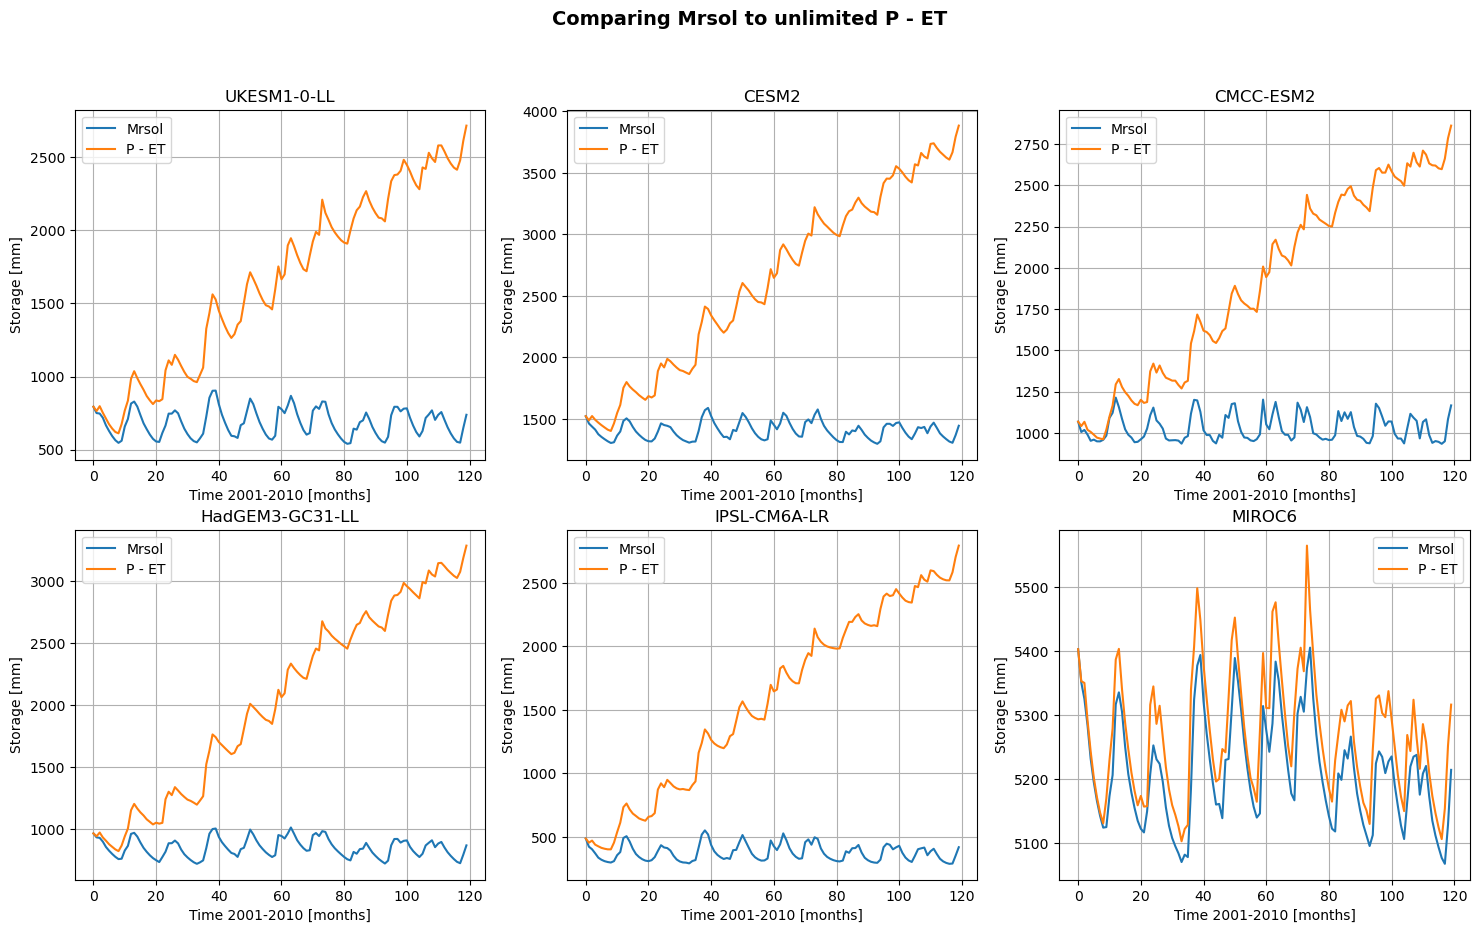

In [59]:
"""Storage"""

#At t = 0 setting the storage even with the mrsol data


t = 120

S1_UKEMS1_0_LL = np.zeros(t)
S1_CESM2 = np.zeros(t)
S1_CMCC_ESM2 = np.zeros(t)
S1_HadGEM3_GC31_LL = np.zeros(t)
S1_IPSL_CM6A_LR = np.zeros(t)
S1_MIROC6 = np.zeros(t)

for i in range(t):
    S1_UKESM1_0_LL[i] = S1_UKESM1_0_LL[i - 1] + (P_mean[i] - ET_mean_UKESM1_0_LL[i])
    S1_CESM2[i] = S1_CESM2[i - 1] + (P_mean[i] - ET_mean_CESM2[i])
    S1_CMCC_ESM2[i] = S1_CMCC_ESM2[i - 1] + (P_mean[i] - ET_mean_CMCC_ESM2[i])
    S1_HadGEM3_GC31_LL[i] = S1_HadGEM3_GC31_LL[i - 1] + (P_mean[i] - ET_mean_HadGEM3_GC31_LL[i])
    S1_IPSL_CM6A_LR[i] =  S1_IPSL_CM6A_LR[i - 1] + (P_mean[i] - ET_mean_IPSL_CM6A_LR[i])
    S1_MIROC6[i] = S1_MIROC6[i - 1] + (P_mean[i] - ET_mean_MIROC6[i])
    
    S1_UKESM1_0_LL[0] = Mrsol_UKESM1_0_LL_mean[0]
    S1_CESM2[0] = Mrsol_CESM2_mean[0]
    S1_CMCC_ESM2[0] = Mrsol_CMCC_ESM2_mean[0]
    S1_HadGEM3_GC31_LL[0] = Mrsol_HadGEM3_GC31_LL_mean[0]
    S1_IPSL_CM6A_LR[0] = Mrsol_IPSL_CM6A_LR_mean[0]
    S1_MIROC6[0] = Mrsol_MIROC6_mean[0]
     
label = ['UKESM1-0-LL' , 'CESM2' , 'CMCC-ESM2' , 'HadGEM3-GC31-LL' , 'IPSL-CM6A-LR' , 'MIROC6']
S1 = [S1_UKESM1_0_LL  , S1_CESM2, S1_CMCC_ESM2 , S1_HadGEM3_GC31_LL , S1_IPSL_CM6A_LR , S1_MIROC6]
Mrsol = [Mrsol_UKESM1_0_LL_mean , Mrsol_CESM2_mean , Mrsol_CMCC_ESM2_mean , Mrsol_HadGEM3_GC31_LL_mean , Mrsol_IPSL_CM6A_LR_mean , Mrsol_MIROC6_mean]
    
plt.figure(figsize = (18 , 10))

for i in range(len(S1)):
    plt.subplot(2 , 3 , i + 1)
    plt.title(label[i])
    plt.plot(Mrsol[i] , label = 'Mrsol')
    plt.ylabel('Storage [mm]')
    plt.xlabel('Time 2001-2010 [months]')
    plt.grid()
    plt.plot(S1[i] , label = 'P - ET')
    
    plt.legend()
    
plt.suptitle('Comparing Mrsol to unlimited P - ET' , fontsize = 14 , fontweight = 'bold');

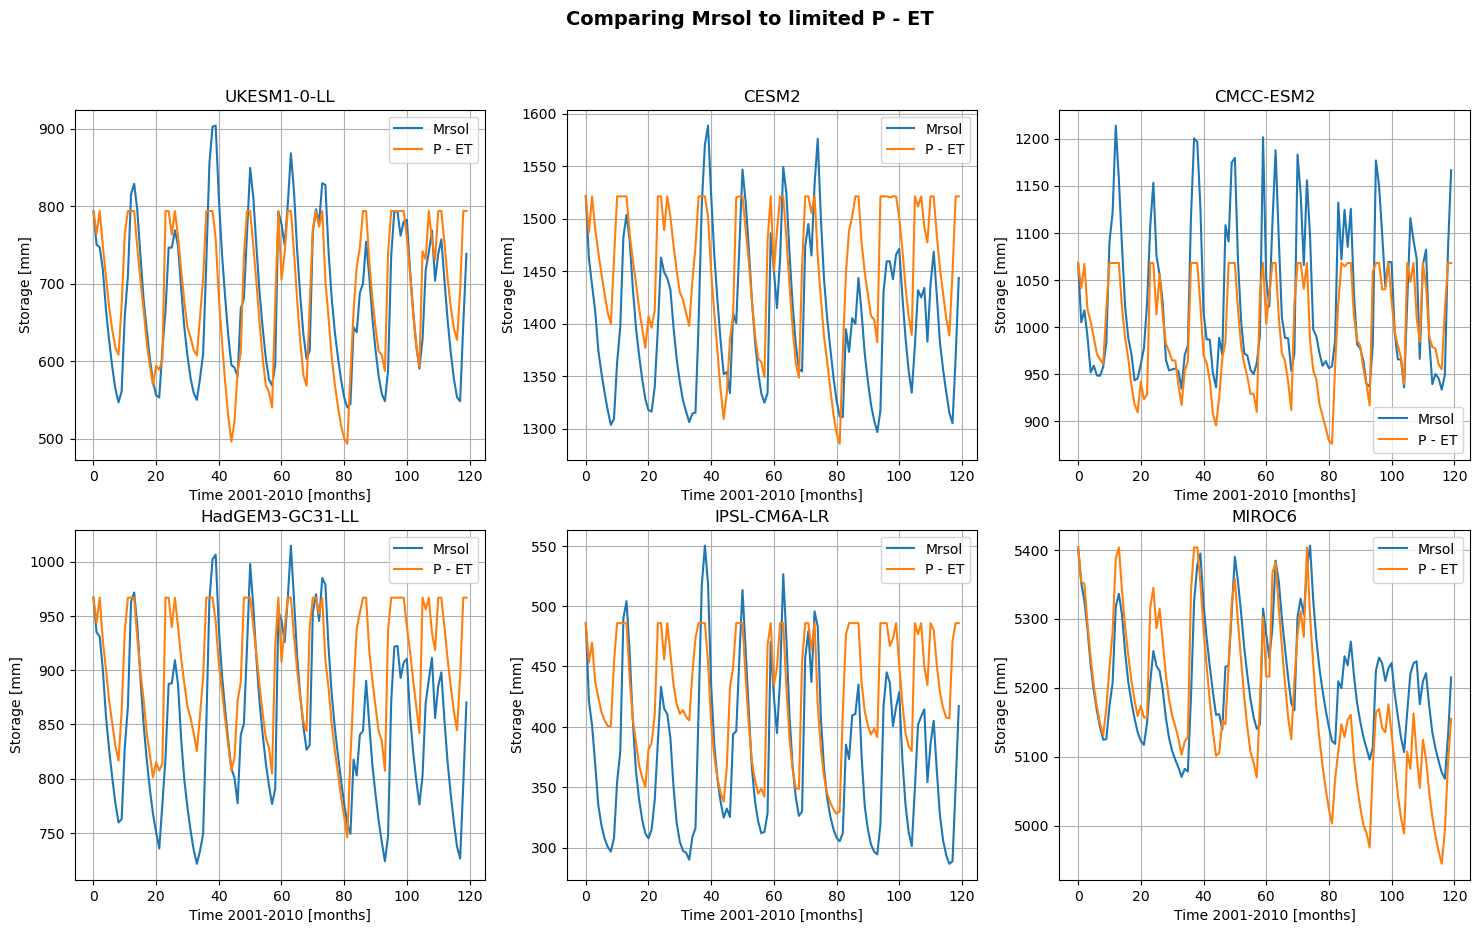

In [60]:
"""P - ET Storage compared to mrsol"""

#At t = 0 setting the storage even with the mrsol data


t = 120

S1_UKEMS1_0_LL = np.zeros(t)
S1_CESM2 = np.zeros(t)
S1_CMCC_ESM2 = np.zeros(t)
S1_HadGEM3_GC31_LL = np.zeros(t)
S1_IPSL_CM6A_LR = np.zeros(t)
S1_MIROC6 = np.zeros(t)

for i in range(t):
    S1_UKESM1_0_LL[i] = S1_UKESM1_0_LL[i - 1] + (P_mean[i] - ET_mean_UKESM1_0_LL[i])
    S1_CESM2[i] = S1_CESM2[i - 1] + (P_mean[i] - ET_mean_CESM2[i])
    S1_CMCC_ESM2[i] = S1_CMCC_ESM2[i - 1] + (P_mean[i] - ET_mean_CMCC_ESM2[i])
    S1_HadGEM3_GC31_LL[i] = S1_HadGEM3_GC31_LL[i - 1] + (P_mean[i] - ET_mean_HadGEM3_GC31_LL[i])
    S1_IPSL_CM6A_LR[i] =  S1_IPSL_CM6A_LR[i - 1] + (P_mean[i] - ET_mean_IPSL_CM6A_LR[i])
    S1_MIROC6[i] = S1_MIROC6[i - 1] + (P_mean[i] - ET_mean_MIROC6[i])
    
    S1_UKESM1_0_LL[0] = Mrsol_UKESM1_0_LL_mean[0]
    S1_CESM2[0] = Mrsol_CESM2_mean[0]
    S1_CMCC_ESM2[0] = Mrsol_CMCC_ESM2_mean[0]
    S1_HadGEM3_GC31_LL[0] = Mrsol_HadGEM3_GC31_LL_mean[0]
    S1_IPSL_CM6A_LR[0] = Mrsol_IPSL_CM6A_LR_mean[0]
    S1_MIROC6[0] = Mrsol_MIROC6_mean[0]
    
    if S1_UKESM1_0_LL[i] > Mrsol_UKESM1_0_LL_mean[0]:
        S1_UKESM1_0_LL[i] = Mrsol_UKESM1_0_LL_mean[0]
    if  S1_CESM2[i] > Mrsol_CESM2_mean[0]:
         S1_CESM2[i] = Mrsol_CESM2_mean[0]
    if  S1_CMCC_ESM2[i] > Mrsol_CMCC_ESM2_mean[0]:
         S1_CMCC_ESM2[i] = Mrsol_CMCC_ESM2_mean[0]
    if S1_HadGEM3_GC31_LL[i] > Mrsol_HadGEM3_GC31_LL_mean[0]:
        S1_HadGEM3_GC31_LL[i] = Mrsol_HadGEM3_GC31_LL_mean[0]
    if S1_IPSL_CM6A_LR[i] > Mrsol_IPSL_CM6A_LR_mean[0]:
        S1_IPSL_CM6A_LR[i] = Mrsol_IPSL_CM6A_LR_mean[0]
    if S1_MIROC6[i] > Mrsol_MIROC6_mean[0]:
        S1_MIROC6[i] = Mrsol_MIROC6_mean[0]
    

label = ['UKESM1-0-LL' , 'CESM2' , 'CMCC-ESM2' , 'HadGEM3-GC31-LL' , 'IPSL-CM6A-LR' , 'MIROC6']
S1 = [S1_UKESM1_0_LL  , S1_CESM2, S1_CMCC_ESM2 , S1_HadGEM3_GC31_LL , S1_IPSL_CM6A_LR , S1_MIROC6]
Mrsol = [Mrsol_UKESM1_0_LL_mean , Mrsol_CESM2_mean , Mrsol_CMCC_ESM2_mean , Mrsol_HadGEM3_GC31_LL_mean , Mrsol_IPSL_CM6A_LR_mean , Mrsol_MIROC6_mean]
    
plt.figure(figsize = (18 , 10))

for i in range(len(S1)):
    plt.subplot(2 , 3 , i + 1)
    plt.title(label[i])
    plt.plot(Mrsol[i] , label = 'Mrsol')
    plt.grid()
    plt.ylabel('Storage [mm]')
    plt.xlabel('Time 2001-2010 [months]')
    plt.plot(S1[i] , label = 'P - ET')
    plt.legend()
    
plt.suptitle('Comparing Mrsol to limited P - ET' , fontsize = 14 , fontweight = 'bold');

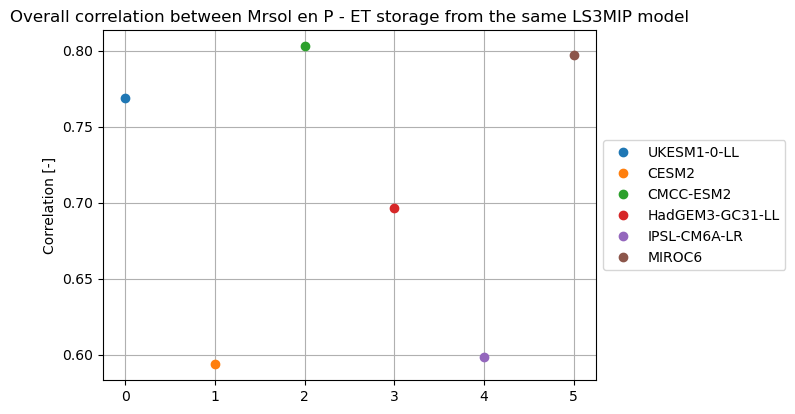

In [61]:
plt.figure(figsize = (14 , 10))

for i in range(len(S1)):
    x = S1[i]
    y = Mrsol[i]
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(221)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = 'o' , label = label[i] , linestyle = (0 , (0 , 100)))

plt.title('Overall correlation between Mrsol en P - ET storage from the same LS3MIP model')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

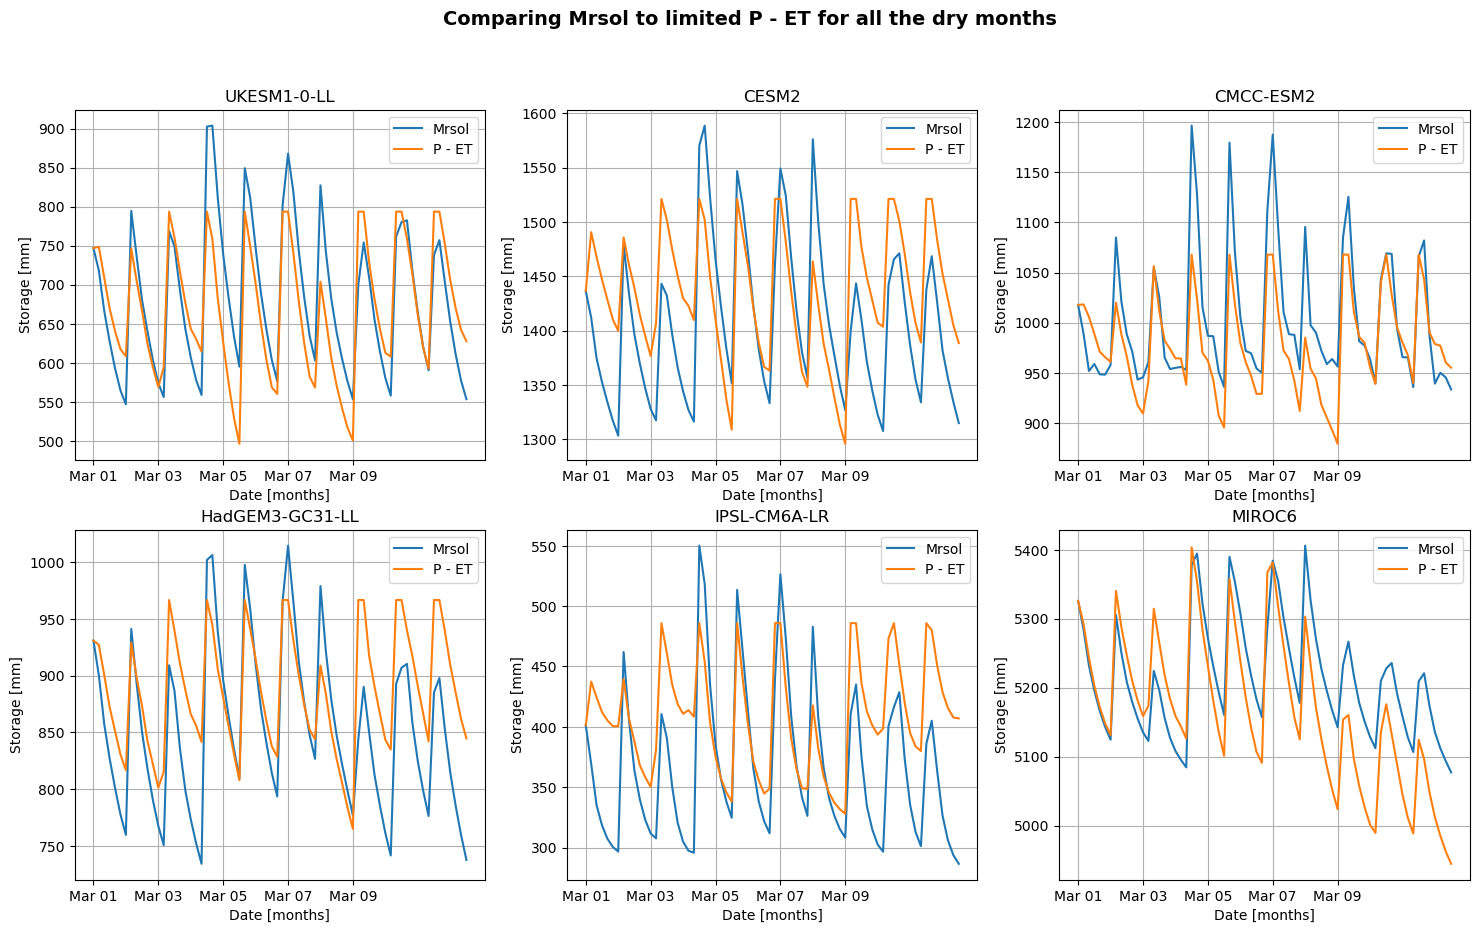

In [62]:
"""Only for the dry months (ET > P)"""

t = len(ADM_index)

Mrsol_ADM1_UKEMS1_0_LL = np.zeros(t)
Mrsol_ADM1_UKESM1_0_LL = np.zeros(t)
Mrsol_ADM1_CESM2 = np.zeros(t)
Mrsol_ADM1_CMCC_ESM2 = np.zeros(t)
Mrsol_ADM1_HadGEM3_GC31_LL = np.zeros(t)
Mrsol_ADM1_IPSL_CM6A_LR = np.zeros(t)
Mrsol_ADM1_MIROC6 = np.zeros(t)

for i in range(t):
    Mrsol_ADM1_UKESM1_0_LL[i] = Mrsol_UKESM1_0_LL_mean[ADM_index[i]]
    Mrsol_ADM1_CESM2[i] = Mrsol_CESM2_mean[ADM_index[i]]
    Mrsol_ADM1_CMCC_ESM2[i] =  Mrsol_CMCC_ESM2_mean[ADM_index[i]]
    Mrsol_ADM1_HadGEM3_GC31_LL[i] = Mrsol_HadGEM3_GC31_LL_mean[ADM_index[i]]
    Mrsol_ADM1_IPSL_CM6A_LR[i] =   Mrsol_IPSL_CM6A_LR_mean[ADM_index[i]]
    Mrsol_ADM1_MIROC6[i] =  Mrsol_MIROC6_mean[ADM_index[i]]
    
    ADM1_UKESM1_0_LL[i] = S1_UKESM1_0_LL[ADM_index[i]]
    ADM1_CESM2[i] = S1_CESM2[ADM_index[i]]
    ADM1_CMCC_ESM2[i] =  S1_CMCC_ESM2[ADM_index[i]]
    ADM1_HadGEM3_GC31_LL[i] = S1_HadGEM3_GC31_LL[ADM_index[i]]
    ADM1_IPSL_CM6A_LR[i] =   S1_IPSL_CM6A_LR[ADM_index[i]]
    ADM1_MIROC6[i] =  S1_MIROC6[ADM_index[i]]
    
    ADM1_UKESM1_0_LL[0] = Mrsol_ADM1_UKESM1_0_LL[0]
    ADM1_CESM2[0] = Mrsol_ADM1_CESM2[0]
    ADM1_CMCC_ESM2[0] = Mrsol_ADM1_CMCC_ESM2[0]
    ADM1_HadGEM3_GC31_LL[0] = Mrsol_ADM1_HadGEM3_GC31_LL[0]
    ADM1_IPSL_CM6A_LR[0] = Mrsol_ADM1_IPSL_CM6A_LR[0]
    ADM1_MIROC6[0] = Mrsol_ADM1_MIROC6[0]
    
S1 = [ADM1_UKESM1_0_LL  , ADM1_CESM2, ADM1_CMCC_ESM2 , ADM1_HadGEM3_GC31_LL , ADM1_IPSL_CM6A_LR , ADM1_MIROC6]
Mrsol = [Mrsol_ADM1_UKESM1_0_LL , Mrsol_ADM1_CESM2 , Mrsol_ADM1_CMCC_ESM2 , Mrsol_ADM1_HadGEM3_GC31_LL , Mrsol_ADM1_IPSL_CM6A_LR , Mrsol_ADM1_MIROC6]
    
plt.figure(figsize = (18 , 10))

for i in range(len(S1)):
    plt.subplot(2 , 3 , i + 1)
    plt.title(label[i])
    plt.plot(Mrsol[i] , label = 'Mrsol')
    plt.xlabel('Date [months]')
    plt.ylabel('Storage [mm]')
    plt.xticks( [0 , 12 , 24 , 36 , 48],['Mar 01' , 'Mar 03'  , 'Mar 05' , 'Mar 07' , 'Mar 09'])
    plt.grid()
    plt.plot(S1[i] , label = 'P - ET')
    plt.legend()
    
plt.suptitle('Comparing Mrsol to limited P - ET for all the dry months' , fontsize = 14 , fontweight = 'bold');

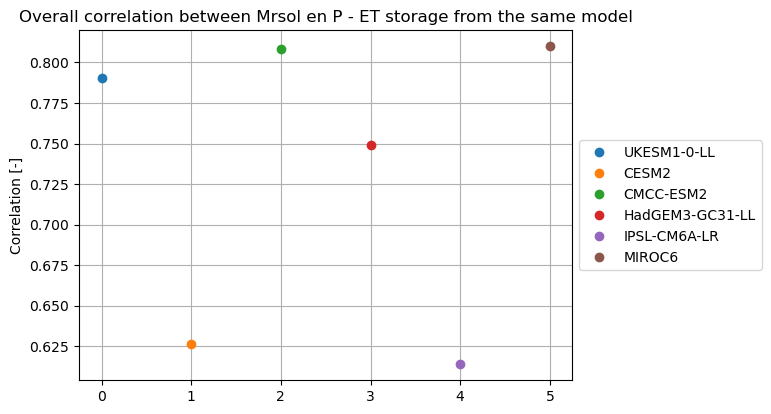

In [63]:
plt.figure(figsize = (14 , 10))

for i in range(len(S1)):
    x = S1[i]
    y = Mrsol[i]
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(221)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = 'o' , label = label[i] , linestyle = (0 , (0 , 100)))

plt.title('Overall correlation between Mrsol en P - ET storage from the same model')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

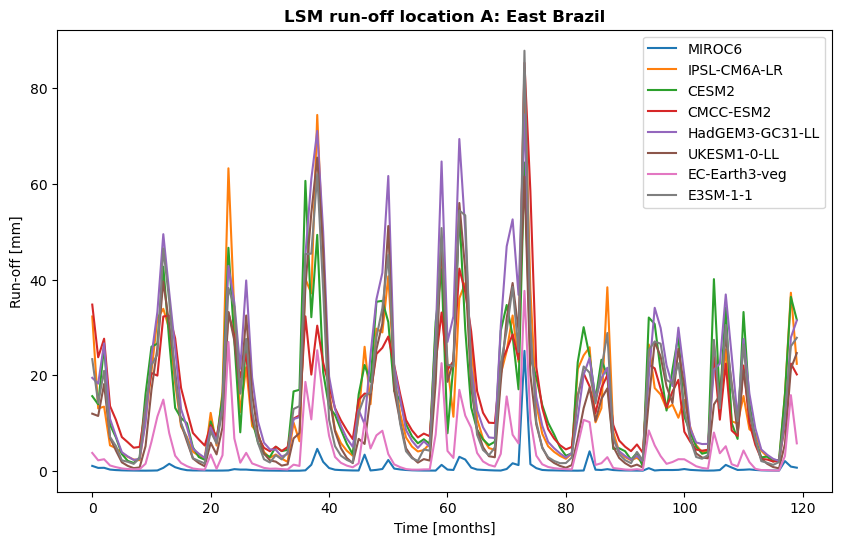

In [64]:
"""Run-off"""


plt.figure(figsize = (10 , 6))

R = [R_MIROC6, R_IPSL_CM6A_LR, R_CESM2, R_CMCC_ESM2 , R_HadGEM3_GC31_LL , R_UKESM1_0_LL , R_EC_Earth3_veg , R_E3SM_1_1]
label = ['MIROC6', 'IPSL-CM6A-LR', 'CESM2', 'CMCC-ESM2' , 'HadGEM3-GC31-LL' , 'UKESM1-0-LL' , 'EC-Earth3-veg' , 'E3SM-1-1']

for i in range(len(R)):
    plt.plot(R[i] , label = label[i])
    

plt.title('LSM run-off location A: East Brazil' , fontweight = 'bold')
plt.ylabel('Run-off [mm]')
plt.xlabel('Time [months]')
plt.legend()

In [65]:
"""RUN-OFF"""

R = [R_MIROC6, R_IPSL_CM6A_LR, R_CESM2, R_CMCC_ESM2 , R_HadGEM3_GC31_LL , R_UKESM1_0_LL , R_EC_Earth3_veg , R_E3SM_1_1]
label = ['MIROC6', 'IPSL-CM6A-LR', 'CESM2', 'CMCC-ESM2' , 'HadGEM3-GC31-LL' , 'UKESM1-0-LL' , 'EC-Earth3-veg' , 'E3SM-1-1']

#2004

print('2004')
print()

for i in range(len(R)):
    I = R[i][638 - 612].mean() + R[i][639 - 612].mean() + R[i][640-612].mean() + R[i][641-612].mean() + R[i][642-612].mean() + R[i][643-612].mean()
    print(f'{label[i]}: {float(I):.3f}')
    
#2007

print()
print('2007')
print()

for i in range(len(R)):
    I = R[i][674 -600].mean() + R[i][675 -600].mean() + R[i][676 -600].mean() + R[i][677 -600].mean() + R[i][678 -600].mean() + R[i][679 - 600].mean()
    print(f'{label[i]}: {float(I):.3f}')

2004

MIROC6: 0.685
IPSL-CM6A-LR: 48.908
CESM2: 55.591
CMCC-ESM2: 56.462
HadGEM3-GC31-LL: 84.417
UKESM1-0-LL: 64.057
EC-Earth3-veg: 7.921
E3SM-1-1: 53.391

2007

MIROC6: 2.417
IPSL-CM6A-LR: 71.814
CESM2: 79.618
CMCC-ESM2: 114.284
HadGEM3-GC31-LL: 66.060
UKESM1-0-LL: 39.909
EC-Earth3-veg: 17.106
E3SM-1-1: 52.178


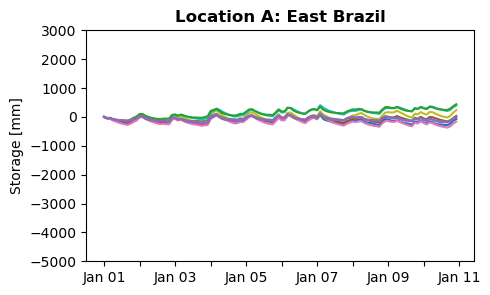

In [66]:
"""cum. P - E S"""

t = 120

models_WB = ['S_UKESM1_0_LL', 'S_CESM2', 'S_CMCC_ESM2', 'S_HadGEM3_GC31_LL', 'S_IPSL_CM6A_LR', 'S_MIROC6' , 'S_EC_Earth3_veg' , 'S_E3SM_1_1']

for model in models_WB:
    exec(f"{model} = np.zeros(t)") #Initialize all models with zeros
    for i in range(t):
        exec(f"{model}[i] = {model}[i - 1] + (P_mean[i] - ET_mean_{model[2:]}[i] - R_{model[2:]}[i])")
        exec(f"{model}[0] = 0")


plt.figure(figsize = (5 , 3))
plt.ylabel('Storage [mm]')
plt.plot(S_UKESM1_0_LL , label = 'UKESM1-0-LL' , color = 'C8')
plt.plot(S_CESM2 , label = 'CESM2' , color = 'C9')
plt.plot(S_CMCC_ESM2 , label = 'CMCC-ESM2' , color = 'C10')
plt.plot(S_HadGEM3_GC31_LL , label = 'HadGEM3-GC31-LL' , color = 'C5')
plt.plot(S_IPSL_CM6A_LR , label = 'IPSL-CM6A-LR' , color = 'C2')
plt.plot(S_MIROC6 , label = 'MIROC6' , color = 'C6')
plt.plot(S_EC_Earth3_veg , label = 'EC-Earth3-veg' , color = 'C7')
plt.plot(S_E3SM_1_1 , label = 'E3SM-1-1' , color = 'C4')
#plt.xlabel('Date')
plt.ylim(-5000 , 3000)
plt.title('Location A: East Brazil' , fontweight = 'bold')
plt.xticks(np.arange(0 , 121 , 12) , ['Jan 01' , '' ,'Jan 03' ,'' ,'Jan 05' ,'' ,'Jan 07' ,'' ,'Jan 09' ,'' , 'Jan 11']);
#plt.grid()
#plt.legend();

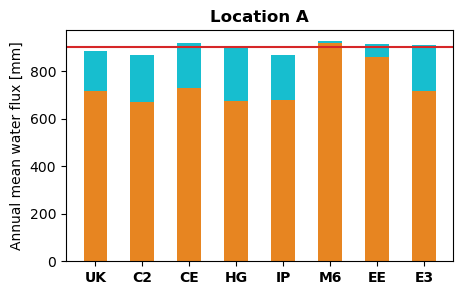

In [67]:
plt.figure(figsize = (5 , 3))

for model, i in zip(models_WB , np.arange(0, 8, 1)):
    exec(f"plt.bar(i, ET_mean_{model[2:]}.mean() * 12 + R_{model[2:]}.mean() * 12, width=0.5, color='C9')")
    exec(f"plt.bar(i, ET_mean_{model[2:]}.mean() * 12, width=0.5, color='C1' , alpha = 0.9)")

plt.axhline(y=p_01_10/10, color='C3', label='Annual P')
plt.title('Location A', fontweight='bold')
plt.ylabel('Annual mean water flux [mm]')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['UK', 'C2', 'CE', 'HG', 'IP', 'M6', 'EE', 'E3'], fontweight='bold');

# Add legend
#plt.legend(['Annual P', 'Annual R', 'Annual E'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3);

In [68]:
"""Data"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/LS3MIP/mrsol/Regions/'

CESM2 = xr.open_dataset(home + 'mrsol_Emon_CESM2_land-hist_r1i1p1f1_2001-2010_EB.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'mrsol_Emon_CMCC-ESM2_land-hist_r1i1p1f1_2001-2010_EB.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'mrsol_Emon_HadGEM3-GC31-LL_land-hist_r1i1p1f3_2001-2010_EB.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'mrsol_Emon_IPSL-CM6A-LR_land-hist_r1i1p1f1_2001-2010_EB.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'mrsol_Emon_MIROC6_land-hist_r1i1p1f1_2001-2010_EB.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'mrsol_Emon_UKESM1-0-LL_land-hist_r1i1p1f2_2001-2010_EB.nc' , engine = 'netcdf4')


"""Mrsol"""


t = 120
Mrsol_CESM2_mean = np.zeros(t)
Mrsol_CMCC_ESM2_mean = np.zeros(t)
Mrsol_HadGEM3_GC31_LL_mean = np.zeros(t)
Mrsol_IPSL_CM6A_LR_mean = np.zeros(t)
Mrsol_UKESM1_0_LL_mean = np.zeros(t)
Mrsol_MIROC6_mean = np.zeros(t)

for i in range(t):
    Mrsol_CESM2_mean[i] = CESM2.mrsol[i , 0:20].mean()*20
    Mrsol_CMCC_ESM2_mean[i] = CMCC_ESM2.mrsol[i , 0:9].mean()*15
    Mrsol_HadGEM3_GC31_LL_mean[i] = HadGEM3_GC31_LL.mrsol[i , 0:4].mean() * 4
    Mrsol_IPSL_CM6A_LR_mean[i] = IPSL_CM6A_LR.mrsol[i , 0:11].mean() * 11
    Mrsol_MIROC6_mean[i] = MIROC6.mrsol[i , 0:6].mean() * 6
    Mrsol_UKESM1_0_LL_mean[i] = UKESM1_0_LL.mrsol[i , 0:4].mean() * 4
    
Mrsol = [Mrsol_UKESM1_0_LL_mean , Mrsol_CESM2_mean , Mrsol_CMCC_ESM2_mean , Mrsol_HadGEM3_GC31_LL_mean , Mrsol_IPSL_CM6A_LR_mean , Mrsol_MIROC6_mean]

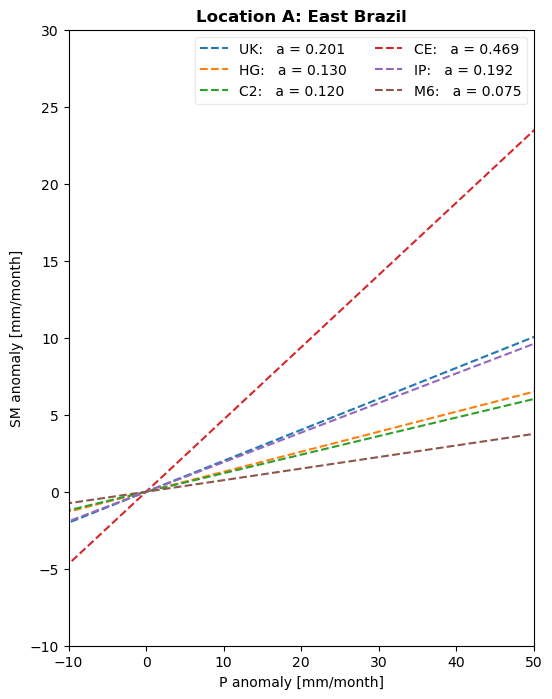

In [69]:
"""P - SM response anomolies"""

"""Mrsol"""

SM_mean = Mrsol
SM_pm_mean = np.zeros((6 , 12))

for j in range(len(SM_mean)):
    for i in range(12):
        #Array per month average
        SM_pm_mean[j , i] = np.mean([SM_mean[j][i] , SM_mean[j][i + 12] , SM_mean[j][i + 24] ,  SM_mean[j][i+36] , 
        SM_mean[j][i + 48] , SM_mean[j][i + 60] , SM_mean[j][i + 72] , SM_mean[j][i + 84] , SM_mean[j][i + 96] , 
        SM_mean[j][i + 108]])

SM_an = np.zeros((10 , 120))
mpy = np.arange(0 , 120 , 12)

for m in range(len(SM_mean)):
    for j in range(len(mpy)):   
        for i in range(12):
            SM_an[m][mpy[j] + i] = SM_mean[m][mpy[j]+i] - SM_pm_mean[m][i]
            
"""Linear function"""

d = {'P_mean': P_an, 'UKESM1-0-LL' : SM_an[0] , 'CESM2' : SM_an[1] , 'CMCC-ESM2':SM_an[2] 
     , 'HadGEM3-GC31-LL' : SM_an[3] , 'IPSL-CM6A-LR':SM_an[4] , 'MIROC6':SM_an[5]}
df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])

def func(x, a , b):
    return a * x + b

label_a = ['UK'  ,  'HG' , 'C2' , 'CE' , 'IP' , 'M6']
label = ['UKESM1-0-LL'  ,  'HadGEM3-GC31-LL' , 'CESM2' , 'CMCC-ESM2' , 'IPSL-CM6A-LR' , 'MIROC6']
y = df['UKESM1-0-LL'] , df['HadGEM3-GC31-LL'] , df['CESM2'] , df['CMCC-ESM2'] , df['IPSL-CM6A-LR'] , df['MIROC6']
linestyle = ['dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed']
S = np.zeros(len(label))
a = np.zeros(len(label))

plt.figure(figsize = (6 , 8))

for i in range(len(label)):
    xdata = df['P_mean']
    ydata = y[i]
    popt , pcov  = curve_fit(func , xdata, ydata)
    S[i] = func(xdata[0] , *popt)
    a[i] = popt[0]
    plt.plot(xdata , func(xdata, *popt) , label = f'{label_a[i]}:   a = {a[i]:.3f}' , linestyle = linestyle[i]);


#Adjust xlim and ylim manually if needed    

plt.title('Location A: East Brazil' , fontweight = 'bold')
plt.ylim(-10 , 30)
#plt.grid()
plt.xlim(-10 , 50)
plt.ylabel('SM anomaly [mm/month]')
plt.xlabel('P anomaly [mm/month]')
plt.legend(framealpha = 0.4 , ncols = 2);